# PROYECTO INTEGRADOR M4

## AVANCE 1

###### 1.Lee el archivo Readme.txt y analiza las columnas y datos que se van a utilizar para obtener un mayor conocimiento del dataset.
###### 2.Crea un nuevo notebook llamado “PIDA_M4_Eugenia_Minghetti.ipynb”
###### 3.Lee el archivo data_latinoamerica.csv con código Python en tu Visual Studio Code.  

In [13]:
import pandas as pd #Importo la librería que voy a necesitar
import numpy as np #Importo la librería que voy a necesitar

In [14]:
data_latinoamerica = pd.read_csv("import/data_latinoamerica.csv", sep=",") #Leo el csv usando Python a través de una ruta relativa e declarando el separador

###### 4.Comprueba que el dataset cargado tiene la cantidad de registros y columnas especificadas (usar la función adecuada)

In [ ]:
data_latinoamerica.head () #Reviso las primeras cinco filas para ver si el dataset se cargó correctamente

location_key        date country_code country_name  new_confirmed  \
0           AR  2020-01-01           AR    Argentina            3.0   
1           AR  2020-01-02           AR    Argentina           14.0   
2           AR  2020-01-03           AR    Argentina            3.0   
3           AR  2020-01-04           AR    Argentina            7.0   
4           AR  2020-01-05           AR    Argentina            5.0   

   new_deceased  cumulative_confirmed  cumulative_deceased  \
0           0.0                   3.0                  0.0   
1           0.0                  17.0                  0.0   
2           0.0                  20.0                  0.0   
3           0.0                  27.0                  0.0   
4           0.0                  32.0                  0.0   

   cumulative_vaccine_doses_administered  population  ...  \
0                                    NaN  44938712.0  ...   
1                                    NaN  44938712.0  ...   
2                                    NaN  44938712.0  ...   
3                                    NaN  44938712.0  ...   
4                                    NaN  44938712.0  ...   

   population_largest_city  area_rural_sq_km  area_urban_sq_km  \
0               15057273.0         2690269.0           55032.0   
1               15057273.0         2690269.0           55032.0   
2               15057273.0         2690269.0           55032.0   
3               15057273.0         2690269.0           55032.0   
4               15057273.0         2690269.0           55032.0   

   life_expectancy  adult_male_mortality_rate  adult_female_mortality_rate  \
0            76.52                    147.086                       79.483   
1            76.52                    147.086                       79.483   
2            76.52                    147.086                       79.483   
3            76.52                    147.086                       79.483   
4            76.52                    147.086                       79.483   

   pollution_mortality_rate  comorbidity_mortality_rate  new_recovered  \
0                      26.6                        15.8            NaN   
1                      26.6                        15.8            NaN   
2                      26.6                        15.8            NaN   
3                      26.6                        15.8            NaN   
4                      26.6                        15.8            NaN   

   cumulative_recovered  
0                   NaN  
1                   NaN  
2                   NaN  
3                   NaN  
4                   NaN  

[5 rows x 50 columns]

In [ ]:
np.shape(data_latinoamerica) #Conocer el tamaño de nuestro dataset (filas por columnas)

(12216057, 50)

###### 5.Selecciona los países donde se expandirán: Colombia, Argentina, Chile, México, Perú y Brasil.

In [ ]:
paises_seleccionados=["Argentina", "Chile", "Colombia","Mexico","Peru","Brazil"] #Creo una máscara para filtrar los datos según los países indicados en la consigna
data_latinoamerica_seleccionada=data_latinoamerica[data_latinoamerica["country_name"].isin(paises_seleccionados)] #Creo un nuevo dataset filtrado 
#usando la máscara que creé previamente e isin (filtro alternativo) para que me traiga solo los países que coinciden con los seleccionados en una lista

In [ ]:
np.shape(data_latinoamerica_seleccionada) #Ver el tamaño del dataset una vez aplicado el filtro

(11970289, 50)

###### *Nuestro dataset se redujo pero aún tiene muchos datos. Revisamos si hay datos nulos para limpiar los datos en caso que eso suceda* **(parte del punto 8)**

In [ ]:
data_latinoamerica_seleccionada.isnull().sum() #Verificar cantidad de datos nulos por columna (.isnull) y obtener los totales (.sum)

location_key                                    0
date                                            0
country_code                                    0
country_name                                    0
new_confirmed                             5620283
new_deceased                              5661788
cumulative_confirmed                      5619937
cumulative_deceased                       5661426
cumulative_vaccine_doses_administered    11706131
population                                 521266
population_male                           1122803
population_female                         1122803
population_rural                         11964343
population_urban                         11964343
population_density                       11964343
human_development_index                   6472221
population_age_00_09                      1465689
population_age_10_19                      1465689
population_age_20_29                      1465689
population_age_30_39                      1465689


In [ ]:
data_latinoamerica_seleccionada.isnull().sum()[data_latinoamerica_seleccionada.isnull().sum()>4000000] #Establecemos un límite respecto a los nulos 
#por encima del cual descartamos esas columnas (no las uso para mis cálculos)

new_confirmed                             5620283
new_deceased                              5661788
cumulative_confirmed                      5619937
cumulative_deceased                       5661426
cumulative_vaccine_doses_administered    11706131
population_rural                         11964343
population_urban                         11964343
population_density                       11964343
human_development_index                   6472221
gdp_usd                                  11963352
gdp_per_capita_usd                       11962361
smoking_prevalence                       11964343
diabetes_prevalence                      11964343
infant_mortality_rate                    11964343
nurses_per_1000                          11964343
physicians_per_1000                      11964343
population_largest_city                  11964343
area_rural_sq_km                         11964343
area_urban_sq_km                         11964343
life_expectancy                          11964343


In [ ]:
data_latinoamerica_paises= data_latinoamerica_seleccionada[data_latinoamerica_seleccionada["location_key"].isin(['AR','CL','CO','MX','PE','BR'])]
#Filtramos nuevamnete los datos, pero en este caso usando location_key (que tiene muchísimos menos faltantes) y 
#solo considerando los países seleccionados con .isin (le damos lista con valores de interés)

In [ ]:
np.shape(data_latinoamerica_paises) #Chequeamos el tamaño de nuestro dataset

(5946, 50)

##### *El dataset se redujo considerablemente*

###### 6.Filtra los datos en fechas mayores a 2021-01-01.


In [ ]:
data_latinoamerica_paises_fecha=data_latinoamerica_paises[data_latinoamerica_paises["date"]>"2021-01-01"] #Filtramos por la fecha indicada usando una
#máscara

In [ ]:
np.shape(data_latinoamerica_paises_fecha) #Chequeamos el tamaño de nuestro dataset

(3744, 50)

###### 7.Compara a nivel de país para llenar valores faltantes

In [ ]:
valores_nulos=data_latinoamerica_paises_fecha.isnull().sum()[data_latinoamerica_paises_fecha.isnull().sum()>0]
#Verificamos que columnas todavía tienen valores nulos 
valores_nulos

new_confirmed                              21
new_deceased                               21
cumulative_confirmed                       21
cumulative_deceased                        21
cumulative_vaccine_doses_administered     584
average_temperature_celsius                42
minimum_temperature_celsius                41
maximum_temperature_celsius                41
rainfall_mm                                90
relative_humidity                          42
new_recovered                            2116
cumulative_recovered                     2736
dtype: int64

##### *Considerando esta cantidad de valores nulos decido imputarlos como estrategia, en vez de eliminarlos, de forma personalizada*

###### 8.Realiza una limpieza preliminar de los datos, eliminando registros nulos y corrigiendo los tipos de datos donde sea necesario, trata con valores medios, valores anteriores o valores siguientes.

In [ ]:
paises_seleccionados #Mi máscara de países de interés

['Argentina', 'Chile', 'Colombia', 'Mexico', 'Peru', 'Brazil']

In [ ]:
#Para los datos con pocos datos faltantes los imputo con la media correspondiente al país en cuestión a través de un ciclo for
for pais in paises_seleccionados:
    data_latinoamerica_paises_fecha['new_confirmed'] = data_latinoamerica_paises_fecha['new_confirmed'].fillna(data_latinoamerica_paises_fecha[data_latinoamerica_paises_fecha['country_name']==pais]['new_confirmed'].mean())
    data_latinoamerica_paises_fecha['new_deceased'] = data_latinoamerica_paises_fecha['new_deceased'].fillna(data_latinoamerica_paises_fecha[data_latinoamerica_paises_fecha['country_name']==pais]['new_deceased'].mean())
    data_latinoamerica_paises_fecha['cumulative_confirmed'] = data_latinoamerica_paises_fecha['cumulative_confirmed'].fillna(data_latinoamerica_paises_fecha[data_latinoamerica_paises_fecha['country_name']==pais]['cumulative_confirmed'].mean())
    data_latinoamerica_paises_fecha['cumulative_deceased'] = data_latinoamerica_paises_fecha['cumulative_deceased'].fillna(data_latinoamerica_paises_fecha[data_latinoamerica_paises_fecha['country_name']==pais]['cumulative_deceased'].mean())
    data_latinoamerica_paises_fecha['rainfall_mm'] = data_latinoamerica_paises_fecha['rainfall_mm'].fillna(data_latinoamerica_paises_fecha[data_latinoamerica_paises_fecha['country_name']==pais]['rainfall_mm'].mean())
    data_latinoamerica_paises_fecha['relative_humidity'] = data_latinoamerica_paises_fecha['relative_humidity'].fillna(data_latinoamerica_paises_fecha[data_latinoamerica_paises_fecha['country_name']==pais]['relative_humidity'].mean())
    data_latinoamerica_paises_fecha['average_temperature_celsius'] = data_latinoamerica_paises_fecha['average_temperature_celsius'].fillna(data_latinoamerica_paises_fecha[data_latinoamerica_paises_fecha['country_name']==pais]['average_temperature_celsius'].mean())
    data_latinoamerica_paises_fecha['minimum_temperature_celsius'] = data_latinoamerica_paises_fecha['minimum_temperature_celsius'].fillna(data_latinoamerica_paises_fecha[data_latinoamerica_paises_fecha['country_name']==pais]['minimum_temperature_celsius'].mean())
    data_latinoamerica_paises_fecha['maximum_temperature_celsius'] = data_latinoamerica_paises_fecha['maximum_temperature_celsius'].fillna(data_latinoamerica_paises_fecha[data_latinoamerica_paises_fecha['country_name']==pais]['maximum_temperature_celsius'].mean())

#Para los países con más datos faltantes los imputo con valor 0 utilizando el mismo ciclo for
data_latinoamerica_paises_fecha['new_recovered'] = data_latinoamerica_paises_fecha['new_recovered'].fillna(0)
data_latinoamerica_paises_fecha['cumulative_recovered'] = data_latinoamerica_paises_fecha['cumulative_recovered'].fillna(0)
data_latinoamerica_paises_fecha['cumulative_vaccine_doses_administered'] = data_latinoamerica_paises_fecha['cumulative_vaccine_doses_administered'].fillna(0)




C:\Users\Eugenia\AppData\Local\Temp\ipykernel_45396\1449476070.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_latinoamerica_paises_fecha['new_confirmed'] = data_latinoamerica_paises_fecha['new_confirmed'].fillna(data_latinoamerica_paises_fecha[data_latinoamerica_paises_fecha['country_name']==pais]['new_confirmed'].mean())
C:\Users\Eugenia\AppData\Local\Temp\ipykernel_45396\1449476070.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_latinoamerica_paises_fecha['new_deceased'] = data_latinoam

In [ ]:
data_latinoamerica_paises_fecha.isnull().sum() #Chequeo si hay nulos en mis datos

location_key                             0
date                                     0
country_code                             0
country_name                             0
new_confirmed                            0
new_deceased                             0
cumulative_confirmed                     0
cumulative_deceased                      0
cumulative_vaccine_doses_administered    0
population                               0
population_male                          0
population_female                        0
population_rural                         0
population_urban                         0
population_density                       0
human_development_index                  0
population_age_00_09                     0
population_age_10_19                     0
population_age_20_29                     0
population_age_30_39                     0
population_age_40_49                     0
population_age_50_59                     0
population_age_60_69                     0
population_

##### *Mis datos ya no tienen nulos, el proceso de llenado se completó correctamente*

###### 10.Guarda los datos filtrados en un archivo con el nombre DatosFinalesFiltrado.csv a fin de poder utilizarlo luego y no tener que repetir el proceso de filtrado y limpieza.

In [ ]:
data_latinoamerica_paises_fecha.to_csv("export/DatosFinalesFiltrado.csv", index=False)

###### 9.Examina las características básicas del dataset para comprender la distribución de las variables clave como incidencia de COVID-19 e identifica las variables que consideras que son claves para tu análisis.

In [ ]:
data_latinoamerica_paises_fecha.describe() #Uso de .describe para conocer los estadísticos de cada columna del dataset

new_confirmed  new_deceased  cumulative_confirmed  cumulative_deceased  \
count    3744.000000   3744.000000          3.744000e+03          3744.000000   
mean    13930.531008    276.363237          6.780429e+06        192646.443778   
std     24205.550042    507.133193          7.977327e+06        182624.944321   
min      -573.000000      0.000000          9.710000e+02             1.000000   
25%      1536.750000     26.000000          2.132216e+06         59390.500000   
50%      5227.000000    101.000000          3.648782e+06        139496.500000   
75%     14812.750000    311.000000          6.202104e+06        214877.250000   
max    298408.000000  11447.000000          3.456883e+07        685203.000000   

       cumulative_vaccine_doses_administered    population  population_male  \
count                           3.744000e+03  3.744000e+03     3.744000e+03   
mean                            6.544474e+07  7.772147e+07     3.787035e+07   
std                             9.247680e+07  6.713776e+07     3.318494e+07   
min                             0.000000e+00  1.757400e+07     8.972014e+06   
25%                             2.618297e+06  2.938188e+07     1.445076e+07   
50%                             3.244576e+07  4.791080e+07     2.225416e+07   
75%                             7.478108e+07  1.109920e+08     5.485523e+07   
max                             3.478685e+08  2.125594e+08     1.044358e+08   

       population_female  population_rural  population_urban  ...  \
count       3.744000e+03      3.744000e+03      3.744000e+03  ...   
mean        3.927162e+07      1.255498e+07      6.833931e+07  ...   
std         3.448407e+07      1.008074e+07      5.829529e+07  ...   
min         8.601989e+06      2.341903e+06      1.661014e+07  ...   
25%         1.493113e+07      3.599141e+06      2.539034e+07  ...   
50%         2.324582e+07      8.316128e+06      4.108344e+07  ...   
75%         5.748131e+07      2.494867e+07      1.026269e+08  ...   
max         1.081236e+08      2.780789e+07      1.832416e+08  ...   

       population_largest_city  area_rural_sq_km  area_urban_sq_km  \
count             3.744000e+03      3.744000e+03       3744.000000   
mean              1.443888e+07      2.636580e+06      59502.500000   
std               5.710077e+06      2.584740e+06      45125.320206   
min               6.723516e+06      7.094180e+05      12027.000000   
25%               1.055471e+07      1.090598e+06      16425.000000   
50%               1.291832e+07      1.543881e+06      45582.000000   
75%               2.167191e+07      2.690269e+06     102418.000000   
max               2.184651e+07      8.241430e+06     134981.000000   

       life_expectancy  adult_male_mortality_rate  \
count      3744.000000                3744.000000   
mean         76.808500                 154.274667   
std           1.597394                  27.000146   
min          74.992000                 107.669000   
25%          75.672000                 146.370000   
50%          76.518000                 149.351000   
75%          77.109000                 184.379000   
max          80.042000                 188.528000   

       adult_female_mortality_rate  pollution_mortality_rate  \
count                  3744.000000               3744.000000   
mean                     81.428000                 36.566667   
std                      11.800623                 13.027569   
min                      59.035000                 25.300000   
25%                      77.999000                 26.600000   
50%                      82.149000                 33.300000   
75%                      91.421000                 37.000000   
max                      95.815000                 63.900000   

       comorbidity_mortality_rate  new_recovered  cumulative_recovered  
count                 3744.000000    3744.000000          3.744000e+03  
mean                    14.816667    8263.612179          3.894398e+06  
std                      1.665972   23

###### **Variables clave: new_confirmed, new_deceased, cumulative_vaccine_doses_administrated, population, new_recovered**

###### 11.Aplica bucles for y/o while para el cálculo de estadísticas descriptivas y otras métricas importantes que ofrece pandas por default. 
##### RESPONDER:
###### a.¿Qué implican estas métricas y cómo pueden ayudar en el análisis de datos?
###### **Estas métricas nos permiten conocer las medidas de tendencia central y entender la dispersión de los datos (cuánto se alejan de la media),como también si la distribución de los datos se asemeja a una distribución normal (media y mediana o percentil 50 cercanos); conocer los valores mínimos y máximos**

###### b.¿Se muestran todas las estadísticas en todas las columnas durante el análisis? **NO, las columnas numéricas aquellas para las que se realizó el cálculo de todas las métricas. Usar df.describe(include="object") para que incluya categóricos**
###### c.¿Cuál es la razón de la respuesta anterior y cómo podría afectar la interpretación de los resultados obtenidos? **pd.describe() fue diseñado de ese modo, y si no lo consideramos podríamos tener un análisis incompleto o malinterpretar los datos**

In [ ]:
for columna in data_latinoamerica_paises_fecha.columns: #Recorre las columnas del dataset
    print(columna) #Imprime el nombre de la columna
    print (data_latinoamerica_paises_fecha[columna].describe()) #Obtiene los estadísticos de cada columna
    print ("--") #Imprime un separador para separar las columnas 

location_key
count     3744
unique       6
top         AR
freq       624
Name: location_key, dtype: object
--
date
count           3744
unique           624
top       2022-09-01
freq               6
Name: date, dtype: object
--
country_code
count     3744
unique       6
top         AR
freq       624
Name: country_code, dtype: object
--
country_name
count          3744
unique            6
top       Argentina
freq            624
Name: country_name, dtype: object
--
new_confirmed
count      3744.000000
mean      13930.531008
std       24205.550042
min        -573.000000
25%        1536.750000
50%        5227.000000
75%       14812.750000
max      298408.000000
Name: new_confirmed, dtype: float64
--
new_deceased
count     3744.000000
mean       276.363237
std        507.133193
min          0.000000
25%         26.000000
50%        101.000000
75%        311.000000
max      11447.000000
Name: new_deceased, dtype: float64
--
cumulative_confirmed
count    3.744000e+03
mean     6.780429e+06
std

###### 12.Crea una función que permita obtener la mediana, varianza y el rango.
##### RESPONDER: 
###### a.¿Qué representa la mediana? **Es el valor o promedio de valores (si son dos) que representa la mitad de un conjunto de datos ordenados de menor a mayor; al compararla con el promedio podemos tener una idea de la dispersión de los datos, y por ende si éstos presentan una distribución normal**
###### b.¿Cómo varía la dispersión de los datos en el conjunto de datos analizado, en términos de la varianza y el rango? 
###### c.¿Qué nos puede indicar esto sobre la consistencia o la variabilidad de los datos en relación con la mediana?


In [ ]:
def describir_datos(data): #Definimos la función
    for i in data.columns: #Creamos el bucle for
         if data[i].dtype=='float64' or data[i].dtype=='int64': #Verifica que el dato de la columna sea de tipo numérico
            print(i) #Imprime el nombre de la columna
            print('Mediana:',data[i].median()) #Cálculo e impresión de mediana
            print('varianza:',data[i].var()) #Cálculo e impresión de varianza
            print('Rango', data[i].max()-data[i].min()) #Cálculo e impresión de rango
            print("Moda",data[i].mode()) #Cálculo e impresión de moda
            print('--') #Para separar datos y que queden más organizados

describir_datos(data_latinoamerica_paises_fecha)


new_confirmed
Mediana: 5227.0
varianza: 585908652.8478458
Rango 298981.0
Moda 0    0.0
Name: new_confirmed, dtype: float64
--
new_deceased
Mediana: 101.0
varianza: 257184.0754690855
Rango 11447.0
Moda 0    0.0
Name: new_deceased, dtype: float64
--
cumulative_confirmed
Mediana: 3648782.0
varianza: 63637740447227.74
Rango 34567862.0
Moda 0    6.079579e+06
Name: cumulative_confirmed, dtype: float64
--
cumulative_deceased
Mediana: 139496.5
varianza: 33351870288.323883
Rango 685202.0
Moda 0    105716.119355
Name: cumulative_deceased, dtype: float64
--
cumulative_vaccine_doses_administered
Mediana: 32445756.5
varianza: 8551958275078892.0
Rango 347868481.0
Moda 0    0.0
Name: cumulative_vaccine_doses_administered, dtype: float64
--
population
Mediana: 47910798.0
varianza: 4507478439615793.0
Rango 194985406.0
Moda 0     17574003.0
1     29381884.0
2     44938712.0
3     50882884.0
4    110991953.0
5    212559409.0
Name: population, dtype: float64
--
population_male
Mediana: 22254165.0
varianza

##### EXTRA CREDIT
###### Explorar el uso de funciones de orden superior para una manipulación eficiente de los datos.


In [ ]:
#Podríamos usar funciones de orden superior para calcular estadísticos agrupados por año 
data_latinoamerica_paises_fecha["Year"]=data_latinoamerica_paises_fecha.date.dt.year #Extaer al año de la columna fecha y guardarlo en nueva columna llamada "Year"
estadisticos_per_year=data_latinoamerica_paises_fecha.groupby("Year").agg({"new_confirmed": ['mean','median','std','var', lambda x: x.max()-x.min()],
                                                                           "new_deceased":['mean','median','std','var', lambda x: x.max()-x.min()]
                                                                          })
#Usamos groupby para calcular los estadísticos agrupados por año de las columnas elegidas (podemos sumar las que gustemos), con agg podemos agregar
#distintas funciones (media, mediana, desvío estándar, varianza, rango (con una función lambda) y más si deseamos)
print (estadisticos_per_year) #Imprimimos

## AVANCE 2

###### 1.Abre tu archivo “PIDA_M4_Eugenia_Minghetti.ipynb” y a continuación del avance 1 coloca el título: “Avance 2”.

###### 2.Importa las librerías que necesites utilizar en este avance.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings #Importar warnings, propio de Python para poder ignorar mensajes de cambios de funciones a futuro
warnings.filterwarnings("ignore")

###### 3.Análisis Estadístico con Pandas y Numpy: Explora las propiedades estadísticas del dataset. 
###### Calcula medidas de tendencia central, dispersión y correlaciones entre las variables para entender mejor la situación actual y las necesidades de las áreas en estudio -> recuerda que filtraste por país. 

In [ ]:
data_latinoamerica_paises=pd.read_csv("export\DatosFinalesFiltrado.csv",sep=',') #Importamos el dataset ya filtrado y listo del Avance 1

In [ ]:
data_latinoamerica_paises.info() #Obtenemos la información del dataset: columnas totales, entradas totales,datos nulos o no nulos por columa y
#tipos de datos por columna

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3744 entries, 0 to 3743
Data columns (total 50 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   location_key                           3744 non-null   object 
 1   date                                   3744 non-null   object 
 2   country_code                           3744 non-null   object 
 3   country_name                           3744 non-null   object 
 4   new_confirmed                          3744 non-null   float64
 5   new_deceased                           3744 non-null   float64
 6   cumulative_confirmed                   3744 non-null   float64
 7   cumulative_deceased                    3744 non-null   float64
 8   cumulative_vaccine_doses_administered  3744 non-null   float64
 9   population                             3744 non-null   float64
 10  population_male                        3744 non-null   float64
 11  popu

In [ ]:
data_latinoamerica_paises.columns #Ver las columnas del dataset

Index(['location_key', 'date', 'country_code', 'country_name', 'new_confirmed',
       'new_deceased', 'cumulative_confirmed', 'cumulative_deceased',
       'cumulative_vaccine_doses_administered', 'population',
       'population_male', 'population_female', 'population_rural',
       'population_urban', 'population_density', 'human_development_index',
       'population_age_00_09', 'population_age_10_19', 'population_age_20_29',
       'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
       'population_age_60_69', 'population_age_70_79',
       'population_age_80_and_older', 'gdp_usd', 'gdp_per_capita_usd',
       'latitude', 'longitude', 'area_sq_km', 'smoking_prevalence',
       'diabetes_prevalence', 'infant_mortality_rate', 'nurses_per_1000',
       'physicians_per_1000', 'average_temperature_celsius',
       'minimum_temperature_celsius', 'maximum_temperature_celsius',
       'rainfall_mm', 'relative_humidity', 'population_largest_city',
       'area_rural_

In [ ]:
#Obtenemos las estadísticas descriptivas del dataset por columna como se solicita. 
#Usamos un ciclo for para recorrer las columnas y obtener la media, mediana, desviación estandar, mínimo y máximo de cada columna.
for columna in data_latinoamerica_paises.columns: #Recorre las columnas del dataset
    print(columna) #Imprime el nombre de la columna
    print (data_latinoamerica_paises[columna].describe()) #Obtiene los estadísticos de cada columna
    print ("--") #Imprime un separador para separar las columnas 

location_key
count     3744
unique       6
top         AR
freq       624
Name: location_key, dtype: object
--
date
count           3744
unique           624
top       2022-09-01
freq               6
Name: date, dtype: object
--
country_code
count     3744
unique       6
top         AR
freq       624
Name: country_code, dtype: object
--
country_name
count          3744
unique            6
top       Argentina
freq            624
Name: country_name, dtype: object
--
new_confirmed
count      3744.000000
mean      13930.531008
std       24205.550042
min        -573.000000
25%        1536.750000
50%        5227.000000
75%       14812.750000
max      298408.000000
Name: new_confirmed, dtype: float64
--
new_deceased
count     3744.000000
mean       276.363237
std        507.133193
min          0.000000
25%         26.000000
50%        101.000000
75%        311.000000
max      11447.000000
Name: new_deceased, dtype: float64
--
cumulative_confirmed
count    3.744000e+03
mean     6.780429e+06
std

In [ ]:
paises_seleccionados=['Argentina','Chile','Colombia','Mexico','Peru','Brazil'] #Array de países seleccionados

In [ ]:
data_latinoamerica_paises.head() #Ver nuestro datatset y los datos contenidos en las primeras 5 filas

location_key        date country_code country_name  new_confirmed  \
0           AR  2021-01-02           AR    Argentina         7767.0   
1           AR  2021-01-03           AR    Argentina         4934.0   
2           AR  2021-01-04           AR    Argentina        13953.0   
3           AR  2021-01-05           AR    Argentina        14085.0   
4           AR  2021-01-06           AR    Argentina        14496.0   

   new_deceased  cumulative_confirmed  cumulative_deceased  \
0         166.0             1670634.0              46688.0   
1         157.0             1675568.0              46845.0   
2         157.0             1689521.0              47002.0   
3         160.0             1703606.0              47162.0   
4         131.0             1718102.0              47293.0   

   cumulative_vaccine_doses_administered  population  ...  \
0                                20334.0  44938712.0  ...   
1                                20529.0  44938712.0  ...   
2                                25164.0  44938712.0  ...   
3                                29852.0  44938712.0  ...   
4                                34162.0  44938712.0  ...   

   population_largest_city  area_rural_sq_km  area_urban_sq_km  \
0               15057273.0         2690269.0           55032.0   
1               15057273.0         2690269.0           55032.0   
2               15057273.0         2690269.0           55032.0   
3               15057273.0         2690269.0           55032.0   
4               15057273.0         2690269.0           55032.0   

   life_expectancy  adult_male_mortality_rate  adult_female_mortality_rate  \
0            76.52                    147.086                       79.483   
1            76.52                    147.086                       79.483   
2            76.52                    147.086                       79.483   
3            76.52                    147.086                       79.483   
4            76.52                    147.086                       79.483   

   pollution_mortality_rate  comorbidity_mortality_rate  new_recovered  \
0                      26.6                        15.8            0.0   
1                      26.6                        15.8            0.0   
2                      26.6                        15.8            0.0   
3                      26.6                        15.8            0.0   
4                      26.6                        15.8            0.0   

   cumulative_recovered  
0                   0.0  
1                   0.0  
2                   0.0  
3                   0.0  
4                   0.0  

[5 rows x 50 columns]

In [ ]:
#Transformar "Date" (que es un objeto) a datetime para poder hacer análisis de los datos en el tiempo cuando se requiera
data_latinoamerica_paises['date'] = pd.to_datetime(data_latinoamerica_paises['date']) #Conversión a datetime
data_latinoamerica_paises.set_index('date', inplace=True) #Setear "Date" a índice y guardar esa modificación en el dataset (pisar el índice actual con el nuevo)
data_latinoamerica_paises.head() #Mostrar las primeras 5 filas del dataset para ver cómo quedó 

location_key country_code country_name  new_confirmed  \
date                                                               
2021-01-02           AR           AR    Argentina         7767.0   
2021-01-03           AR           AR    Argentina         4934.0   
2021-01-04           AR           AR    Argentina        13953.0   
2021-01-05           AR           AR    Argentina        14085.0   
2021-01-06           AR           AR    Argentina        14496.0   

            new_deceased  cumulative_confirmed  cumulative_deceased  \
date                                                                  
2021-01-02         166.0             1670634.0              46688.0   
2021-01-03         157.0             1675568.0              46845.0   
2021-01-04         157.0             1689521.0              47002.0   
2021-01-05         160.0             1703606.0              47162.0   
2021-01-06         131.0             1718102.0              47293.0   

            cumulative_vaccine_doses_administered  population  \
date                                                            
2021-01-02                                20334.0  44938712.0   
2021-01-03                                20529.0  44938712.0   
2021-01-04                                25164.0  44938712.0   
2021-01-05                                29852.0  44938712.0   
2021-01-06                                34162.0  44938712.0   

            population_male  ...  population_largest_city  area_rural_sq_km  \
date                         ...                                              
2021-01-02       19523766.0  ...               15057273.0         2690269.0   
2021-01-03       19523766.0  ...               15057273.0         2690269.0   
2021-01-04       19523766.0  ...               15057273.0         2690269.0   
2021-01-05       19523766.0  ...               15057273.0         2690269.0   
2021-01-06       19523766.0  ...               15057273.0         2690269.0   

            area_urban_sq_km  life_expectancy  adult_male_mortality_rate  \
date                                                                       
2021-01-02           55032.0            76.52                    147.086   
2021-01-03           55032.0            76.52                    147.086   
2021-01-04           55032.0            76.52                    147.086   
2021-01-05           55032.0            76.52                    147.086   
2021-01-06           55032.0            76.52                    147.086   

            adult_female_mortality_rate  pollution_mortality_rate  \
date                                                                
2021-01-02                       79.483                      26.6   
2021-01-03                       79.483                      26.6   
2021-01-04                       79.483                      26.6   
2021-01-05                       79.483                      26.6   
2021-01-06                       79.483                      26.6   

            comorbidity_mortality_rate  new_recovered  cumulative_recovered  
date                                                                         
2021-01-02                        15.8            0.0                   0.0  
2021-01-03                        15.8            0.0                   0.0  
2021-01-04                        15.8            0.0                   0.0  
2021-01-05                        15.8            0.0                   0.0  
2021-01-06                        15.8            0.0                   0.0  

[5 rows x 49 columns]

###### 4.Visualización de Datos con Matplotlib y Seaborn: Representa los hallazgos por cada país o de manera general a través de gráficos y/o visualizaciones. 

###### Debes incluir:
###### •Histogramas y gráficos de densidad para entender la distribución de la incidencia de COVID-19 y las tasas de vacunación.
###### •Gráficos de barras para comparar diferentes regiones.
###### •Mapas de calor para identificar correlaciones entre diferentes variables.
###### •Gráficos de dispersión para explorar posibles relaciones entre las variables.


###### **Gráficos de barras de países contra el resto de variables**

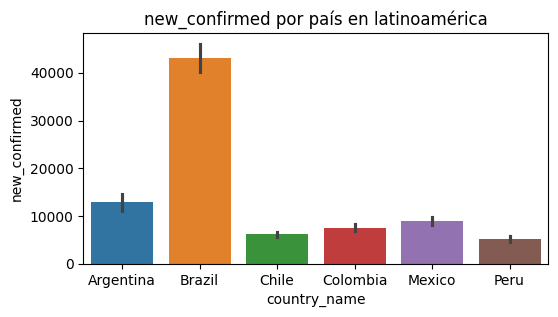

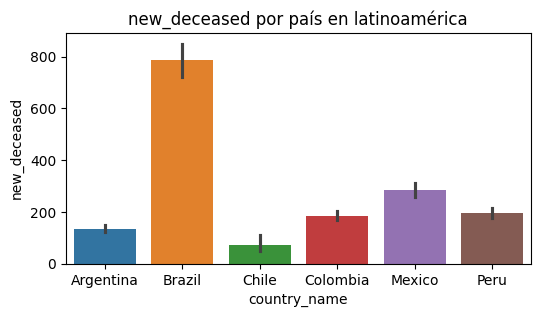

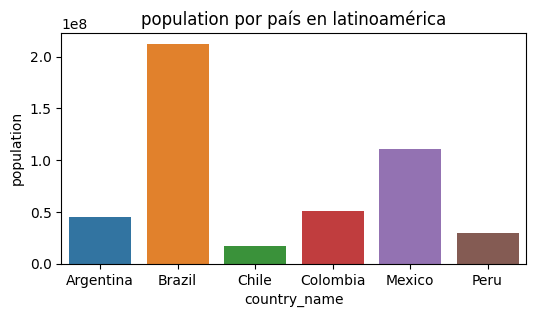

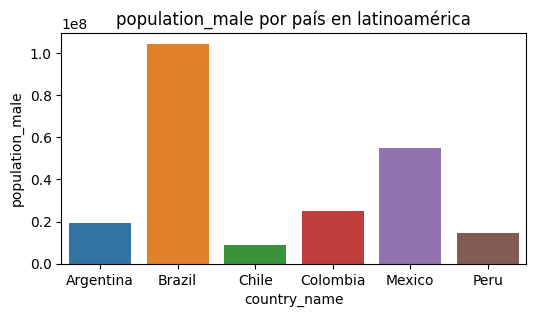

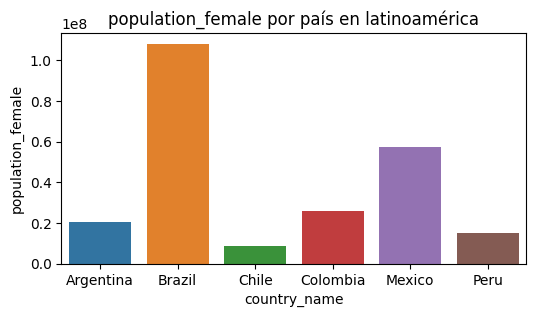

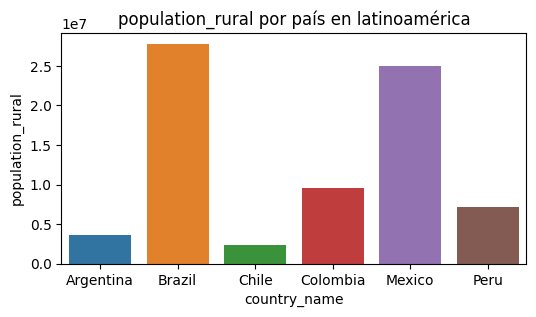

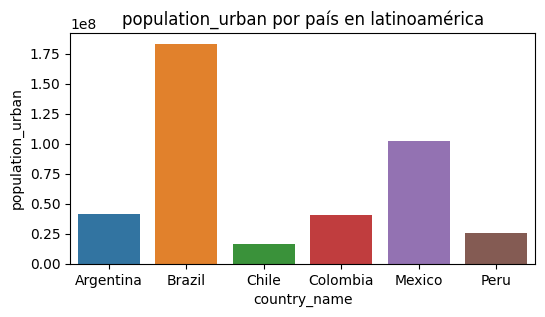

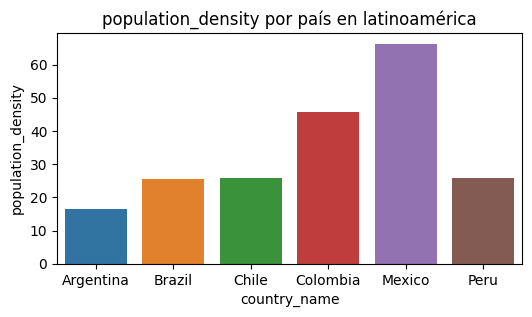

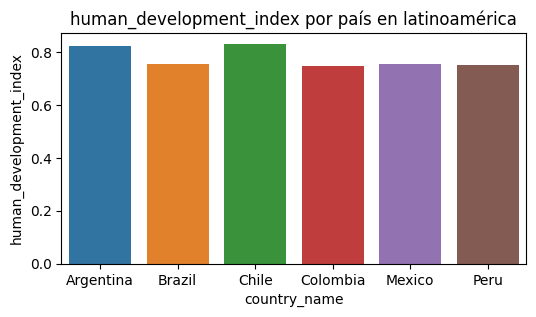

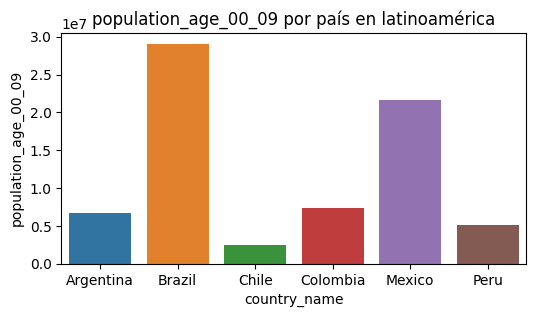

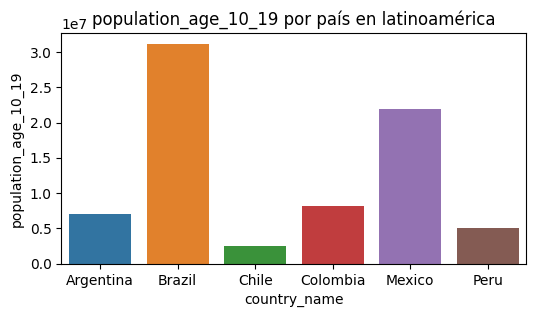

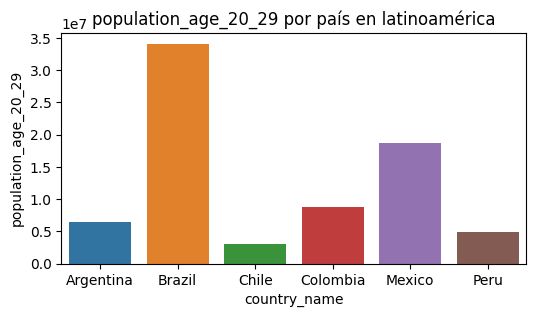

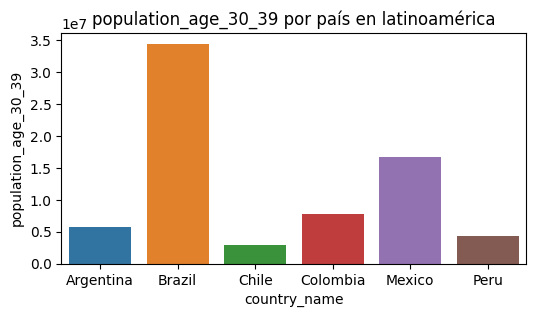

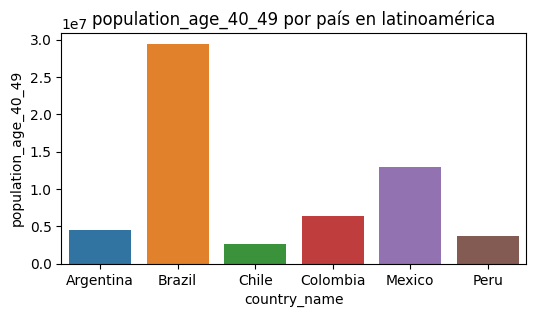

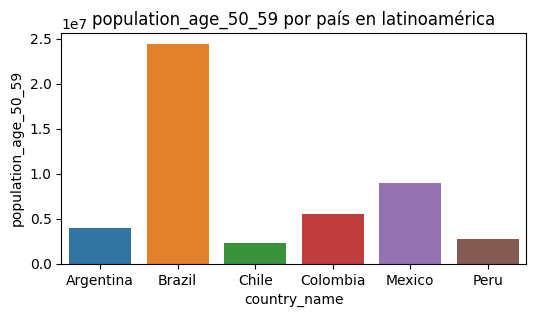

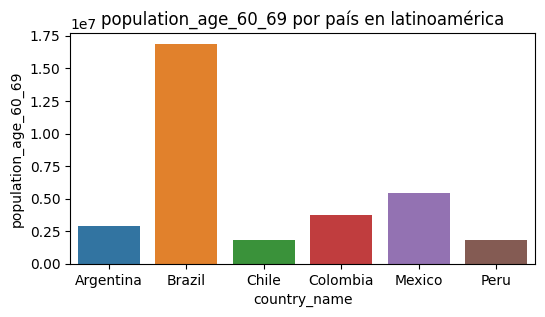

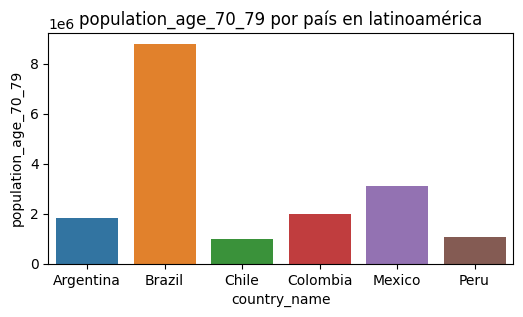

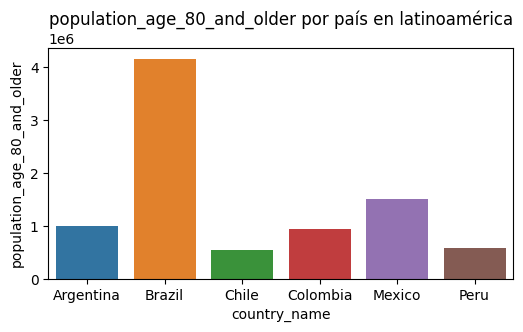

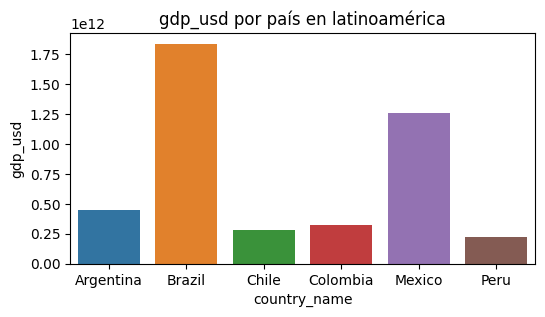

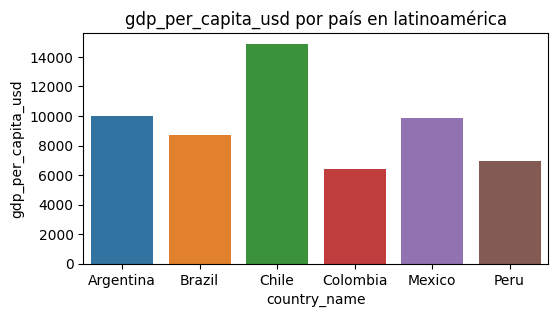

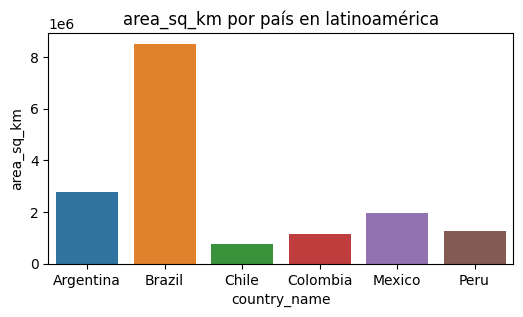

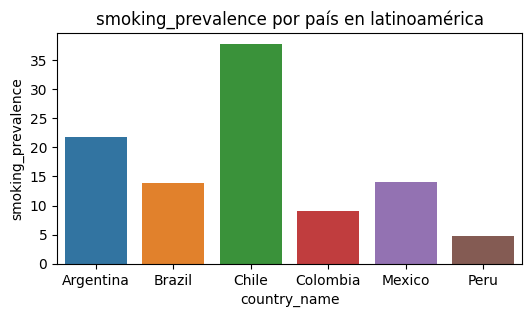

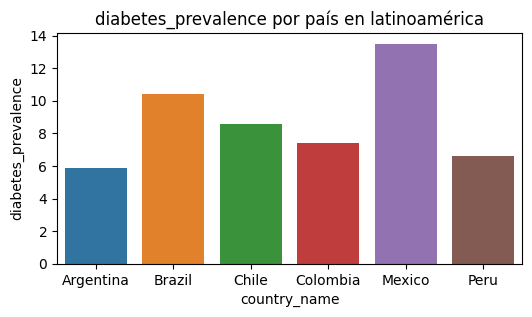

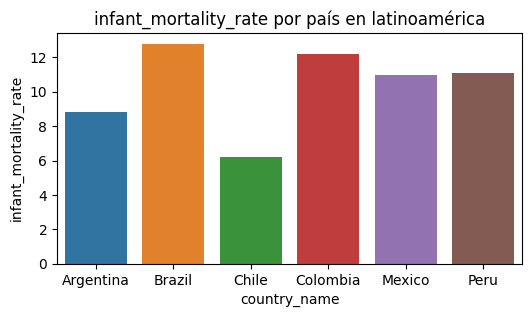

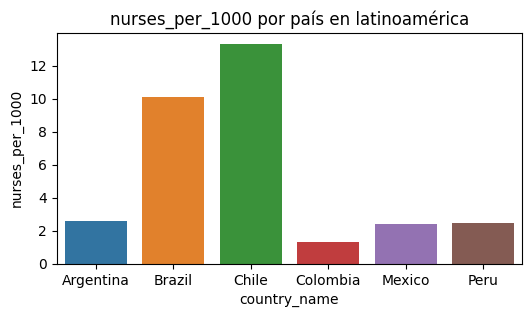

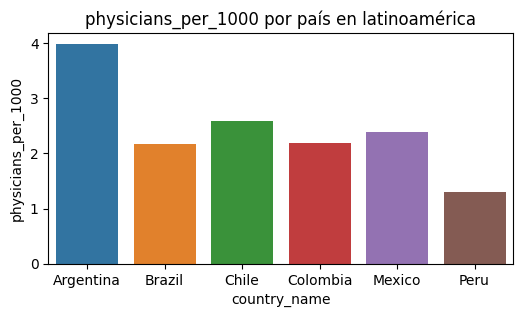

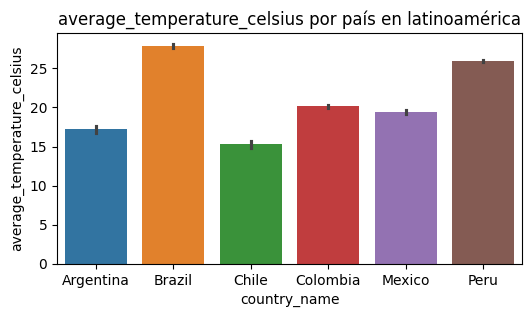

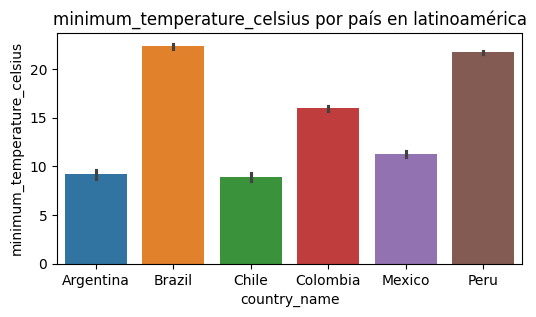

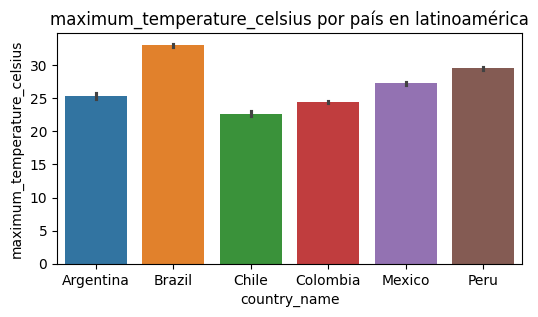

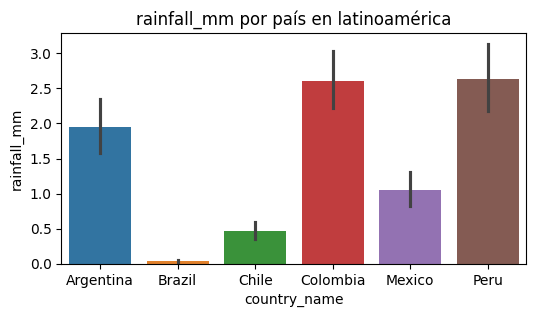

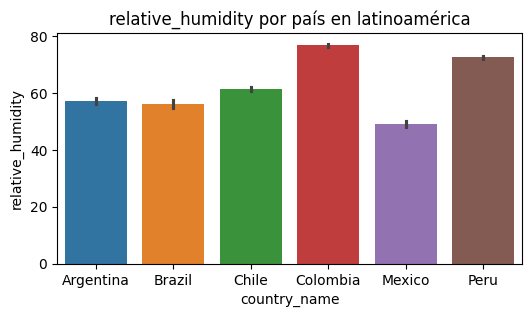

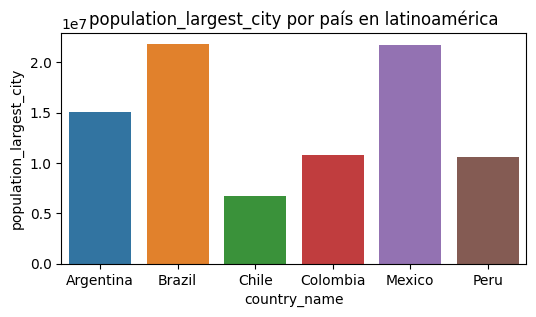

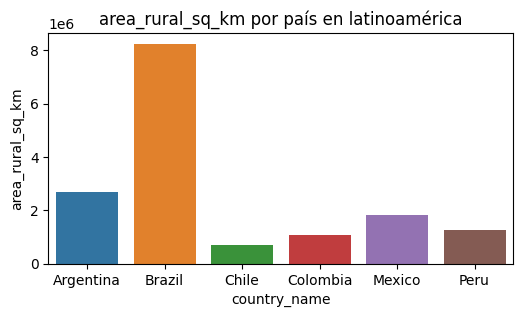

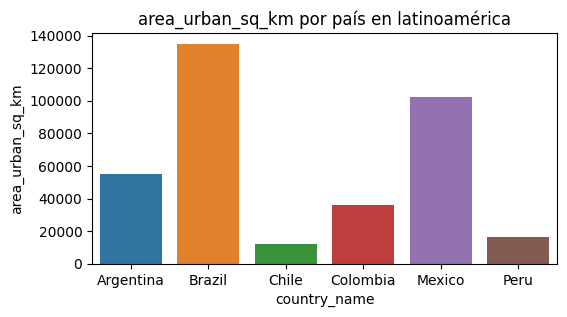

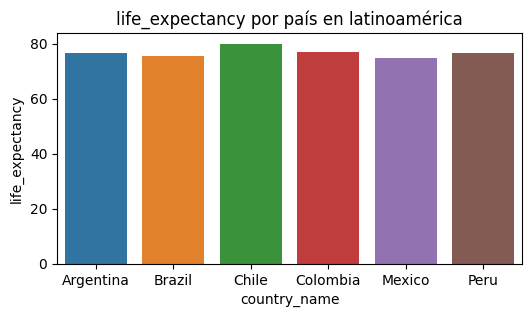

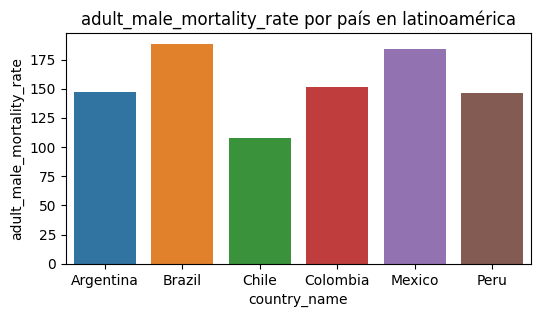

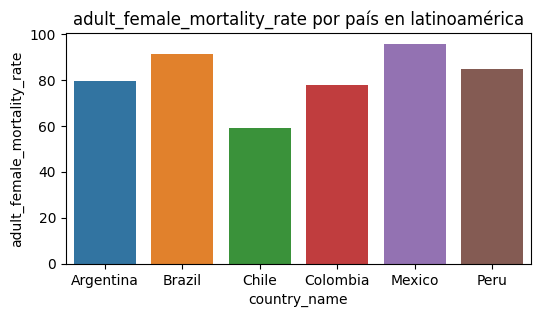

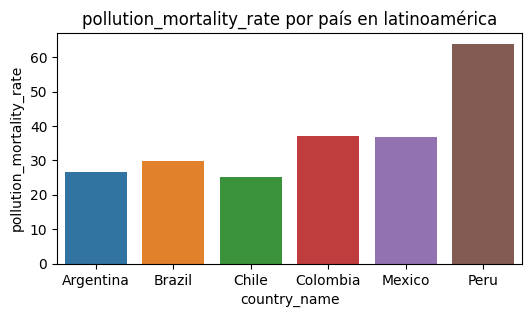

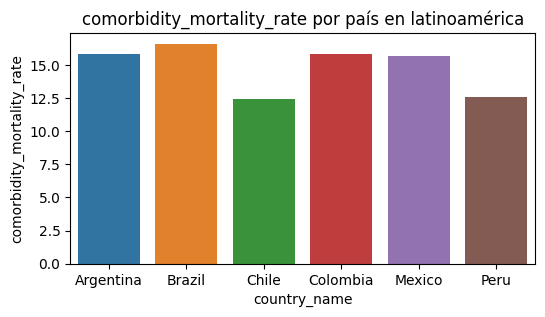

In [ ]:
#Ver cómo se comprotan las variables por país en un gráfico de barras, usando Seaborn
data_latinoamerica_paises = data_latinoamerica_paises.reset_index()
for i in data_latinoamerica_paises.columns: #Iterar variables para construir los barplots, uno por cada variable vs el país
    if i not in ['location_key','date','country_code','country_name','latitude','longitude','cumulative_confirmed', 'cumulative_deceased',
       'cumulative_recovered', 'cumulative_vaccine_doses_administered','new_recovered']: #No considero todas estas variables, que son las categóricas
        #porque el barplot requiere sí o sí variables numéricas
        fig, ax = plt.subplots(figsize=(6, 3))
        sns.barplot(x='country_name', y=i, data=data_latinoamerica_paises, ax=ax, hue='country_name')
        plt.title(f'{i} por país en latinoamérica')
        plt.show()


###### **Matriz de correlación (trata de crear una submascara para solo tomar una parte del gráfico y filtrar por los valores mayores a 0.5) y Mapa de calor de Métricas por país**

###### *Es un primer acercamiento para ver si existe alguna relación entre las variables para tener en cuenta para un análisis posterior.*

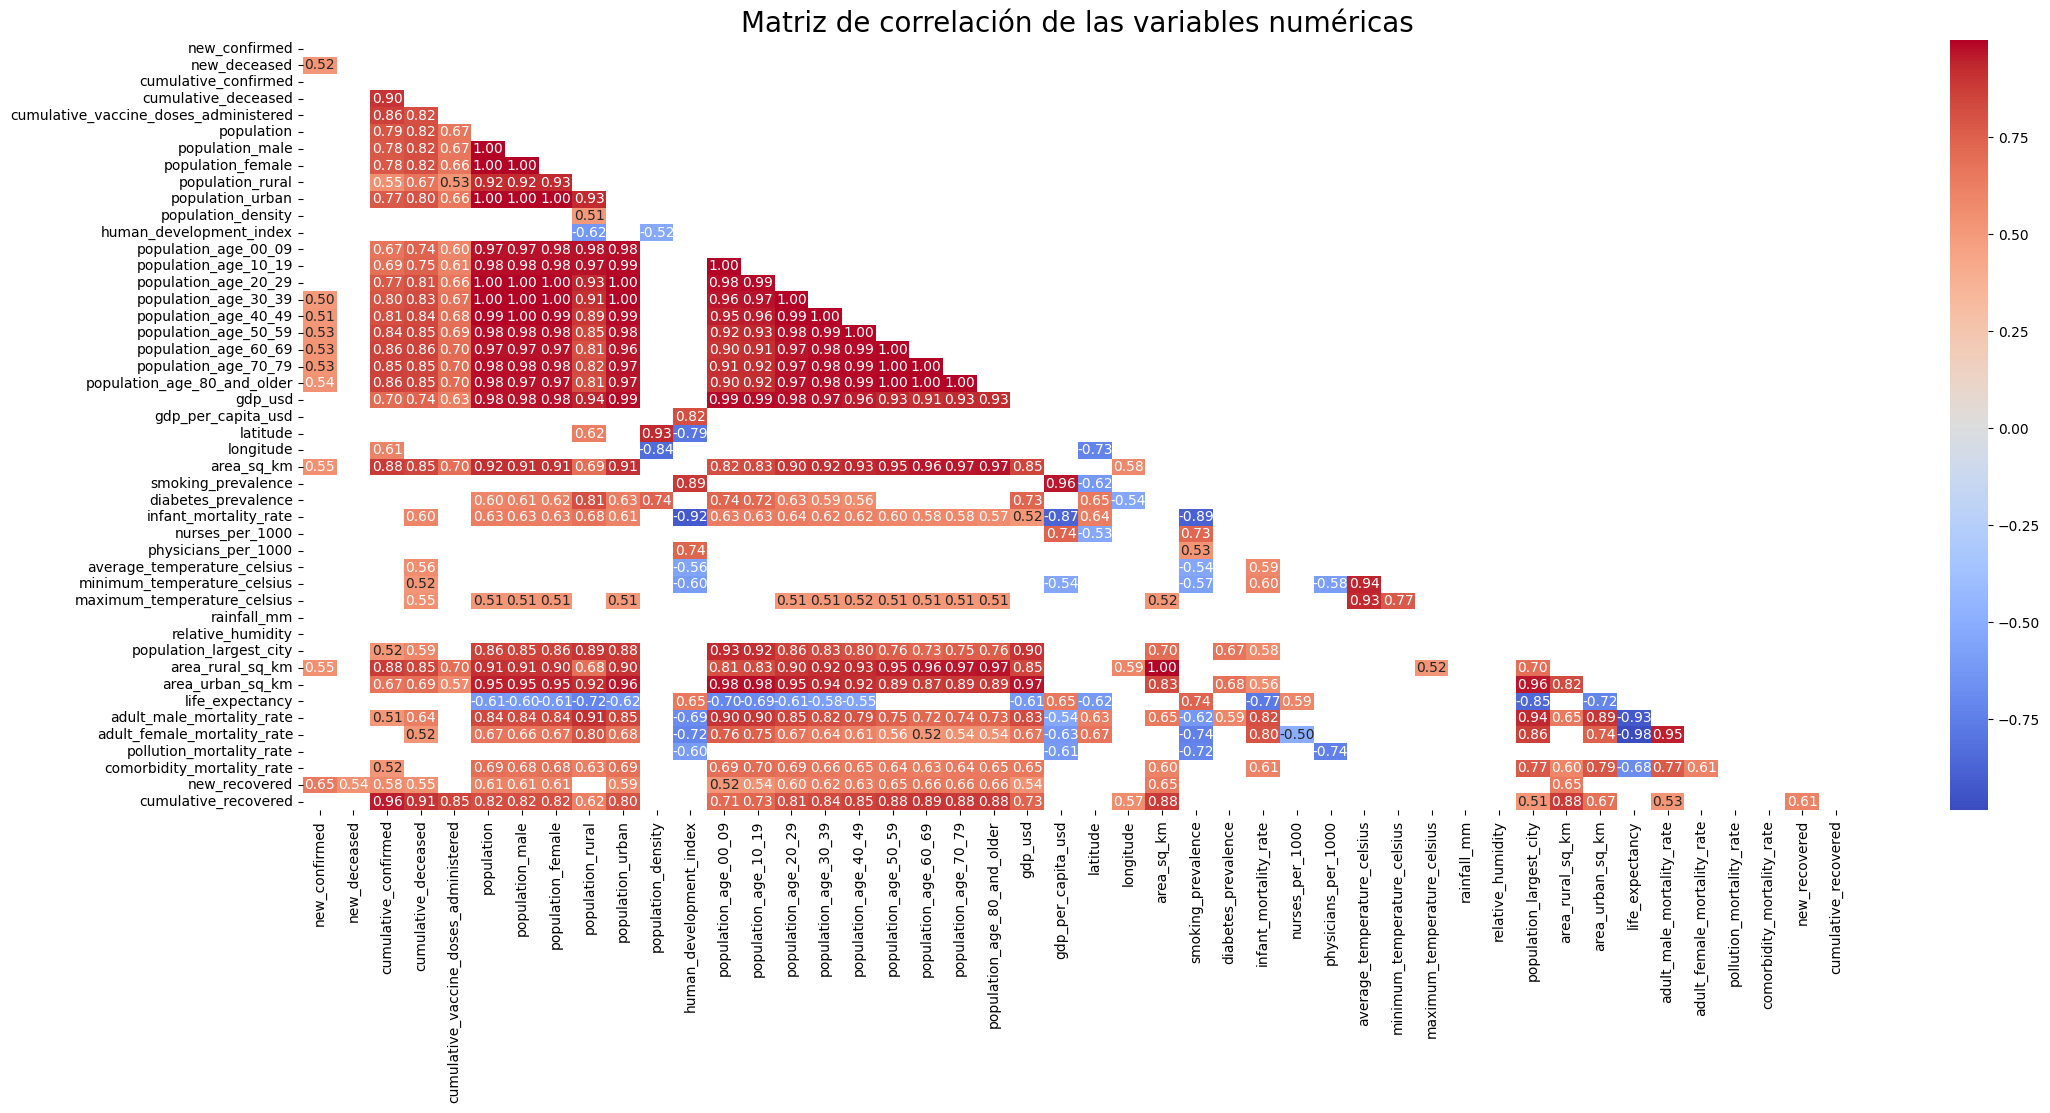

In [ ]:
numeric_columns = data_latinoamerica_paises.select_dtypes(include=['float64', 'int64']).columns #Selección de variables numéricas
correlation_matrix = data_latinoamerica_paises[numeric_columns].corr() #Creación de df de correlación con solo columnas numéricas (filtro aplicado con
#la máscara creada arriba)

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool)) #Creación de máscara para mostrar sola la mitad inferior de la matriz de correlación

correlation_matrix = correlation_matrix[abs(correlation_matrix) > abs(0.5)] #Máscara para mostrar correlación fuerte (positiva o negativa), valores
#por encima de 0.5

#Creación de la gráfica
plt.figure(figsize=(25, 10))
heatmap = sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación de las variables numéricas', fontsize=20)
plt.show()

###### **Histogramas de las variables que “Sí” tenga cambios de valores**

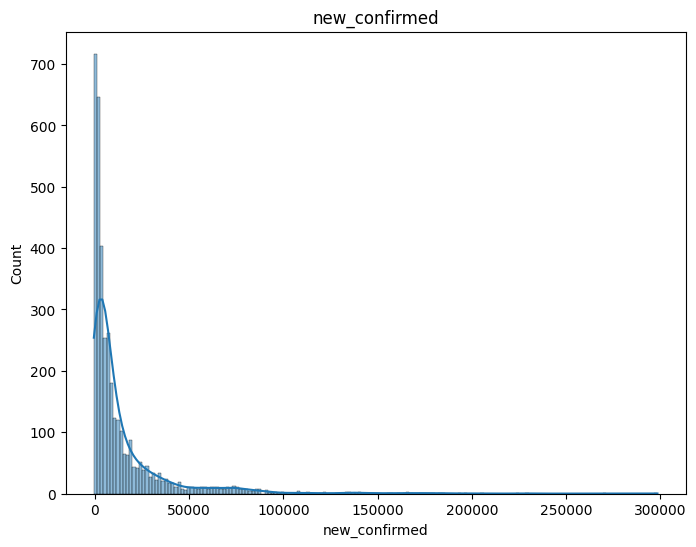

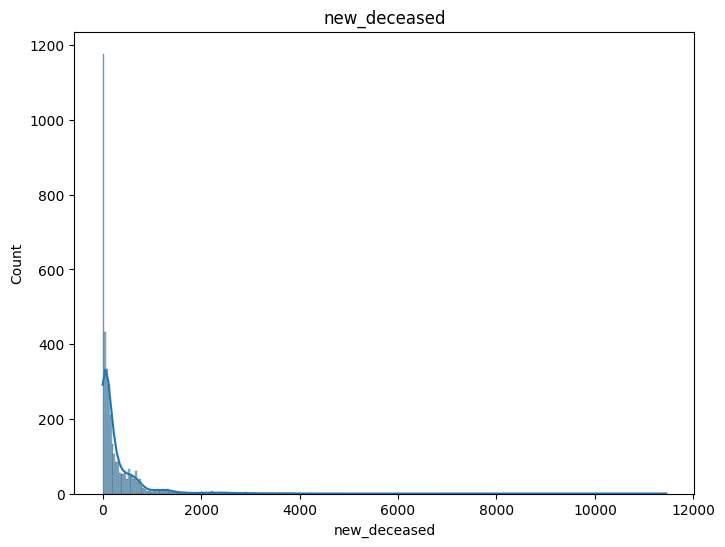

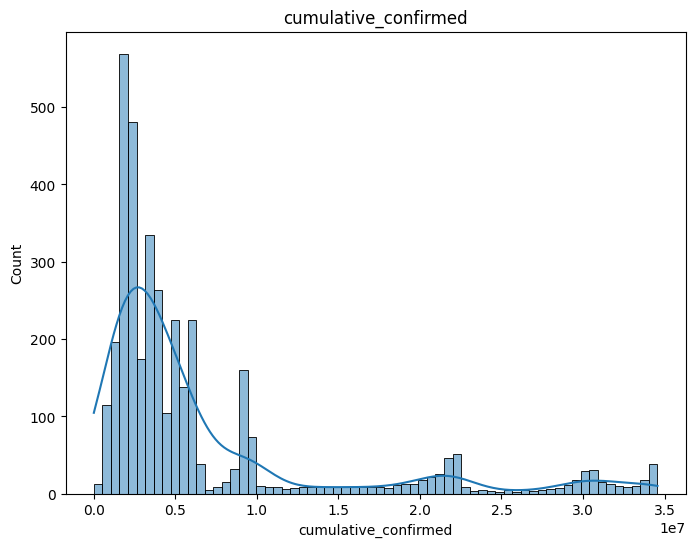

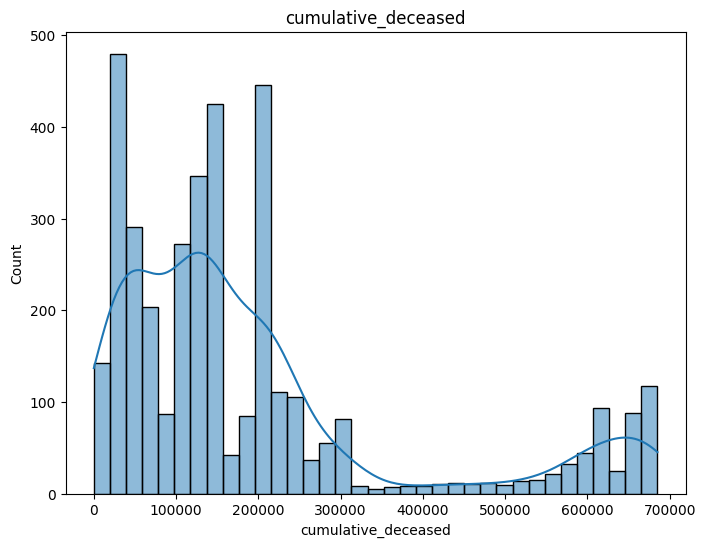

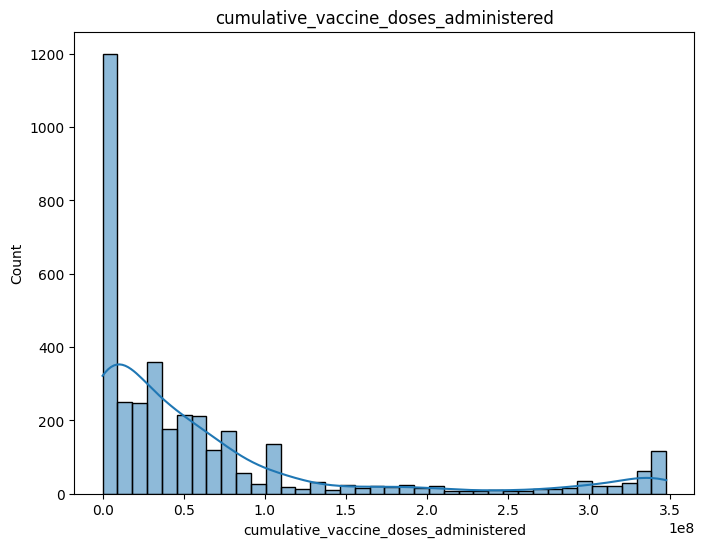

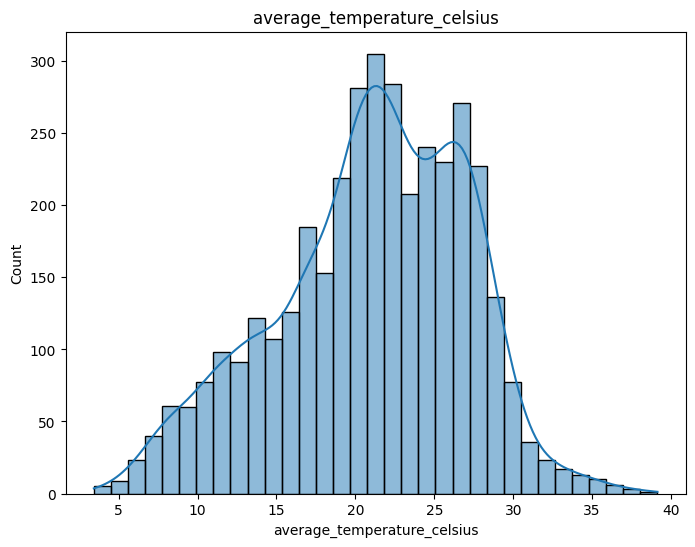

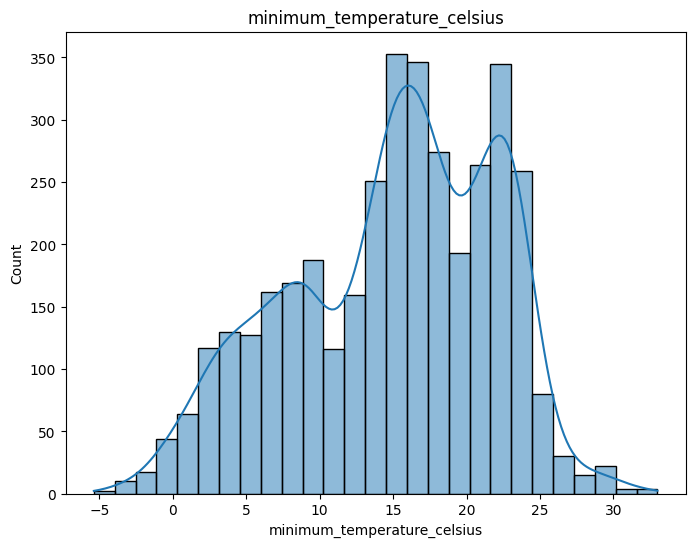

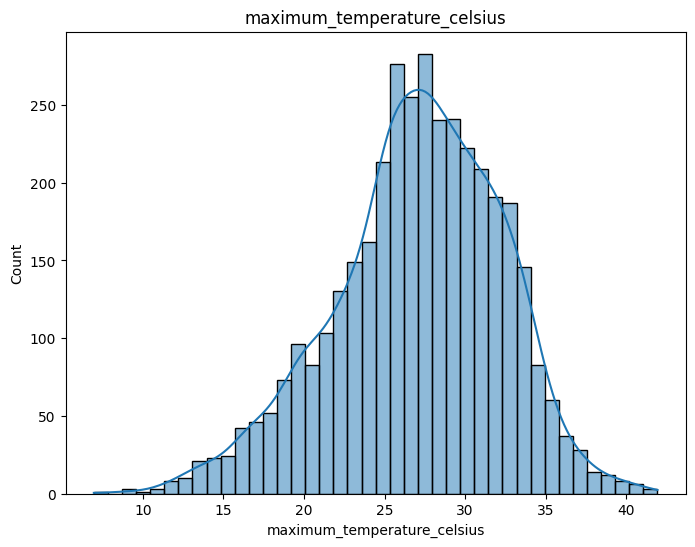

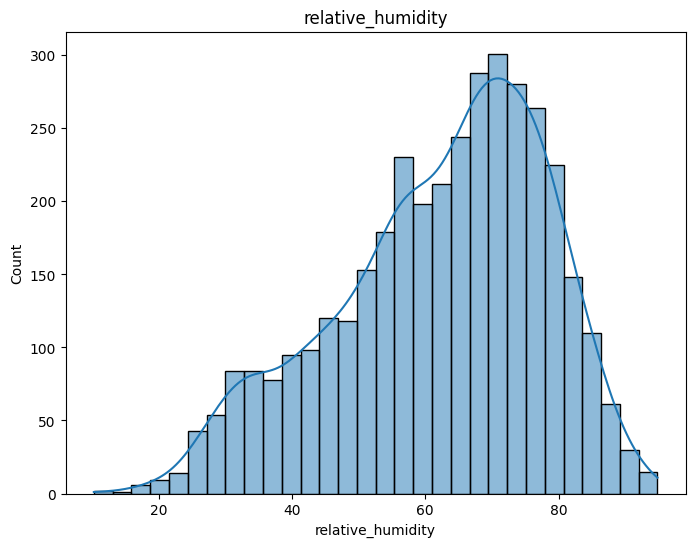

In [ ]:
lista_columnas_6=["new_confirmed","new_deceased","cumulative_confirmed","cumulative_deceased",
                  "cumulative_vaccine_doses_administered","average_temperature_celsius","minimum_temperature_celsius",
                  "maximum_temperature_celsius","relative_humidity"]

# Crear histogramas de las variables numéricas
for i in data_latinoamerica_paises[lista_columnas_6]: #Solo considerando las columnas seleccionadas previamente
    fig, ax = plt.subplots(figsize=(8,6))
    sns.histplot(data_latinoamerica_paises[i], kde=True)
    plt.title(i)
    plt.show()

###### **Diagrama de dispersión de la temperatura media contra los casos confirmados**

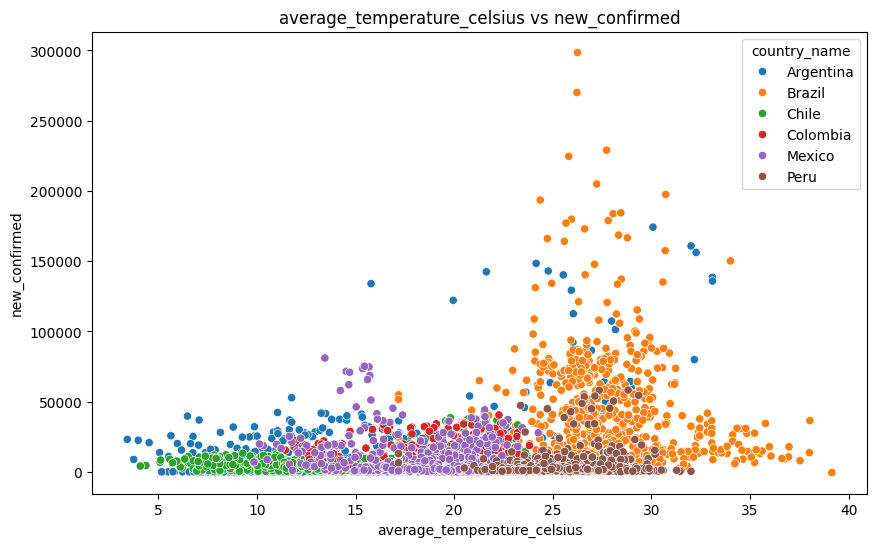

In [ ]:
# Grafica de average_temperature_celsius vs new_confirmed para tratar de entender el comportamiento de los casos respecto a la temperatura.
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x='average_temperature_celsius', y='new_confirmed', data=data_latinoamerica_paises, hue='country_name')
plt.title('average_temperature_celsius vs new_confirmed')
plt.show()

##### *Se ha podido observar que en algunos paises la temperatura no influye en la cantidad de casos confirmados, sin embargo en otros paises (Argentina y Brazil, tal vez un poco Mexico y Perú) si se puede observar una relación entre la temperatura y la cantidad de casos confirmados.*

###### **Diagrama de dispersión de la temperatura media contra las muertes confirmadas**

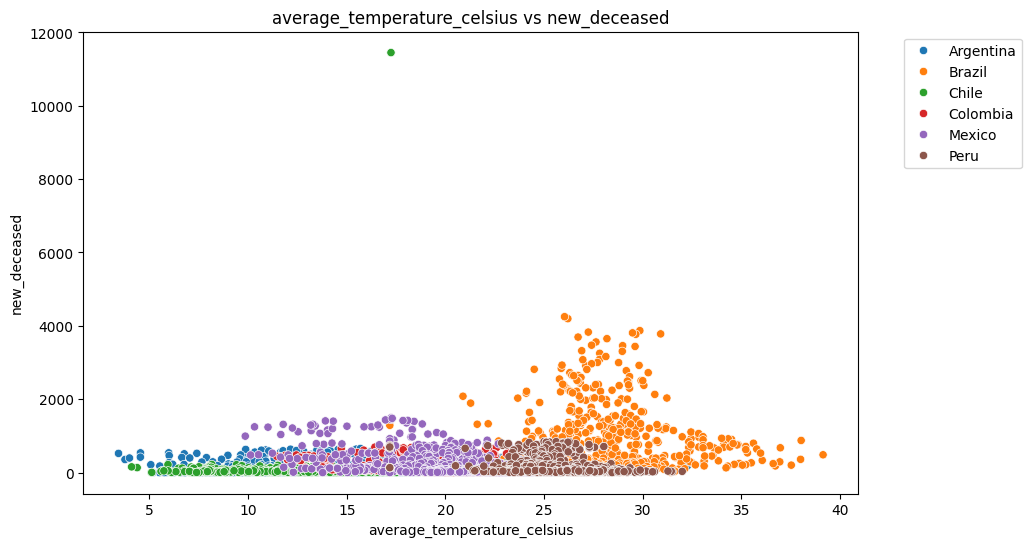

In [ ]:
# Grafica de average_temperature_celsius vs new_deceased
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x='average_temperature_celsius', y='new_deceased', data=data_latinoamerica_paises, hue='country_name')
plt.title('average_temperature_celsius vs new_deceased')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

##### *En la grafica anterior se ve un comportamiento similar al de los casos confirmados, en algunos paises la temperatura no influye en la cantidad de muertes, sin embargo en otros paises (Brazil y un caso en Chile, tal vez un poco en Mexico) si se puede observar una relación entre la temperatura y la cantidad de muertes.*

###### **Comportamiento de las dosis administradas de todos los países (Valor medio)**


In [ ]:
data_latinoamerica_paises['date'] = pd.to_datetime(data_latinoamerica_paises['date'])
data_latinoamerica_paises.set_index('date', inplace=True)

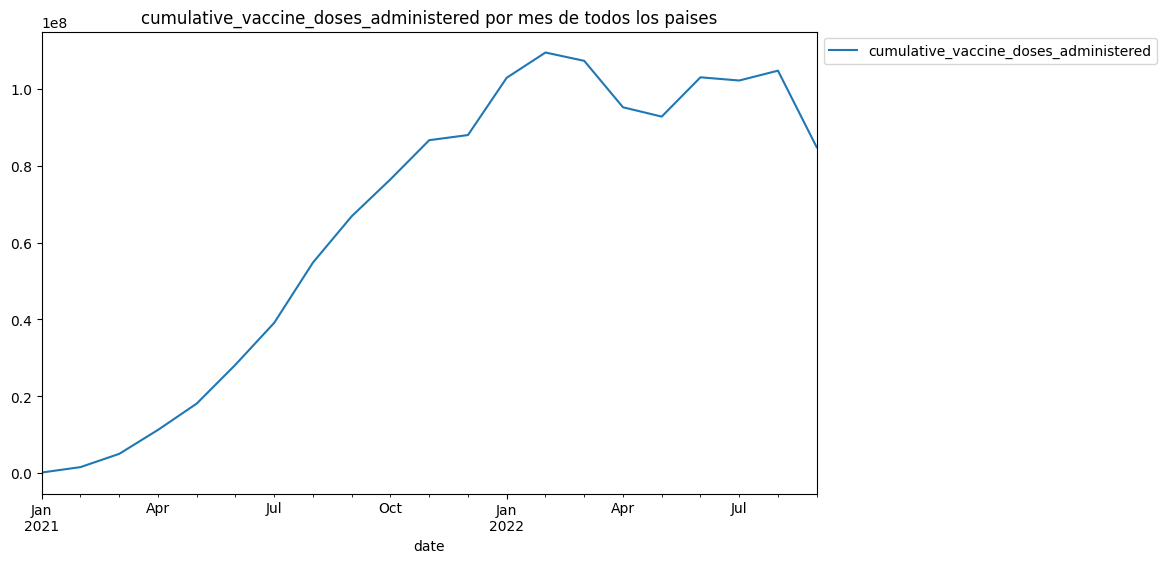

In [ ]:
# Grafica de valores medios de todos los paises de cumulative_vaccine_doses_administered
fig, ax = plt.subplots(figsize=(10, 6))
data_latinoamerica_paises.resample('ME').mean(numeric_only=True)['cumulative_vaccine_doses_administered'].plot()
#.resample("ME") agrupa los datos por finales de mes ("Month-End"=ME) habiendo un solo punto que represente cada mes
#Nos aseguramos que la columna sobre la que se calcule el promedio sea numérica, en este caso "cumulative_vaccine_doses_administered"
plt.legend(bbox_to_anchor=(1, 1), loc='upper left') #Ubicación de leyenda por fuera del gráfico 
plt.title('cumulative_vaccine_doses_administered por mes de todos los paises')
plt.show()

##### *La cantidad de dosis administradas en Argentina, Brasil, Chile, Colombia, México y Perú ha ido aumentando a lo largo del tiempo*

###### **Evolución de dosis administradas por mes de cada país**

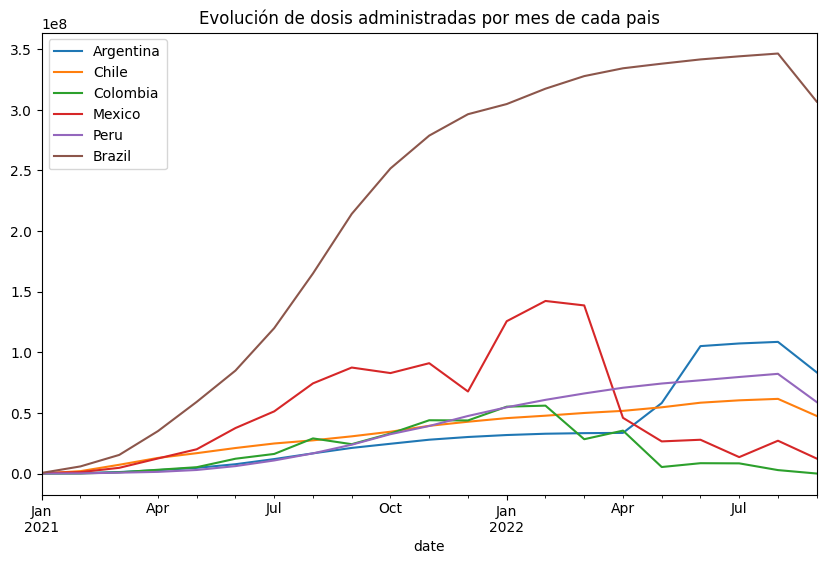

In [ ]:
#Para un análisis más detallado
fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['cumulative_vaccine_doses_administered'].plot()
plt.title('Evolución de dosis administradas por mes de cada pais')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

##### *En algunos paises la cantidad de dosis administradas ha ido aumentando a lo largo del tiempo (Brazil, Argentina en menor proporción), sin embargo en otros paises la cantidad de dosis administradas ha ido disminuyendo (Mexico, Colombia). Esto puede ser debido a muchos factores, como la cantidad de vacunas disponibles, la cantidad de personas que se han vacunado, los recursos disponibles para programas de vacunación.*

###### **Muertes por mes de cada país**

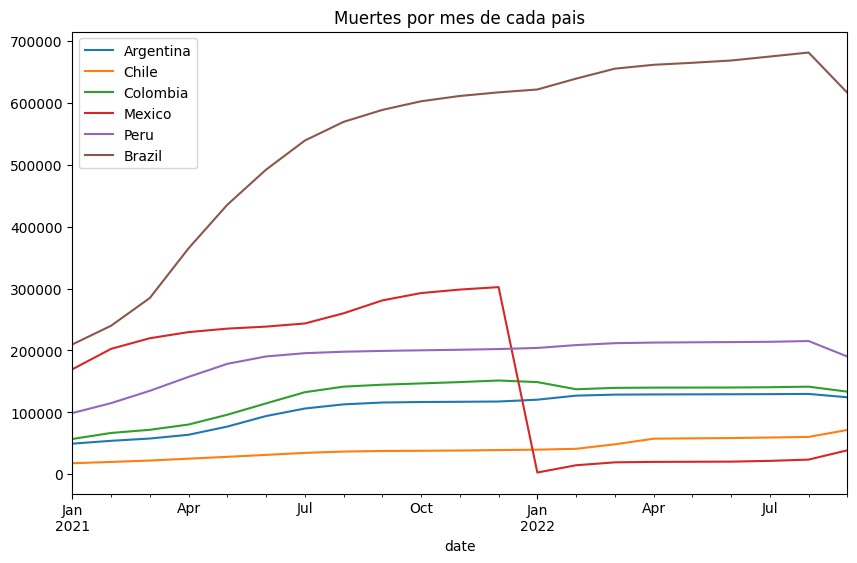

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['cumulative_deceased'].plot()
plt.title('Muertes por mes de cada pais')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

##### *El país con más muertes es Brazil, seguido de México (con una marcada caída a partir de diciembre 2021-enero 2022 dado por disminución real de casos o pérdida de datos). Luego siguen Peru, Colombia, Argentina y Chile, aunque esto no implica que hayan hecho un mal manejo en la pandemia, sino que también puede estar influenciado por la cantidad de habitantes y los datos disponibles.*

###### **Casos confirmados por mes de cada país**


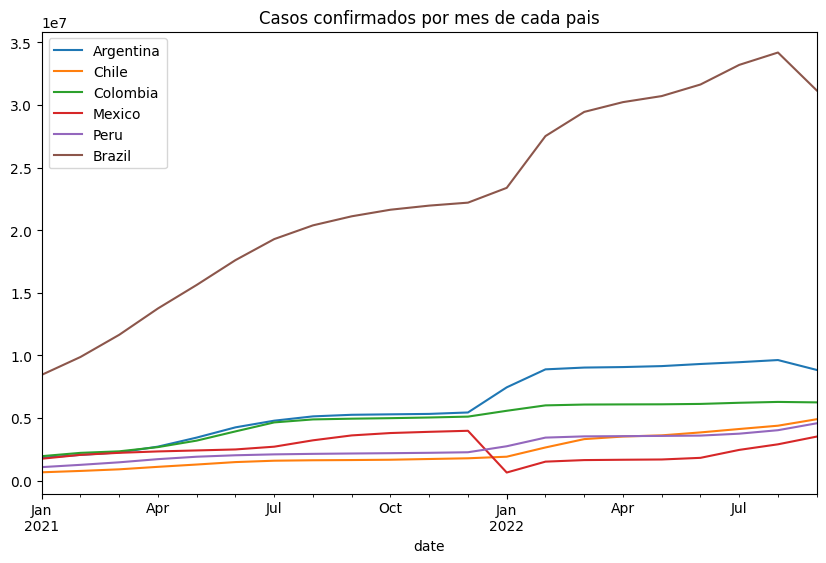

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['cumulative_confirmed'].plot()
plt.title('Casos confirmados por mes de cada pais')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

##### *El país que más casos confirmados ha tenido es Brasil, seguido de Argentina, Colombia, Chile, Perú y México. Nuevamente esto no implica que hayan hecho un mal manejo en la pandemia, sino que también puede estar influenciado por la cantidad de habitantes y los datos disponibles.*

###### **Recuperaciones de casos por mes de cada país**

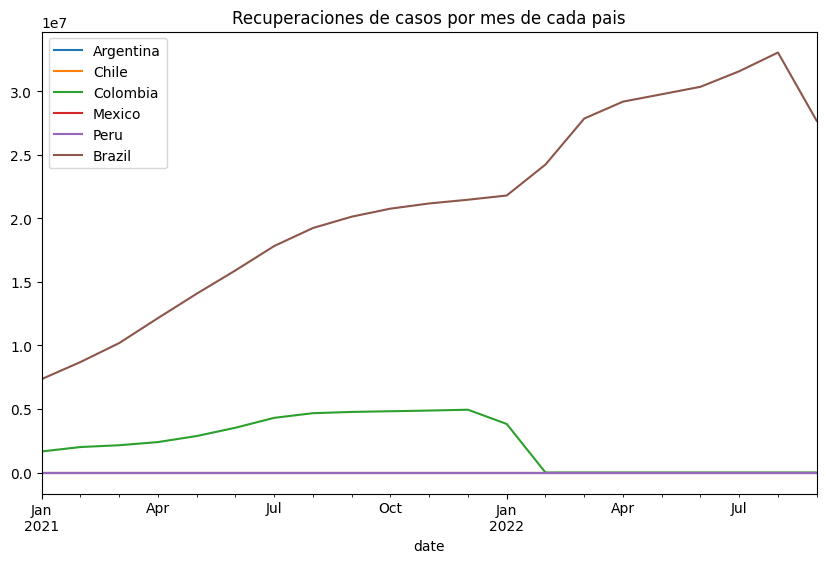

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['cumulative_recovered'].plot()
plt.title('Recuperaciones de casos por mes de cada pais')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

##### *El país con más recuperados por mes ha sido Brasil, pero esto puede relacionarse con la cantidad de personas y vacunas disponibles.*

###### **Comparación del Número de Casos Nuevos entre Países**


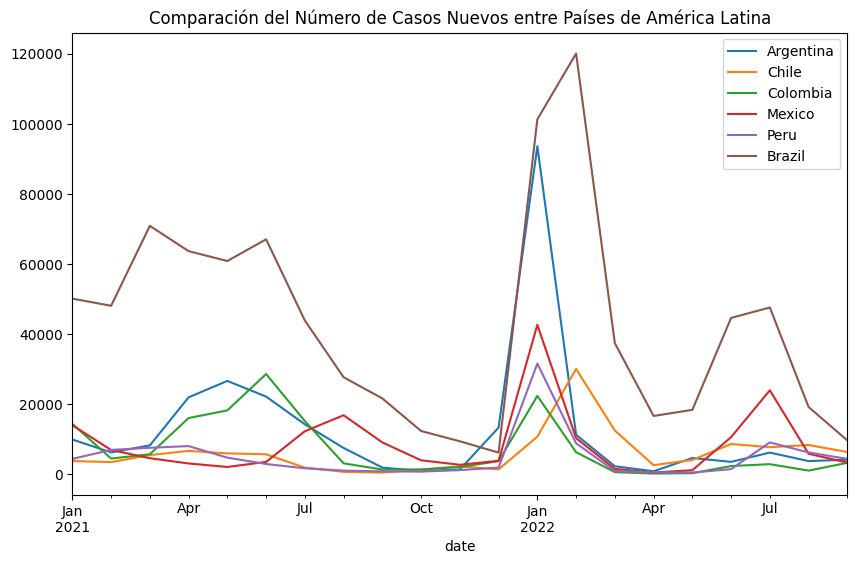

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['new_confirmed'].plot()
plt.title('Comparación del Número de Casos Nuevos entre Países de América Latina')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

##### *De los paises que mejor manejó la pandemia fue Chile, seguido de Perú, Colombia, México, Argentina y Brasil, ya que la cantidad de muertes y casos confirmados ha sido menor y más constante en el tiempo, y no han administrado una dosis desproporcionada de vacunas.*

###### **Dosis acumuladas por país**

Text(0.5, 1.0, 'Distribución de dosis acumuladas por país')

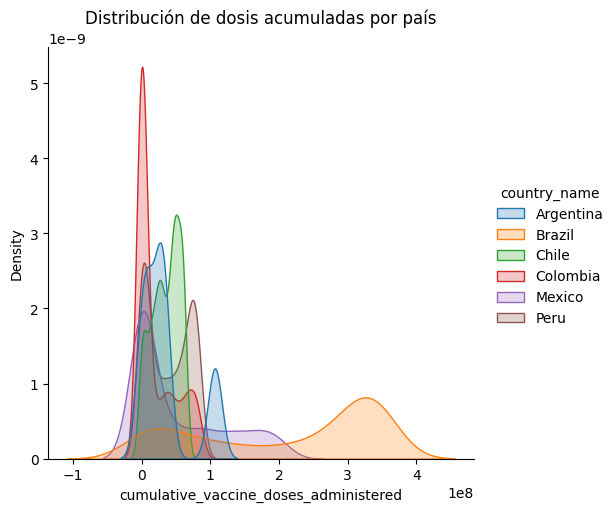

In [ ]:
sns.displot(data_latinoamerica_paises, x="cumulative_vaccine_doses_administered", hue="country_name", kind="kde", fill=True)
#Visualizar distribución de "cumulative_vaccine_doses_administered" usando el kde y rellenando el área
plt.title('Distribución de dosis acumuladas por país')

##### *Los países que peor manejaron la pandemia fueron Brasil, seguido de México, Colombia, Argentina, Perú y Chile, ya que poseen una mayor cantidad de muertes y casos confirmados habiendo administrado una gran cantidad de dosis de vacunas.*

###### **Boxplot de temperatura media de cada país**


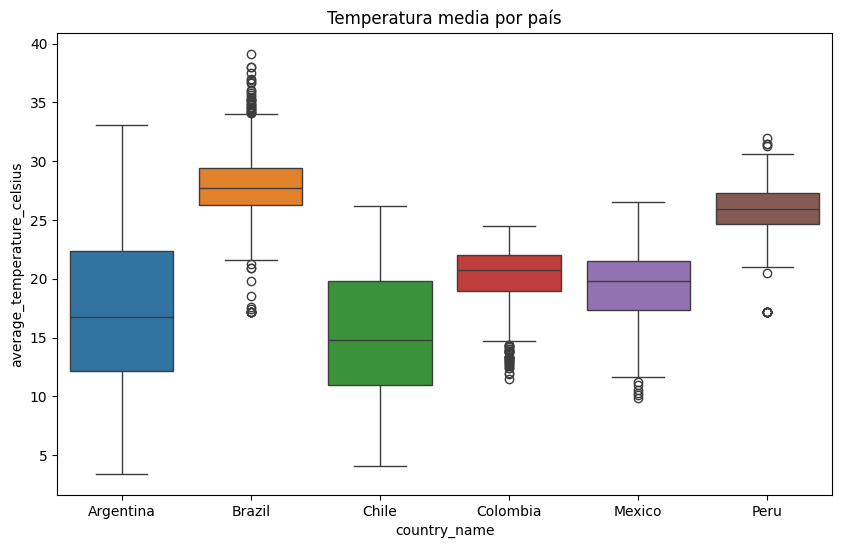

In [ ]:
#average_temperature_celsius por pais boxplot
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x='country_name', y='average_temperature_celsius', data=data_latinoamerica_paises, hue='country_name')
plt.title('Temperatura media por país')
plt.show()

##### *Brasil es el país que presenta rangos más diferentes, con muchos más outliers y a su vez es el que ha tenido mayor cantidad de casos confirmados y de muertes, con un gran número de vacunas administradas.*

###### **Violinplot de las variables que “Sí” tenga cambios de valores**

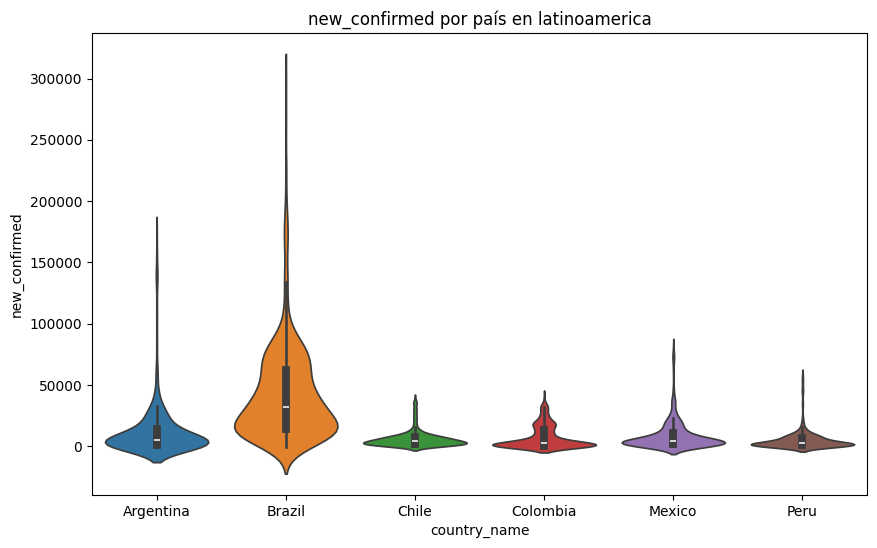

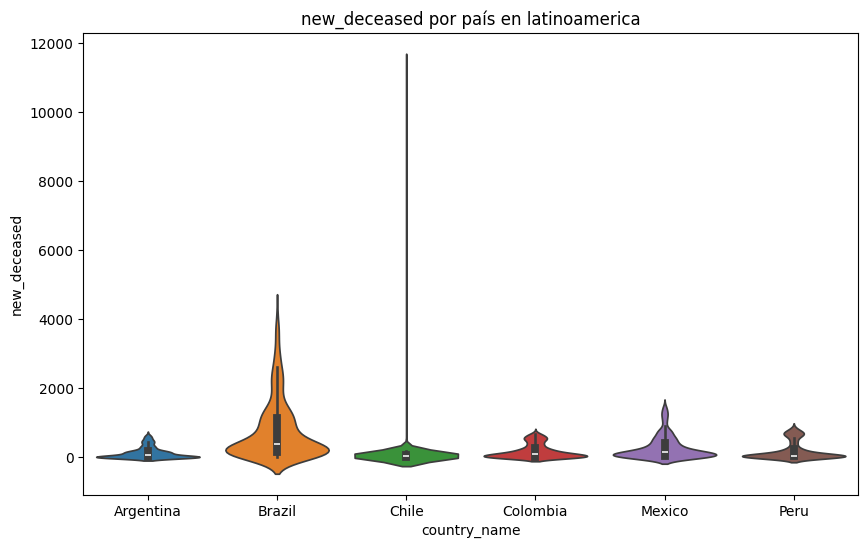

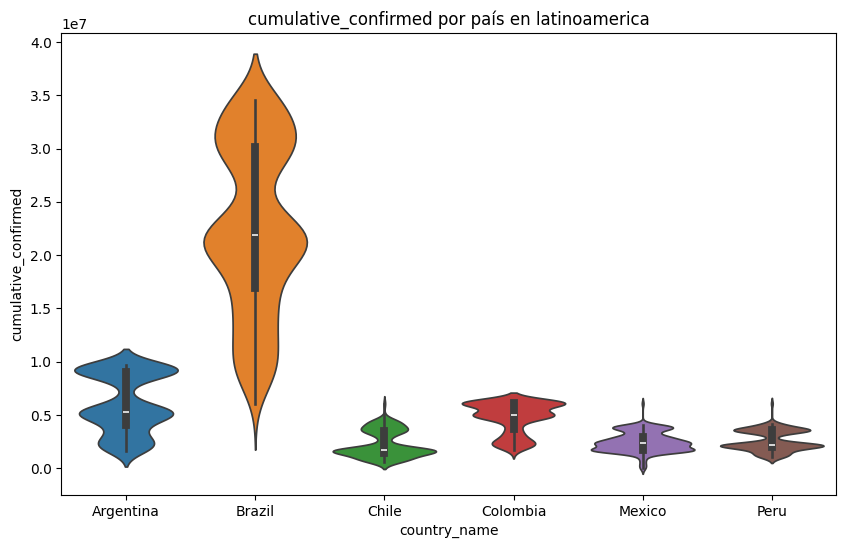

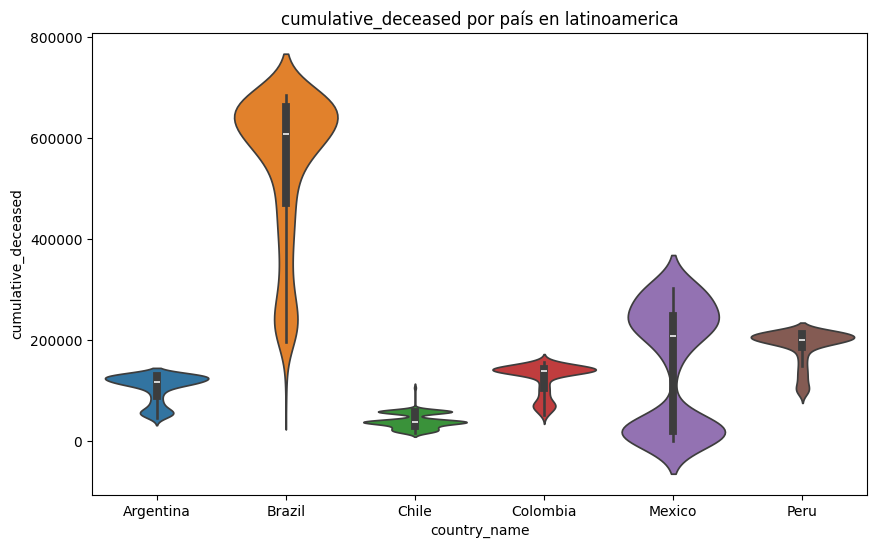

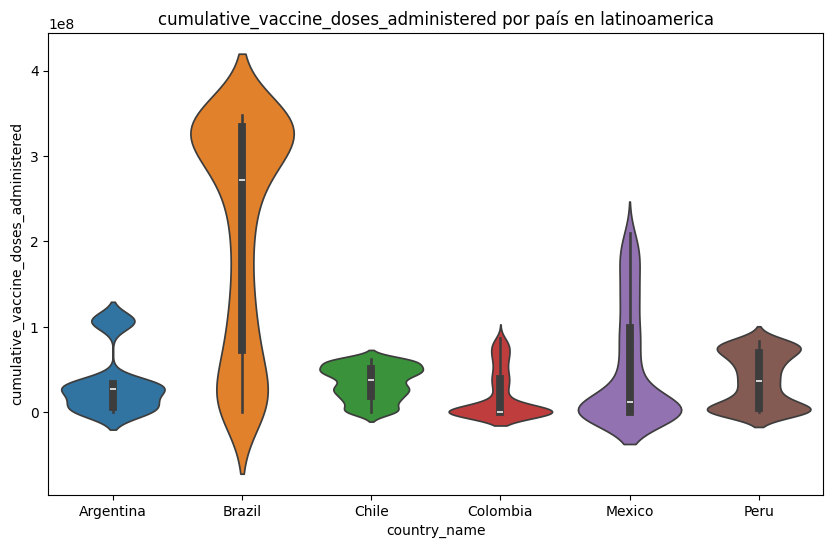

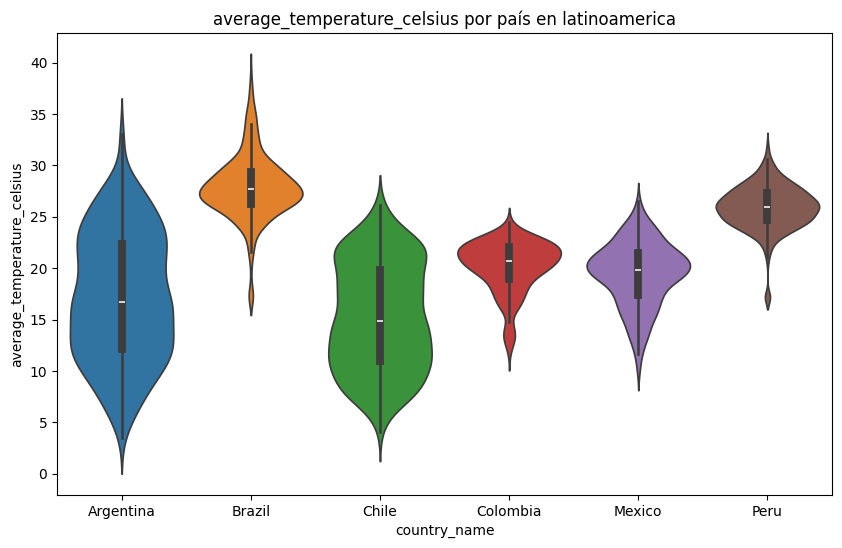

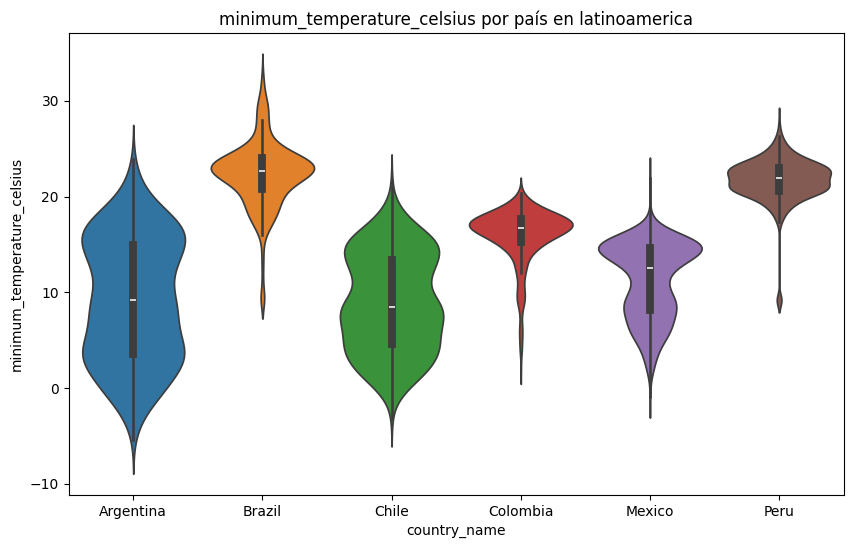

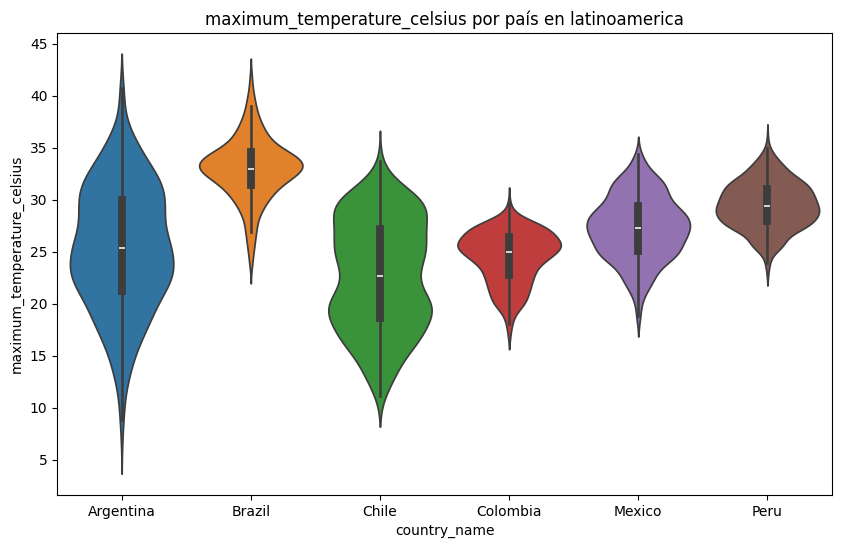

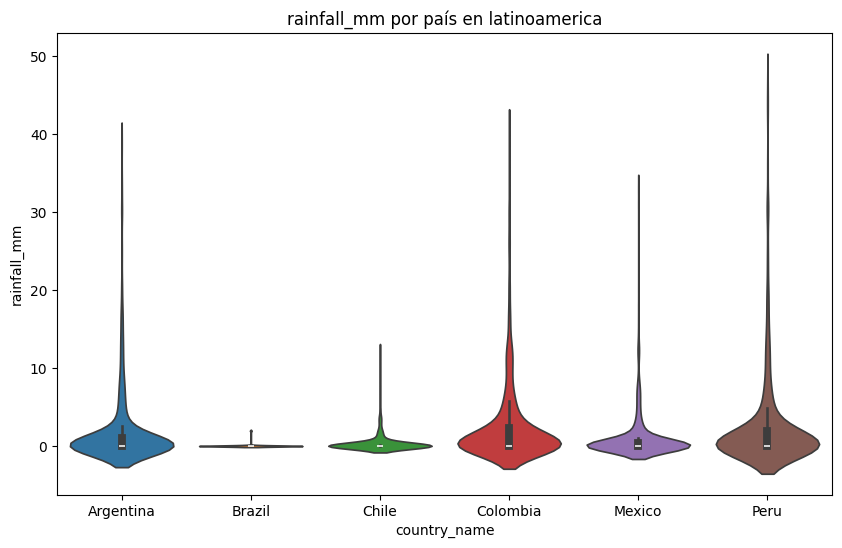

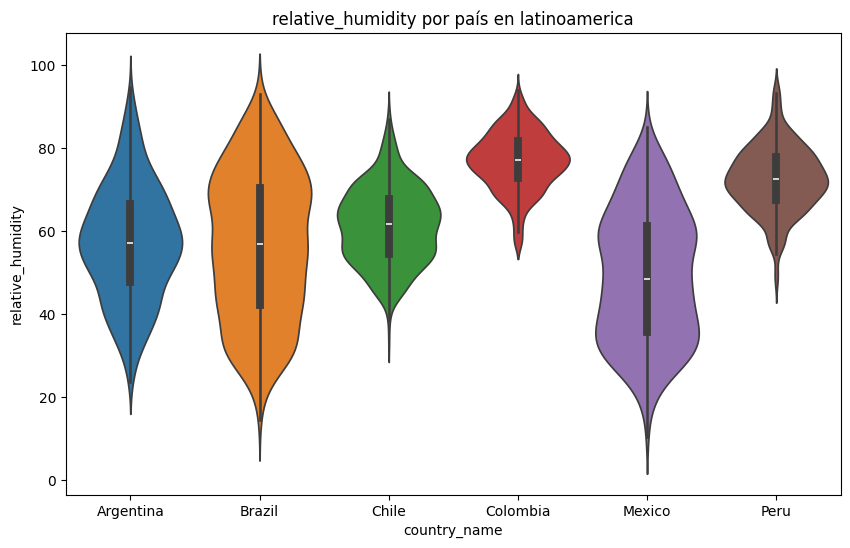

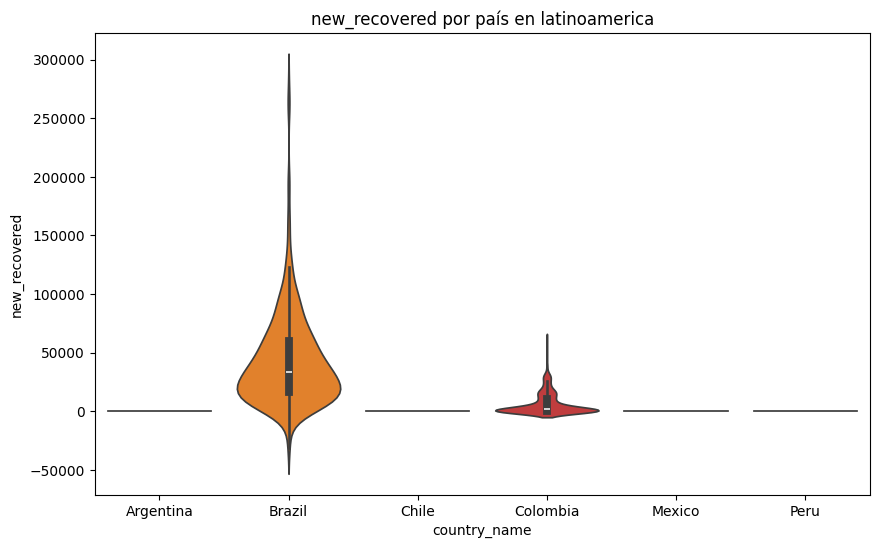

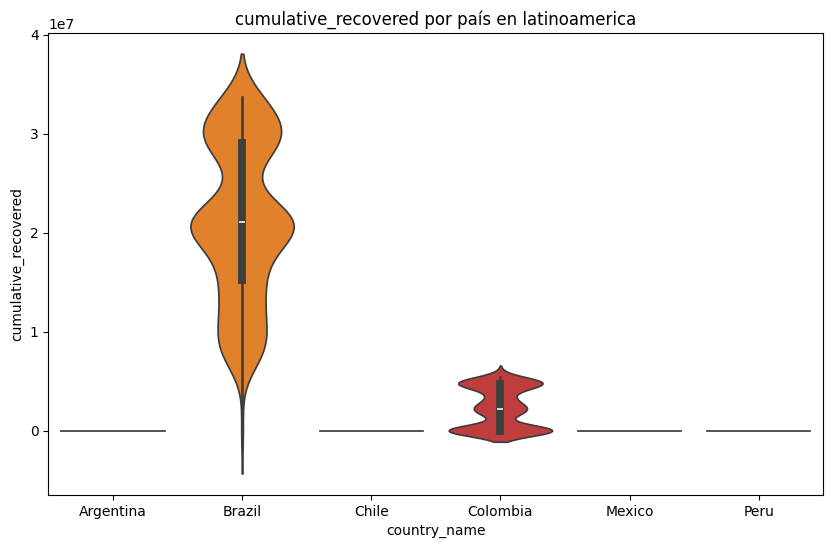

In [ ]:
# Se crea un dataframe con las columnas mayores a 6 registros porque son las que tienen valores diferentes para cada país.
columnas_mayores_6=[]
for i in data_latinoamerica_paises.columns:
    if i not in ['location_key','date','country_code','latitude','longitude']: #Descartamos 
        if data_latinoamerica_paises[i].nunique()>6:
            columnas_mayores_6.append(i)
#agregar a columnas_mayores_6 la columna country_name para poder hacer analisis por país.
columnas_mayores_6.append('country_name')

# Se crea un dataframe con las columnas mayores a 6
data_latinoamerica_paises_mayores_6=data_latinoamerica_paises[columnas_mayores_6]


# violinplot en todos los paises para variables numericas
for i in data_latinoamerica_paises_mayores_6.columns:
    if i not in ['location_key','date','country_code','latitude','longitude','country_name']: #Descartamos 
        fig, ax = plt.subplots(figsize=(10, 6))
        sns.violinplot(x='country_name', y=i, data=data_latinoamerica_paises_mayores_6,hue='country_name')
        plt.title(f'{i} por país en latinoamerica')
        plt.show()

###### **Distribución de la población por grupos de edad**


In [ ]:
pd.set_option('display.float_format', '{:.2f}'.format) #Modificamos cómo se mostraran los float "display.float.format"para que muestre solo 2 decimales

In [ ]:
cut_columns = ['country_name','population_age_00_09', 'population_age_10_19', 'population_age_20_29', 'population_age_30_39', 'population_age_40_49', 'population_age_50_59', 'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older']
#Lista con columnas a usar
last_cases = data_latinoamerica_paises[cut_columns].groupby('country_name').last().sort_values(by='population_age_00_09')
#Selección de columnas a usar agrupadas por país seleccionando últimos datos y ordenando ascendentemente en función del rango de edad de la población
#0-9 años
age_columns = ['population_age_00_09', 'population_age_10_19', 'population_age_20_29', 'population_age_30_39', 'population_age_40_49', 'population_age_50_59', 'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older']
#Columnas de edad 
age_distribution = last_cases[age_columns].sum()
#Selección de columnas de edad y suma de los valores de cada una para obtener la distribución total de la población por rango de edad por país
age_distribution

population_age_00_09          72354498.00
population_age_10_19          75821668.00
population_age_20_29          75953404.00
population_age_30_39          72153175.00
population_age_40_49          59596656.00
population_age_50_59          47961620.00
population_age_60_69          32654396.00
population_age_70_79          17789478.00
population_age_80_and_older    8711719.00
dtype: float64

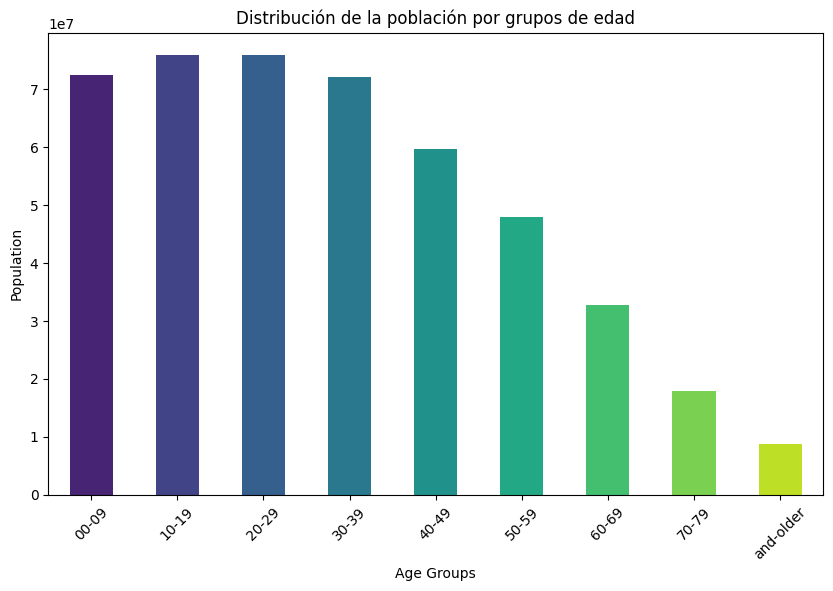

In [ ]:
plt.figure(figsize=(10, 6))
colors = sns.color_palette("viridis", len(age_columns)) #Definí qué colores usar
age_distribution.plot(kind='bar', color=colors, stacked=True,)
plt.xlabel('Age Groups')
plt.ylabel('Population')
plt.title('Distribución de la población por grupos de edad')
plt.xticks(range(len(age_columns)), [col.split('_')[-2] + '-' + col.split('_')[-1] for col in age_columns], rotation=45)
#Crea las etiquetas separando el nombre de la columna y quedándose con los últimos 2 elementos separados por "-" y lo aplica por ciclo for a todas
#las columnas comprendidas en "age-columns"
plt.show()

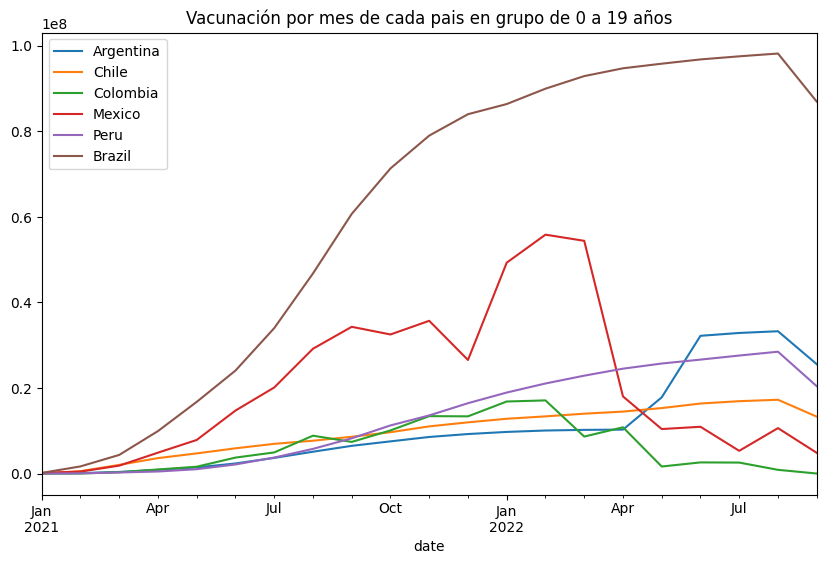

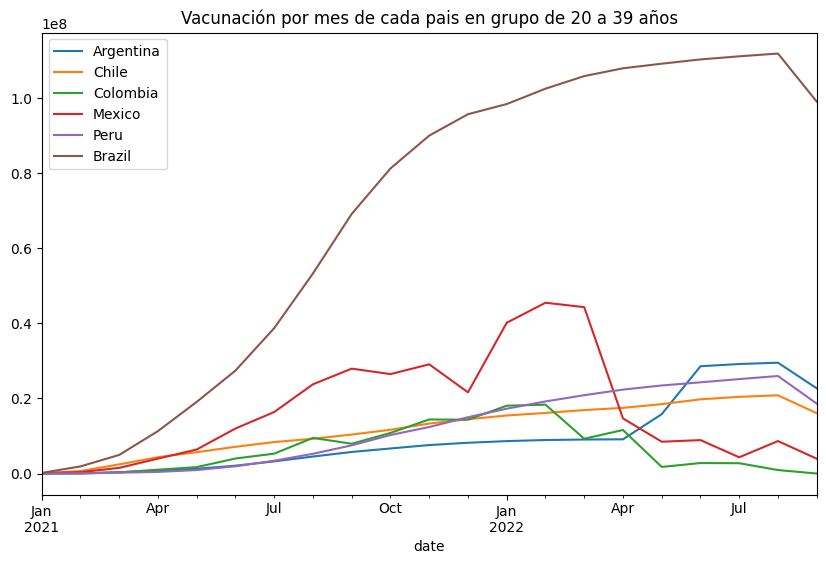

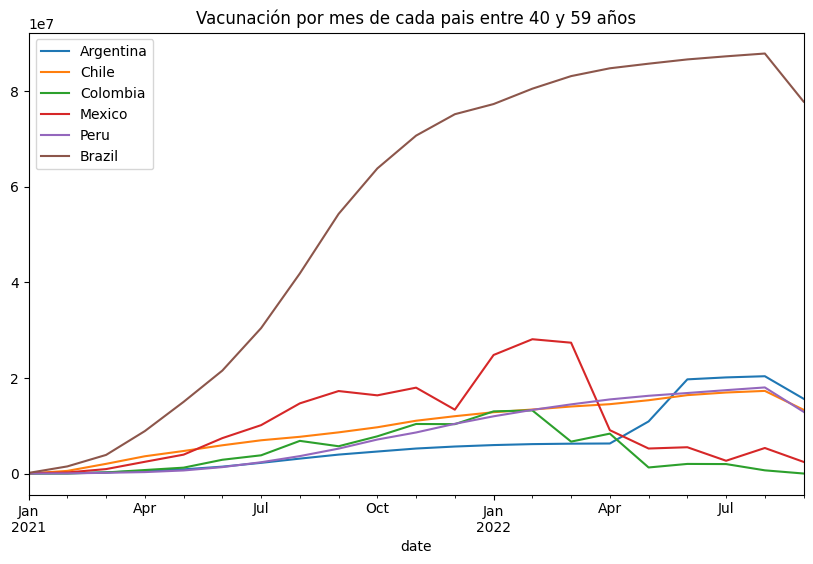

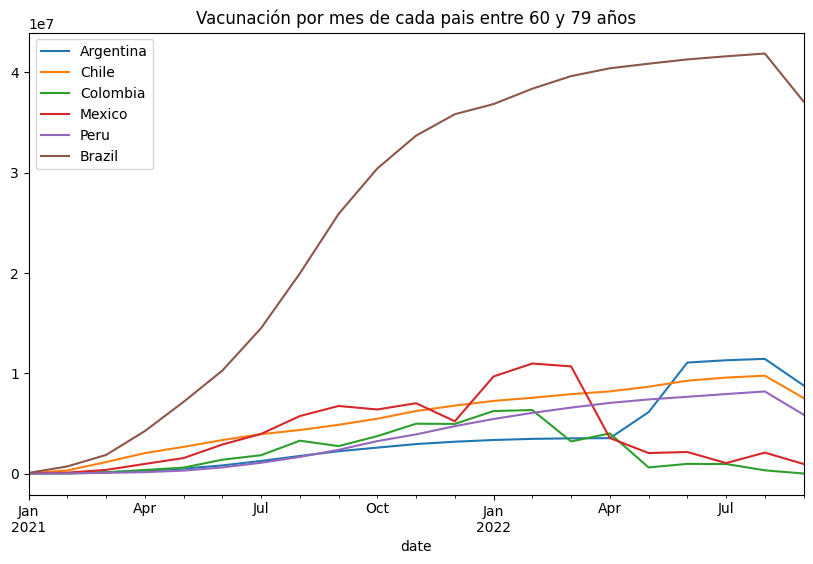

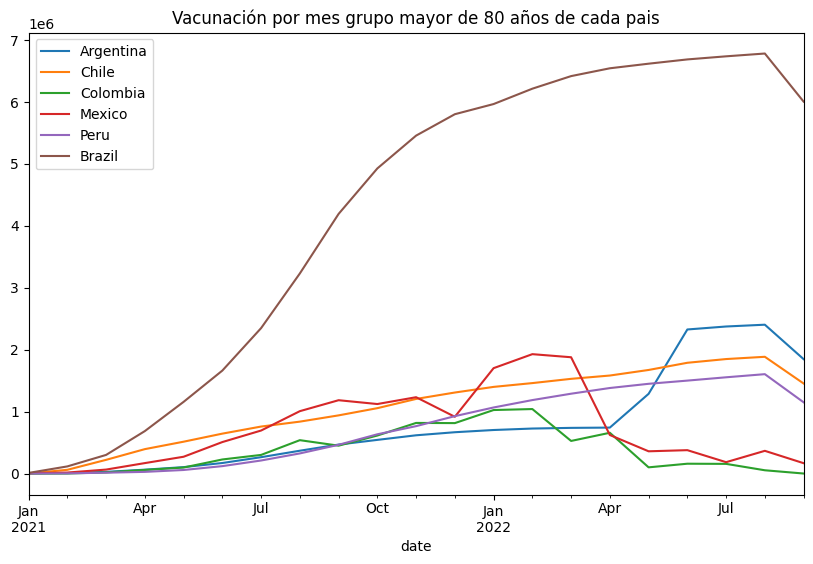

In [ ]:
# Grupo etareo mas vacunado
#Agrupar población por grupos etáreos más amplios (de 20 años)
data_latinoamerica_paises['population_age_00_19']=data_latinoamerica_paises['population_age_00_09']+data_latinoamerica_paises['population_age_10_19']
data_latinoamerica_paises['population_age_20_39']=data_latinoamerica_paises['population_age_20_29']+data_latinoamerica_paises['population_age_30_39']
data_latinoamerica_paises['population_age_40_59']=data_latinoamerica_paises['population_age_40_49']+data_latinoamerica_paises['population_age_50_59']
data_latinoamerica_paises['population_age_60_79']=data_latinoamerica_paises['population_age_60_69']+data_latinoamerica_paises['population_age_70_79']
data_latinoamerica_paises['population_age_80_and_older']=data_latinoamerica_paises['population_age_80_and_older']
#Cálculo del número estimado de personas vacunadas utilizando la proporción de la población total que pertenece a ese grupo: ¿cuántas dosis fueron administradas a personas de ese grupo etario?
data_latinoamerica_paises['population_age_00_19_vacunados']=data_latinoamerica_paises['cumulative_vaccine_doses_administered']*data_latinoamerica_paises['population_age_00_19']/data_latinoamerica_paises['population']
data_latinoamerica_paises['population_age_20_39_vacunados']=data_latinoamerica_paises['cumulative_vaccine_doses_administered']*data_latinoamerica_paises['population_age_20_39']/data_latinoamerica_paises['population']
data_latinoamerica_paises['population_age_40_59_vacunados']=data_latinoamerica_paises['cumulative_vaccine_doses_administered']*data_latinoamerica_paises['population_age_40_59']/data_latinoamerica_paises['population']
data_latinoamerica_paises['population_age_60_79_vacunados']=data_latinoamerica_paises['cumulative_vaccine_doses_administered']*data_latinoamerica_paises['population_age_60_79']/data_latinoamerica_paises['population']
data_latinoamerica_paises['population_age_80_and_older_vacunados']=data_latinoamerica_paises['cumulative_vaccine_doses_administered']*data_latinoamerica_paises['population_age_80_and_older']/data_latinoamerica_paises['population']
#Si hay valores NaN rellenarlos con 0
data_latinoamerica_paises['population_age_00_19_vacunados']=data_latinoamerica_paises['population_age_00_19_vacunados'].fillna(0)
data_latinoamerica_paises['population_age_20_39_vacunados']=data_latinoamerica_paises['population_age_20_39_vacunados'].fillna(0)
data_latinoamerica_paises['population_age_40_59_vacunados']=data_latinoamerica_paises['population_age_40_59_vacunados'].fillna(0)
data_latinoamerica_paises['population_age_60_79_vacunados']=data_latinoamerica_paises['population_age_60_79_vacunados'].fillna(0)
data_latinoamerica_paises['population_age_80_and_older_vacunados']=data_latinoamerica_paises['population_age_80_and_older_vacunados'].fillna(0)
#Conversión a int porque el número de personas son int
data_latinoamerica_paises['population_age_00_19_vacunados']=data_latinoamerica_paises['population_age_00_19_vacunados'].astype(int)
data_latinoamerica_paises['population_age_20_39_vacunados']=data_latinoamerica_paises['population_age_20_39_vacunados'].astype(int)
data_latinoamerica_paises['population_age_40_59_vacunados']=data_latinoamerica_paises['population_age_40_59_vacunados'].astype(int)
data_latinoamerica_paises['population_age_60_79_vacunados']=data_latinoamerica_paises['population_age_60_79_vacunados'].astype(int)
data_latinoamerica_paises['population_age_80_and_older_vacunados']=data_latinoamerica_paises['population_age_80_and_older_vacunados'].astype(int)
#Suma total de personas vacunadas por grupo de edad
data_latinoamerica_paises['population_age_00_19_vacunados'].sum()
data_latinoamerica_paises['population_age_20_39_vacunados'].sum()
data_latinoamerica_paises['population_age_40_59_vacunados'].sum()
data_latinoamerica_paises['population_age_60_79_vacunados'].sum()
data_latinoamerica_paises['population_age_80_and_older_vacunados'].sum()

# Grafica de valores medios de todos los paises cumulative_vaccine_doses_administered
fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['population_age_00_19_vacunados'].plot()
plt.title('Vacunación por mes de cada pais en grupo de 0 a 19 años')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['population_age_20_39_vacunados'].plot()
plt.title('Vacunación por mes de cada pais en grupo de 20 a 39 años')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['population_age_40_59_vacunados'].plot()
plt.title('Vacunación por mes de cada pais entre 40 y 59 años')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['population_age_60_79_vacunados'].plot()
plt.title('Vacunación por mes de cada pais entre 60 y 79 años')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['population_age_80_and_older_vacunados'].plot()
plt.title('Vacunación por mes grupo mayor de 80 años de cada pais')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()


##### *Gráficos parecido en distintos grupos etáreos solo se aplana en todos menos Brazil la parte final al aumentar la edad*

###### **Diagrama de barras apilado de comparación de la tasa de mortalidad masculina vs. femenina por país**

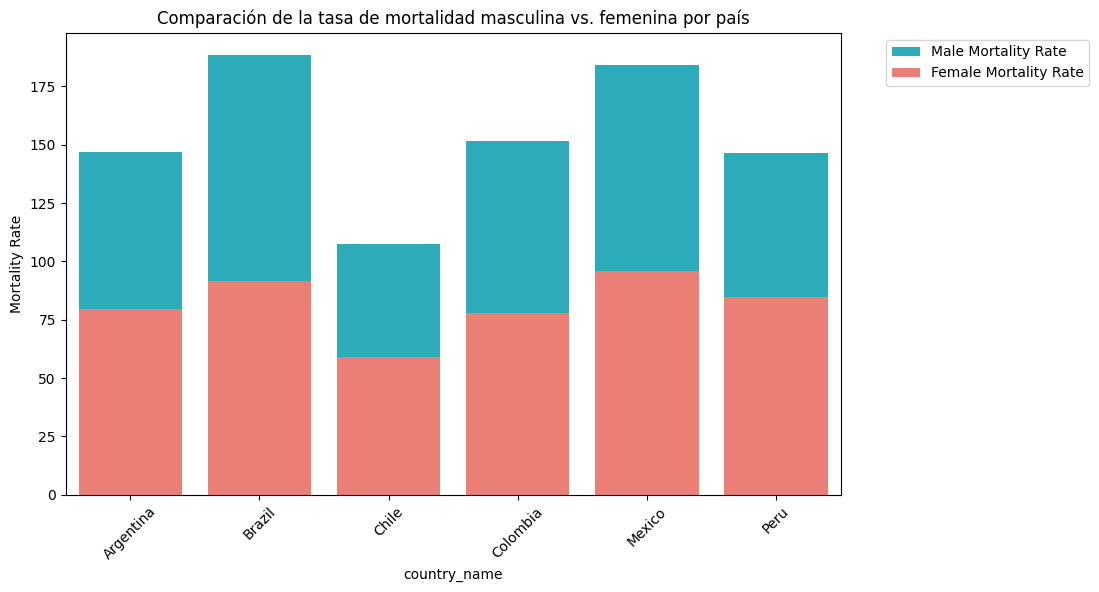

In [ ]:
# Grafica de mortalidad por genero. Tasa de Mortalidad entendida en Cantidad de muertes cada 1.000.000 de habitantes

plt.figure(figsize=(10, 6))
sns.barplot(data=data_latinoamerica_paises, x='country_name', y='adult_male_mortality_rate', color='#17BECF', label='Male Mortality Rate')
sns.barplot(data=data_latinoamerica_paises, x='country_name', y='adult_female_mortality_rate', color='#FF6F61', label='Female Mortality Rate')
plt.xticks(rotation=45)
plt.ylabel('Mortality Rate')
plt.title('Comparación de la tasa de mortalidad masculina vs. femenina por país')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

##### *La mortalidad masculina es mayor en todos los países, siendo los hombres más vulnerables o estando menos protegidos que las mujeres.*

###### **Matriz de correlación de indicadores demográficos y de salud**


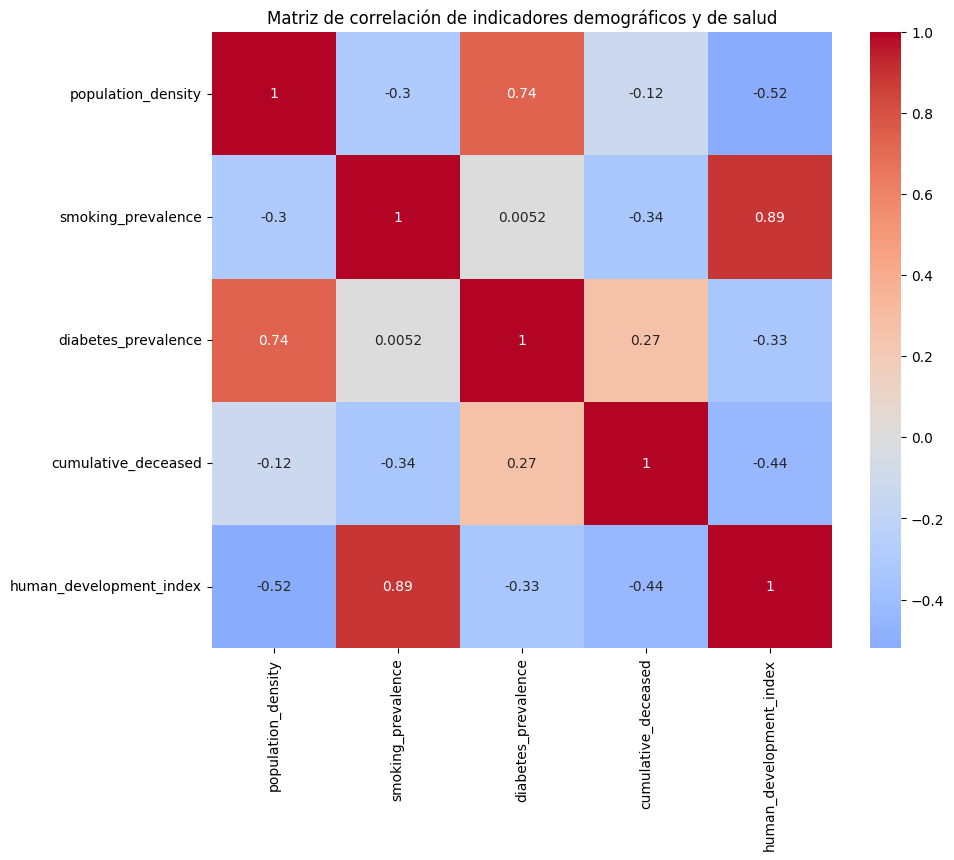

In [ ]:
# Selecciono las variables númericas que quiero correlacionar
columns = ['population_density', 'smoking_prevalence', 'diabetes_prevalence', 'cumulative_deceased', 'human_development_index']
correlation_matrix = data_latinoamerica_paises[columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de correlación de indicadores demográficos y de salud')
plt.show()

##### *El fumar y la diabetes son las enfermedades preexistentes que más afectan a la población en los paises seleccionados, por lo que estas enfermedades podrían haber causado más muertes, sin embargo esto no indica que sean las únicas sino que son las más comúnes.*

###### **Comparación de la Prevalencia de Diabetes y la Tasa de Mortalidad**

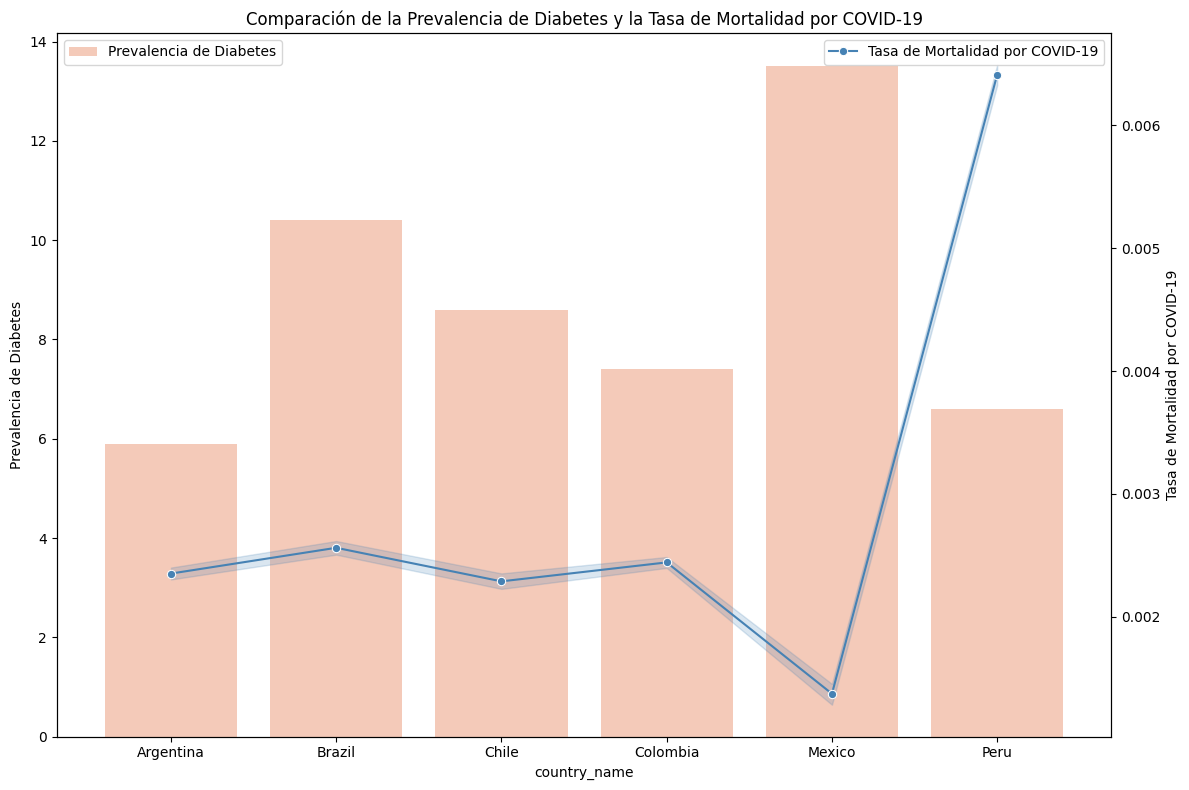

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

sns.barplot(data=data_latinoamerica_paises, 
            x= data_latinoamerica_paises['country_name'], 
            y= data_latinoamerica_paises['diabetes_prevalence'], 
            color='#FFA07A', 
            label='Prevalencia de Diabetes',
            ax=ax,
            alpha=0.6
)

ax2 = ax.twinx() #Crear un segundo eje Y con otra escala para comparar ambas métricas en el mismo gráfico

sns.lineplot(
            data=data_latinoamerica_paises, 
            x=data_latinoamerica_paises['country_name'], 
            y=data_latinoamerica_paises['cumulative_deceased'] / data_latinoamerica_paises['population'], 
            color='#4682B4', 
            label='Tasa de Mortalidad por COVID-19', 
            ax=ax2,
            marker='o' #Agregado de marcadores para facilitar lectura
)

plt.xticks(rotation=45)
ax.set_ylabel('Prevalencia de Diabetes')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
ax2.set_ylabel('Tasa de Mortalidad por COVID-19')
plt.title('Comparación de la Prevalencia de Diabetes y la Tasa de Mortalidad por COVID-19')
plt.tight_layout()
plt.show()

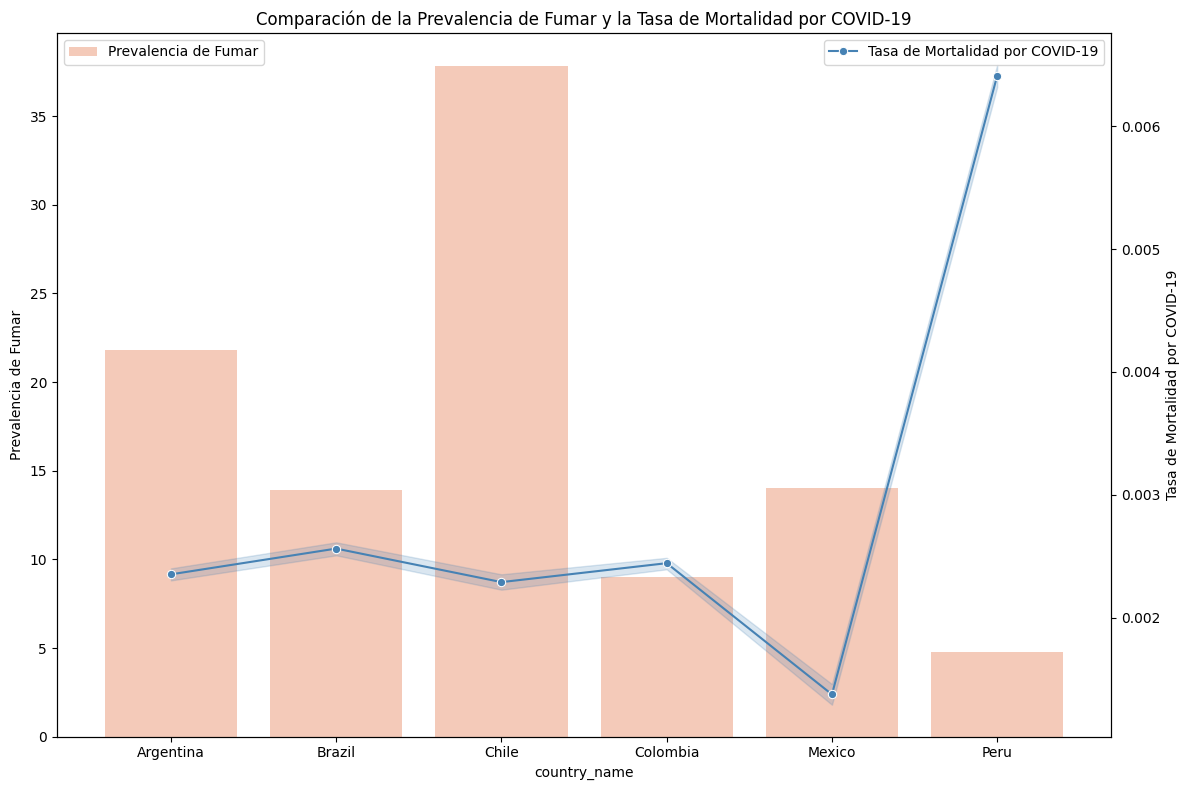

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

sns.barplot(data=data_latinoamerica_paises, 
            x= data_latinoamerica_paises['country_name'], 
            y= data_latinoamerica_paises['smoking_prevalence'], 
            color='#FFA07A', 
            label='Prevalencia de Fumar',
            ax=ax,
            alpha=0.6)

ax2 = ax.twinx()

sns.lineplot(data=data_latinoamerica_paises, 
            x= data_latinoamerica_paises['country_name'], 
            y= data_latinoamerica_paises['cumulative_deceased'] / data_latinoamerica_paises['population'], 
            color='#4682B4', 
            label='Tasa de Mortalidad por COVID-19', 
            ax=ax2,
             marker='o' #Agregado de marcadores para facilitar lectura
)

plt.xticks(rotation=45)
ax.set_ylabel('Prevalencia de Fumar')
ax2.set_ylabel('Tasa de Mortalidad por COVID-19')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.title('Comparación de la Prevalencia de Fumar y la Tasa de Mortalidad por COVID-19')
plt.tight_layout()
plt.show()

##### *Las dos enfermedades muestran un comportamiento similar, pero la diabetes es la enfermedad que más ha causado muertes en los paises seleccionados, seguido de fumar.*

###### 5.Identificación de Tendencias y Patrones: Deberás analizar detalladamente los datos relacionados con la incidencia de COVID-19 y las tasas de vacunación, buscando identificar tendencias a largo plazo y patrones estacionales o geográficos *(ej: posible influencia de factores como temperatura en la propagación de la enfermedad, ¿cómo varían los índices de vacunación en diferentes regiones o en distintos momentos del año?)* **Este análisis te permitirá prever áreas de alta prioridad para la asignación de recursos y la implementación de medidas preventivas y de control**

##### *Debajo de cada gráfico hice anotaciones que responden a esta consigna con los insights obtenidos relativos a tendencias en el tiempo, patrones estacionales o geográficos.*
##### *Los paises que más necesitan ayuda son Brasil, México y Colombia, ya que son los paises que más casos confirmados y muertes han tenido, y las enfermedades preexistentes que más han afectado a la población en los paises seleccionados son el fumar y la diabetes.*

###### 6.Personalización de Visualizaciones: Personaliza las visualizaciones para hacerlas más informativas y atractivas. Esto incluirá ajustar paletas de colores, añadir etiquetas y leyendas, tamaño, y utilizar títulos descriptivos para cada gráfico.

##### *Los gráficos han sido personalizados tal como se solcita*

## AVANCE 3

###### 1.Abre tu archivo “PIDA_M4_Eugenia_Minghetti.ipynb” y a continuación del avance 2 coloca el título: “Avance 3”.

###### 2.Importa las librerías que necesites utilizar en este avance.

In [216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [217]:
import warnings #Importar warnings, propio de Python para poder ignorar mensajes de cambios de funciones a futuro
warnings.filterwarnings("ignore")

###### 3.Realiza un análisis exploratorio detallado utilizando técnicas avanzadas de Pandas y Numpy, centrándote en el análisis de series temporales para comprender la evolución de elementos específicos del conjunto de datos. Para ello, puedes empezar por identificar tendencias, estacionalidad y patrones temporales relevantes, análisis de autocorrelación y descomposición de series temporales. 

In [218]:
data_latinoamerica_paises=pd.read_csv("export\DatosFinalesFiltrado.csv",sep=',') #Importamos el dataset limpio desde el Avance 1

In [ ]:
data_latinoamerica_paises.info() #Información básica de nuestro datastet 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3744 entries, 0 to 3743
Data columns (total 50 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   location_key                           3744 non-null   object 
 1   date                                   3744 non-null   object 
 2   country_code                           3744 non-null   object 
 3   country_name                           3744 non-null   object 
 4   new_confirmed                          3744 non-null   float64
 5   new_deceased                           3744 non-null   float64
 6   cumulative_confirmed                   3744 non-null   float64
 7   cumulative_deceased                    3744 non-null   float64
 8   cumulative_vaccine_doses_administered  3744 non-null   float64
 9   population                             3744 non-null   float64
 10  population_male                        3744 non-null   float64
 11  popu

In [ ]:
data_latinoamerica_paises.head() #Vemos cómo se organiza el dataset

location_key        date country_code country_name  new_confirmed  \
0           AR  2021-01-02           AR    Argentina         7767.0   
1           AR  2021-01-03           AR    Argentina         4934.0   
2           AR  2021-01-04           AR    Argentina        13953.0   
3           AR  2021-01-05           AR    Argentina        14085.0   
4           AR  2021-01-06           AR    Argentina        14496.0   

   new_deceased  cumulative_confirmed  cumulative_deceased  \
0         166.0             1670634.0              46688.0   
1         157.0             1675568.0              46845.0   
2         157.0             1689521.0              47002.0   
3         160.0             1703606.0              47162.0   
4         131.0             1718102.0              47293.0   

   cumulative_vaccine_doses_administered  population  ...  \
0                                20334.0  44938712.0  ...   
1                                20529.0  44938712.0  ...   
2                                25164.0  44938712.0  ...   
3                                29852.0  44938712.0  ...   
4                                34162.0  44938712.0  ...   

   population_largest_city  area_rural_sq_km  area_urban_sq_km  \
0               15057273.0         2690269.0           55032.0   
1               15057273.0         2690269.0           55032.0   
2               15057273.0         2690269.0           55032.0   
3               15057273.0         2690269.0           55032.0   
4               15057273.0         2690269.0           55032.0   

   life_expectancy  adult_male_mortality_rate  adult_female_mortality_rate  \
0            76.52                    147.086                       79.483   
1            76.52                    147.086                       79.483   
2            76.52                    147.086                       79.483   
3            76.52                    147.086                       79.483   
4            76.52                    147.086                       79.483   

   pollution_mortality_rate  comorbidity_mortality_rate  new_recovered  \
0                      26.6                        15.8            0.0   
1                      26.6                        15.8            0.0   
2                      26.6                        15.8            0.0   
3                      26.6                        15.8            0.0   
4                      26.6                        15.8            0.0   

   cumulative_recovered  
0                   0.0  
1                   0.0  
2                   0.0  
3                   0.0  
4                   0.0  

[5 rows x 50 columns]

In [219]:
data_latinoamerica_paises["date"] = pd.to_datetime(data_latinoamerica_paises["date"]) #Convertir la fecha (objeto) a formato datetime
data_latinoamerica_paises = data_latinoamerica_paises.set_index("date") #Establecerla como índice
data_latinoamerica_paises #Ver cómo quedó el dataset

location_key country_code country_name  new_confirmed  \
date                                                               
2021-01-02           AR           AR    Argentina        7767.00   
2021-01-03           AR           AR    Argentina        4934.00   
2021-01-04           AR           AR    Argentina       13953.00   
2021-01-05           AR           AR    Argentina       14085.00   
2021-01-06           AR           AR    Argentina       14496.00   
...                 ...          ...          ...            ...   
2022-09-13           PE           PE         Peru        1150.00   
2022-09-14           PE           PE         Peru       12911.39   
2022-09-15           PE           PE         Peru       12911.39   
2022-09-16           PE           PE         Peru       12911.39   
2022-09-17           PE           PE         Peru       12911.39   

            new_deceased  cumulative_confirmed  cumulative_deceased  \
date                                                                  
2021-01-02        166.00            1670634.00             46688.00   
2021-01-03        157.00            1675568.00             46845.00   
2021-01-04        157.00            1689521.00             47002.00   
2021-01-05        160.00            1703606.00             47162.00   
2021-01-06        131.00            1718102.00             47293.00   
...                  ...                   ...                  ...   
2022-09-13         22.00            4127612.00            216173.00   
2022-09-14        134.38            6079578.72            105716.12   
2022-09-15        134.38            6079578.72            105716.12   
2022-09-16        134.38            6079578.72            105716.12   
2022-09-17        134.38            6079578.72            105716.12   

            cumulative_vaccine_doses_administered  population  \
date                                                            
2021-01-02                               20334.00 44938712.00   
2021-01-03                               20529.00 44938712.00   
2021-01-04                               25164.00 44938712.00   
2021-01-05                               29852.00 44938712.00   
2021-01-06                               34162.00 44938712.00   
...                                           ...         ...   
2022-09-13                                   0.00 29381884.00   
2022-09-14                                   0.00 29381884.00   
2022-09-15                                   0.00 29381884.00   
2022-09-16                                   0.00 29381884.00   
2022-09-17                                   0.00 29381884.00   

            population_male  ...  population_largest_city  area_rural_sq_km  \
date                         ...                                              
2021-01-02      19523766.00  ...              15057273.00        2690269.00   
2021-01-03      19523766.00  ...              15057273.00        2690269.00   
2021-01-04      19523766.00  ...              15057273.00        2690269.00   
2021-01-05      19523766.00  ...              15057273.00        2690269.00   
2021-01-06      19523766.00  ...              15057273.00        2690269.00   
...                     ...  ...                      ...               ...   
2022-09-13      14450757.00  ...              10554712.00        1256339.00   
2022-09-14      14450757.00  ...              10554712.00        1256339.00   
2022-09-15      14450757.00  ...              10554712.00        1256339.00   
2022-09-16      14450757.00  ...              10554712.00        1256339.00   
2022-09-17      14450757.00  ...              10554712.00        1256339.00   

            area_urban_sq_km  life_expectancy  adult_male_mortality_rate  \
date                                                                       
2021-01-02          55032.00            76.52                     147.09   
2021-01-03          55032.00            76.52                     147.09   
2021-01-04          5503

In [ ]:
data_latinoamerica_paises['week'] = data_latinoamerica_paises.index.isocalendar().week #Agregar una columna que sea la semana siguiendo el calendario iso, de modo que considere todas las semanas del año seguidas, de la 1 a la 50 aprox
data_latinoamerica_paises

location_key country_code country_name  new_confirmed  \
date                                                               
2021-01-02           AR           AR    Argentina    7767.000000   
2021-01-03           AR           AR    Argentina    4934.000000   
2021-01-04           AR           AR    Argentina   13953.000000   
2021-01-05           AR           AR    Argentina   14085.000000   
2021-01-06           AR           AR    Argentina   14496.000000   
...                 ...          ...          ...            ...   
2022-09-13           PE           PE         Peru    1150.000000   
2022-09-14           PE           PE         Peru   12911.385484   
2022-09-15           PE           PE         Peru   12911.385484   
2022-09-16           PE           PE         Peru   12911.385484   
2022-09-17           PE           PE         Peru   12911.385484   

            new_deceased  cumulative_confirmed  cumulative_deceased  \
date                                                                  
2021-01-02    166.000000          1.670634e+06         46688.000000   
2021-01-03    157.000000          1.675568e+06         46845.000000   
2021-01-04    157.000000          1.689521e+06         47002.000000   
2021-01-05    160.000000          1.703606e+06         47162.000000   
2021-01-06    131.000000          1.718102e+06         47293.000000   
...                  ...                   ...                  ...   
2022-09-13     22.000000          4.127612e+06        216173.000000   
2022-09-14    134.379032          6.079579e+06        105716.119355   
2022-09-15    134.379032          6.079579e+06        105716.119355   
2022-09-16    134.379032          6.079579e+06        105716.119355   
2022-09-17    134.379032          6.079579e+06        105716.119355   

            cumulative_vaccine_doses_administered  population  \
date                                                            
2021-01-02                                20334.0  44938712.0   
2021-01-03                                20529.0  44938712.0   
2021-01-04                                25164.0  44938712.0   
2021-01-05                                29852.0  44938712.0   
2021-01-06                                34162.0  44938712.0   
...                                           ...         ...   
2022-09-13                                    0.0  29381884.0   
2022-09-14                                    0.0  29381884.0   
2022-09-15                                    0.0  29381884.0   
2022-09-16                                    0.0  29381884.0   
2022-09-17                                    0.0  29381884.0   

            population_male  ...  area_rural_sq_km  area_urban_sq_km  \
date                         ...                                       
2021-01-02       19523766.0  ...         2690269.0           55032.0   
2021-01-03       19523766.0  ...         2690269.0           55032.0   
2021-01-04       19523766.0  ...         2690269.0           55032.0   
2021-01-05       19523766.0  ...         2690269.0           55032.0   
2021-01-06       19523766.0  ...         2690269.0           55032.0   
...                     ...  ...               ...               ...   
2022-09-13       14450757.0  ...         1256339.0           16425.0   
2022-09-14       14450757.0  ...         1256339.0           16425.0   
2022-09-15       14450757.0  ...         1256339.0           16425.0   
2022-09-16       14450757.0  ...         1256339.0           16425.0   
2022-09-17       14450757.0  ...         1256339.0           16425.0   

            life_expectancy  adult_male_mortality_rate  \
date                                                     
2021-01-02           76.520                    147.086   
2021-01-03           76.520                    147.086   
2021-01-04           76.520                    147.086   
2021-01-05           76.520                    147.086   
2021-01-06           76.520                    147.086   
...          

In [ ]:
#Análisis del compotamiento semanal
#Separamos por año para que no se junten los datos de semanas con el mismo número pertenecientes a diferentes años
data_latinoamerica_paises_2021 = data_latinoamerica_paises.loc[
    (data_latinoamerica_paises.index >= '2021-01-01') & 
    (data_latinoamerica_paises.index <= '2021-12-31')
]
data_latinoamerica_paises_2021

location_key country_code country_name  new_confirmed  \
date                                                               
2021-01-02           AR           AR    Argentina         7767.0   
2021-01-03           AR           AR    Argentina         4934.0   
2021-01-04           AR           AR    Argentina        13953.0   
2021-01-05           AR           AR    Argentina        14085.0   
2021-01-06           AR           AR    Argentina        14496.0   
...                 ...          ...          ...            ...   
2021-12-27           PE           PE         Peru         3261.0   
2021-12-28           PE           PE         Peru         4270.0   
2021-12-29           PE           PE         Peru         4340.0   
2021-12-30           PE           PE         Peru         5220.0   
2021-12-31           PE           PE         Peru         4290.0   

            new_deceased  cumulative_confirmed  cumulative_deceased  \
date                                                                  
2021-01-02         166.0             1670634.0              46688.0   
2021-01-03         157.0             1675568.0              46845.0   
2021-01-04         157.0             1689521.0              47002.0   
2021-01-05         160.0             1703606.0              47162.0   
2021-01-06         131.0             1718102.0              47293.0   
...                  ...                   ...                  ...   
2021-12-27          29.0             2285854.0             202515.0   
2021-12-28          37.0             2290124.0             202552.0   
2021-12-29          40.0             2294464.0             202592.0   
2021-12-30          45.0             2299684.0             202637.0   
2021-12-31          37.0             2303974.0             202674.0   

            cumulative_vaccine_doses_administered  population  \
date                                                            
2021-01-02                                20334.0  44938712.0   
2021-01-03                                20529.0  44938712.0   
2021-01-04                                25164.0  44938712.0   
2021-01-05                                29852.0  44938712.0   
2021-01-06                                34162.0  44938712.0   
...                                           ...         ...   
2021-12-27                             50186253.0  29381884.0   
2021-12-28                             50515554.0  29381884.0   
2021-12-29                             50800766.0  29381884.0   
2021-12-30                             51020490.0  29381884.0   
2021-12-31                             51092425.0  29381884.0   

            population_male  ...  area_rural_sq_km  area_urban_sq_km  \
date                         ...                                       
2021-01-02       19523766.0  ...         2690269.0           55032.0   
2021-01-03       19523766.0  ...         2690269.0           55032.0   
2021-01-04       19523766.0  ...         2690269.0           55032.0   
2021-01-05       19523766.0  ...         2690269.0           55032.0   
2021-01-06       19523766.0  ...         2690269.0           55032.0   
...                     ...  ...               ...               ...   
2021-12-27       14450757.0  ...         1256339.0           16425.0   
2021-12-28       14450757.0  ...         1256339.0           16425.0   
2021-12-29       14450757.0  ...         1256339.0           16425.0   
2021-12-30       14450757.0  ...         1256339.0           16425.0   
2021-12-31       14450757.0  ...         1256339.0           16425.0   

            life_expectancy  adult_male_mortality_rate  \
date                                                     
2021-01-02           76.520                    147.086   
2021-01-03           76.520                    147.086   
2021-01-04           76.520                    147.086   
2021-01-05           76.520                    147.086   
2021-01-06           76.520                    147.086   
...          

In [15]:
weekly_cases_2021 = data_latinoamerica_paises_2021.groupby(['country_name', 'week'])[['new_confirmed','new_deceased']].sum().reset_index() 
#Agrupamos los datos por país y semana haciendo la suma de ambas columnas seleccionadas y reseteamos el índice
weekly_cases_2021

country_name  week  new_confirmed  new_deceased
0      Argentina     1        85321.0        1093.0
1      Argentina     2        76129.0        1191.0
2      Argentina     3        66250.0        1321.0
3      Argentina     4        58524.0        1199.0
4      Argentina     5        50576.0        1112.0
..           ...   ...            ...           ...
313         Peru    49        10004.0         272.0
314         Peru    50        10637.0         265.0
315         Peru    51        11306.0         257.0
316         Peru    52        21381.0         188.0
317         Peru    53         3355.0         374.0

[318 rows x 4 columns]

In [17]:
weekly_cases_2021['country_name'].unique() #Vemos qué países están sin considerar repeticiones de los mismos

array(['Argentina', 'Brazil', 'Chile', 'Colombia', 'Mexico', 'Peru'],
      dtype=object)

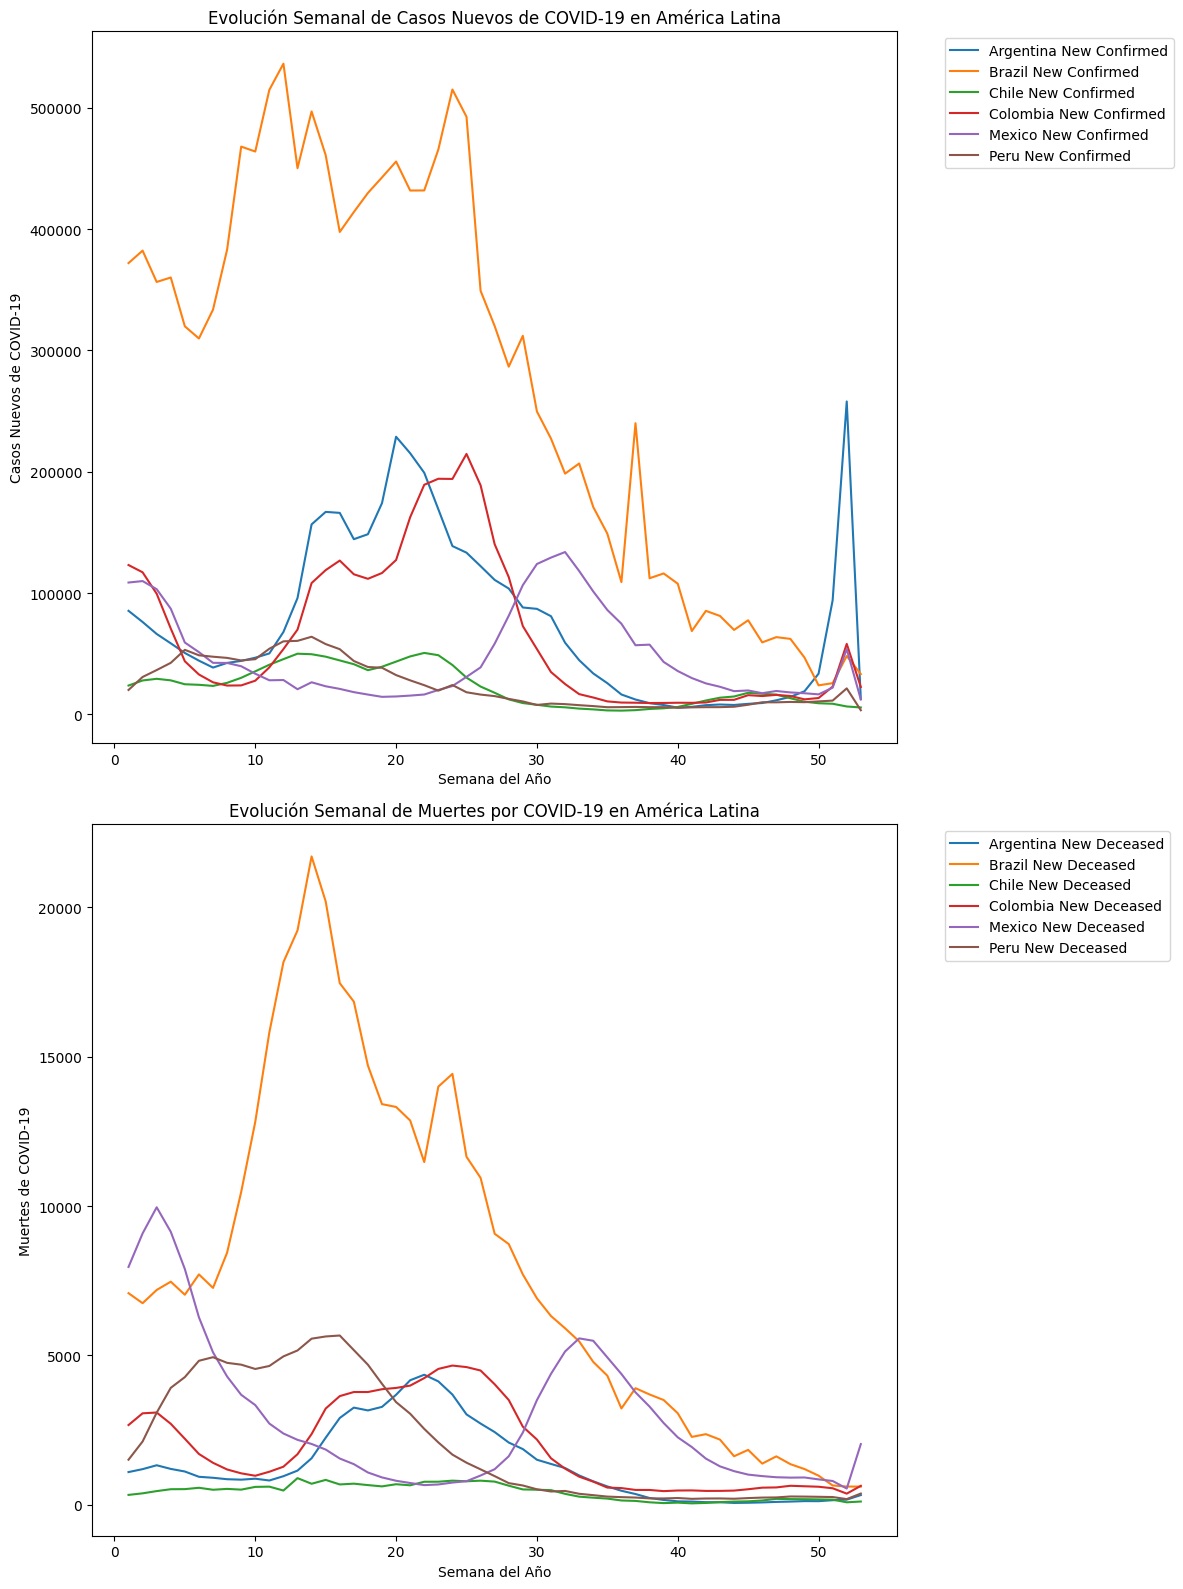

In [18]:
#Graficamos la evolución de los nuevos confirmados y los nuevos muertos por país semanalmente
weekly_cases_2021 = data_latinoamerica_paises_2021.groupby(['country_name', 'week'])[['new_confirmed','new_deceased']].sum().reset_index()

fig, axs = plt.subplots(ncols=1, nrows=2, figsize=(12, 16)) #Creamos una figura con dos ejes
for country in weekly_cases_2021['country_name'].unique():
    country_weekly_cases = weekly_cases_2021[weekly_cases_2021['country_name'] == country]
    axs[0].plot(country_weekly_cases['week'], country_weekly_cases['new_confirmed'], label=f'{country} New Confirmed')
    axs[1].plot(country_weekly_cases['week'], country_weekly_cases['new_deceased'], label=f'{country} New Deceased')

axs[0].set_xlabel("Semana del Año")
axs[0].set_ylabel("Casos Nuevos de COVID-19")
axs[0].set_title("Evolución Semanal de Casos Nuevos de COVID-19 en América Latina")
axs[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

axs[1].set_xlabel("Semana del Año")
axs[1].set_ylabel("Muertes de COVID-19")
axs[1].set_title("Evolución Semanal de Muertes por COVID-19 en América Latina")
axs[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

###### *Si bien se observa que a lo largo del tiempo los nuevos casos tienden a disminuir (con un pico al final para ciertos países) y las muertes disminuyen en el tiempo, la compararción solo puede hacerse para países con una población similar, para hacerlos comparables a todos habría que modificar el cálculo normalizando "new_confirmed" y "new_deceased" por "population"*

###### 4.Genera gráficas acordes a tu análisis. Las mismas pueden ser:

In [ ]:
data_latinoamerica_paises #Recordamos nuestro dataste con la fecha casteada y usada como índice

location_key country_code country_name  new_confirmed  \
date                                                               
2021-01-02           AR           AR    Argentina    7767.000000   
2021-01-03           AR           AR    Argentina    4934.000000   
2021-01-04           AR           AR    Argentina   13953.000000   
2021-01-05           AR           AR    Argentina   14085.000000   
2021-01-06           AR           AR    Argentina   14496.000000   
...                 ...          ...          ...            ...   
2022-09-13           PE           PE         Peru    1150.000000   
2022-09-14           PE           PE         Peru   12911.385484   
2022-09-15           PE           PE         Peru   12911.385484   
2022-09-16           PE           PE         Peru   12911.385484   
2022-09-17           PE           PE         Peru   12911.385484   

            new_deceased  cumulative_confirmed  cumulative_deceased  \
date                                                                  
2021-01-02    166.000000          1.670634e+06         46688.000000   
2021-01-03    157.000000          1.675568e+06         46845.000000   
2021-01-04    157.000000          1.689521e+06         47002.000000   
2021-01-05    160.000000          1.703606e+06         47162.000000   
2021-01-06    131.000000          1.718102e+06         47293.000000   
...                  ...                   ...                  ...   
2022-09-13     22.000000          4.127612e+06        216173.000000   
2022-09-14    134.379032          6.079579e+06        105716.119355   
2022-09-15    134.379032          6.079579e+06        105716.119355   
2022-09-16    134.379032          6.079579e+06        105716.119355   
2022-09-17    134.379032          6.079579e+06        105716.119355   

            cumulative_vaccine_doses_administered  population  \
date                                                            
2021-01-02                                20334.0  44938712.0   
2021-01-03                                20529.0  44938712.0   
2021-01-04                                25164.0  44938712.0   
2021-01-05                                29852.0  44938712.0   
2021-01-06                                34162.0  44938712.0   
...                                           ...         ...   
2022-09-13                                    0.0  29381884.0   
2022-09-14                                    0.0  29381884.0   
2022-09-15                                    0.0  29381884.0   
2022-09-16                                    0.0  29381884.0   
2022-09-17                                    0.0  29381884.0   

            population_male  ...  area_rural_sq_km  area_urban_sq_km  \
date                         ...                                       
2021-01-02       19523766.0  ...         2690269.0           55032.0   
2021-01-03       19523766.0  ...         2690269.0           55032.0   
2021-01-04       19523766.0  ...         2690269.0           55032.0   
2021-01-05       19523766.0  ...         2690269.0           55032.0   
2021-01-06       19523766.0  ...         2690269.0           55032.0   
...                     ...  ...               ...               ...   
2022-09-13       14450757.0  ...         1256339.0           16425.0   
2022-09-14       14450757.0  ...         1256339.0           16425.0   
2022-09-15       14450757.0  ...         1256339.0           16425.0   
2022-09-16       14450757.0  ...         1256339.0           16425.0   
2022-09-17       14450757.0  ...         1256339.0           16425.0   

            life_expectancy  adult_male_mortality_rate  \
date                                                     
2021-01-02           76.520                    147.086   
2021-01-03           76.520                    147.086   
2021-01-04           76.520                    147.086   
2021-01-05           76.520                    147.086   
2021-01-06           76.520                    147.086   
...          

###### **Evolución de Casos Activos vs. Recuperados**

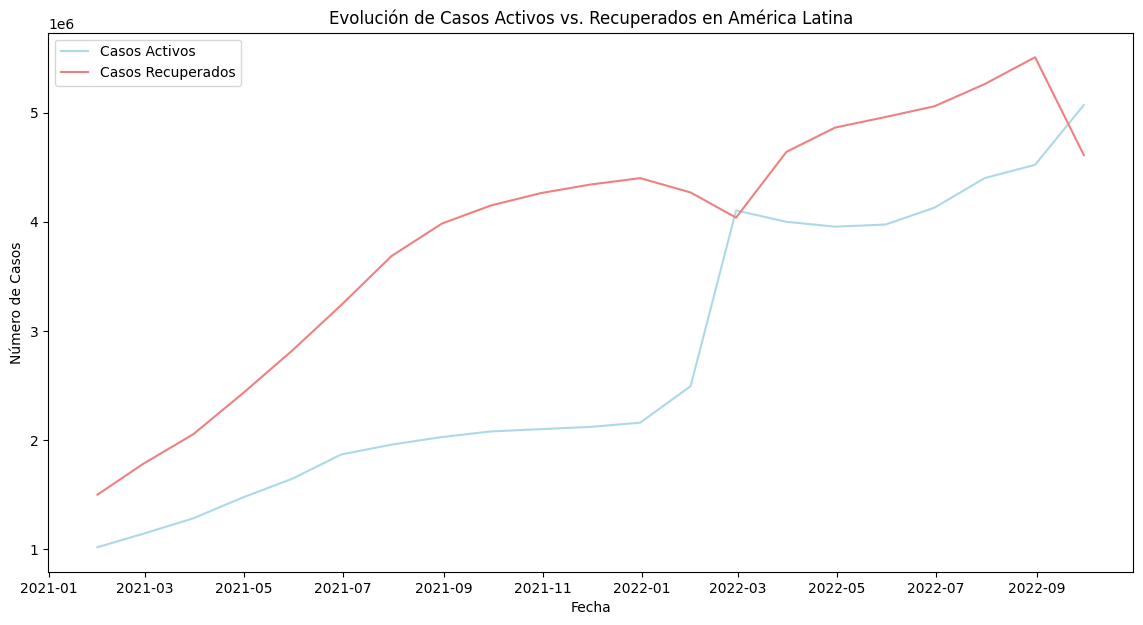

In [137]:
#Cálculo de los casos activos 
data_latinoamerica_paises['active_cases'] = data_latinoamerica_paises['cumulative_confirmed'] - data_latinoamerica_paises['cumulative_deceased'] - data_latinoamerica_paises['cumulative_recovered']

plt.figure(figsize=(14, 7))
sns.lineplot(data=data_latinoamerica_paises.resample('ME').mean(numeric_only=True), x='date', y='active_cases', color= "lightblue", label='Casos Activos')
sns.lineplot(data=data_latinoamerica_paises.resample('ME').mean(numeric_only=True), x='date', y='cumulative_recovered', color= "lightcoral", label='Casos Recuperados')
#Obtener la media de las dos variables de interés y agruparlas por finales de mes de modo que un punto represente cada mes

plt.xlabel('Fecha')
plt.ylabel('Número de Casos')
plt.title('Evolución de Casos Activos vs. Recuperados en América Latina')
plt.legend()
plt.show()

###### *Al aumentar los casos activos se reducen los recuperados y viceversa. Podemos observar el incremento de casos activos con la consecuente disminución de los recuperados a inicios de 2022, como se podrá ver en los siguientes análisis. Hacia fines de 2022 tenemos un decaimiento de los casos recuperados con el aumento de los casos activos*

###### **Tasa de Crecimiento (%)**

In [124]:
data_latinoamerica_paises['year_month'] = data_latinoamerica_paises.index.to_period('M')


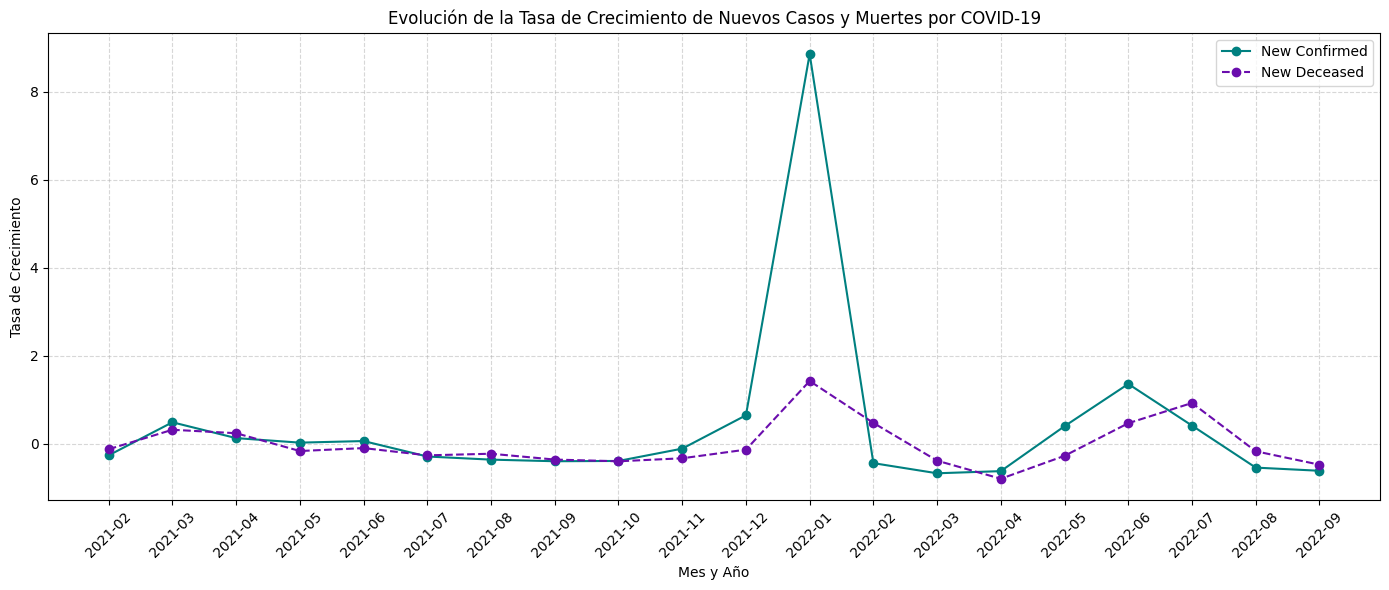

In [ ]:
monthly_cases = data_latinoamerica_paises.groupby('year_month')[['new_confirmed', 'new_deceased']].sum().reset_index() #Agrupar por período de tiempo solamente

# Calcular la tasa de crecimiento mensual
monthly_cases['new_confirmed_growth'] = monthly_cases['new_confirmed'].pct_change()
monthly_cases['new_deceased_growth'] = monthly_cases['new_deceased'].pct_change()
#.pct_change permite calcular la variación porcentual entre valores consecutivos en una serie de datos

plt.figure(figsize=(14, 6))

plt.plot(monthly_cases['year_month'].astype(str), monthly_cases['new_confirmed_growth'], marker='o', linestyle='-', color='teal', label='New Confirmed')
plt.plot(monthly_cases['year_month'].astype(str), monthly_cases['new_deceased_growth'], marker='o', linestyle='--', color='#6A0DAD', label='New Deceased')

plt.xticks(rotation=45)
plt.xlabel("Mes y Año")
plt.ylabel("Tasa de Crecimiento")
plt.title("Evolución de la Tasa de Crecimiento de Nuevos Casos y Muertes por COVID-19")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

###### *Podemos ver de forma general, sin distinguir por país, que los nuevos casos se mantuvieron constantes en el primer año dando un gran salto a fines de 2021 e inicio de 2022 para mostrar un segundo pico más leve a mediados de 2022.*
###### *En cambio el número de muertos presentó un pico más suave a fines de 2021 e inicio de 2022, con un pico posterior también menor luego del aumento de los nuevos casos.*

###### **Relación entre la Cobertura de Vacunación y la Reducción de Casos**

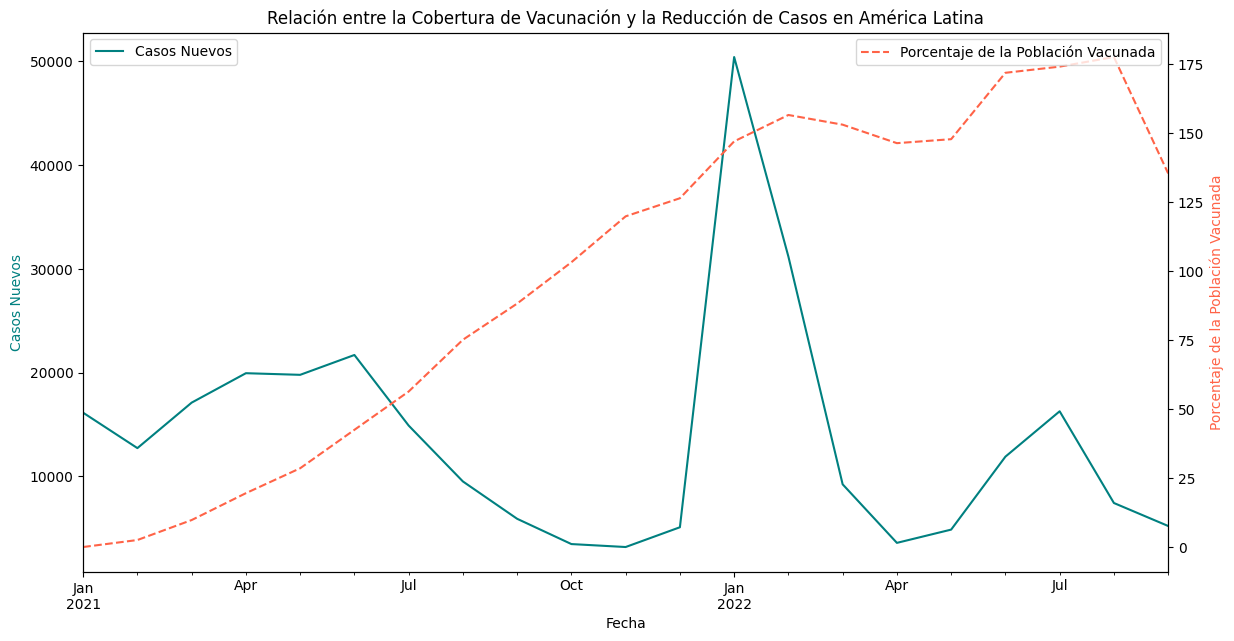

In [131]:
plt.figure(figsize=(14, 7))
ax1 = plt.gca() #Eje actual asignado a ax1
ax2 = ax1.twinx() #Crea segundo eje ax2 que comparte el mismo eje x que ax1, pero con otra escala y unidades pudiendo combinar ambas variables en el mismo gráfico

#crea percentajes de vacunacion
data_latinoamerica_paises['percentage_vaccinated'] = data_latinoamerica_paises['cumulative_vaccine_doses_administered'] / data_latinoamerica_paises['population'] * 100

#Obtener la media de las dos variables de interés y agruparlas por finales de mes de modo que un punto represente cada mes
data_latinoamerica_paises.resample('ME').mean(numeric_only=True)['new_confirmed'].plot(ax=ax1, color='teal', label='Casos Nuevos')
data_latinoamerica_paises.resample('ME').mean(numeric_only=True)['percentage_vaccinated'].plot(ax=ax2, color='#FF6347', linestyle='--', label='Porcentaje de la Población Vacunada')


ax1.set_xlabel('Fecha')
ax1.set_ylabel('Casos Nuevos', color='teal')
ax2.set_ylabel('Porcentaje de la Población Vacunada', color='#FF6347')
ax1.set_title('Relación entre la Cobertura de Vacunación y la Reducción de Casos en América Latina')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

###### *Observamos que al aumentar el porcentaje de población vacunada en general, los números de casos disminuyeron alcanzando valores inferiores a los mostrados al inicio de la pandemia.*

###### **('País') Progreso de la vacunación por país**

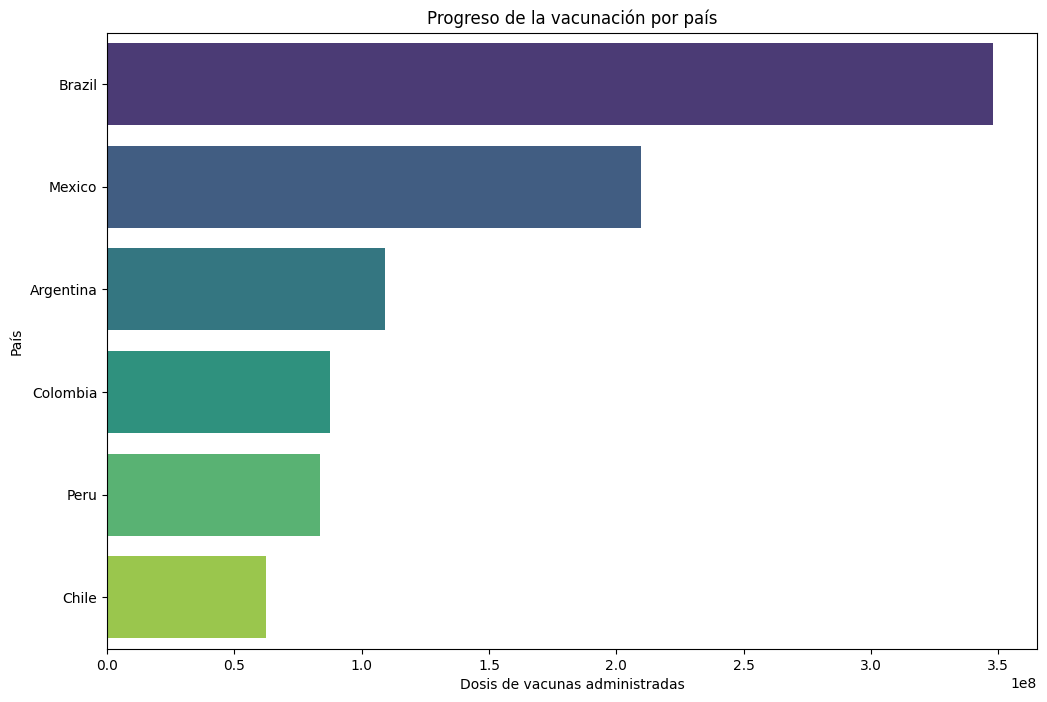

In [45]:
vaccination_data = data_latinoamerica_paises.groupby('country_name')['cumulative_vaccine_doses_administered'].max().sort_values(ascending=False)
#Agrupamos la información por país para poder hacer la comparación y de las dosis aplicadas de vacunas obtenemos el máximo y ordenamos descendentemente
plt.figure(figsize=(12, 8))
sns.barplot(x=vaccination_data.values, y=vaccination_data.index, hue=vaccination_data.index, palette='viridis')
plt.xlabel('Dosis de vacunas administradas')
plt.ylabel('País')
plt.title('Progreso de la vacunación por país')

plt.show()

###### *La gran cantidad de vacunas aplicadas por Brasil podría deberse a su población, sin mebargo, esta estrategia le permitió tener números bajos en comparación a los demás países respecto casos nuevos y muertes, presentando los números más altos de nuevos casos entre marzo y junio de 2021 y el pico de muertes en junio. La estrategia de México también dio resultados ya que presentó en número bajo de nuevos casos en 2021 en comparación a los demás países y del mismo modo un bajo número de muertes en agosto. La menor cantidad de dosis aplicadas por Argentina y Colombia los llevaron a tener picos muy elevados de nuevos casos entre mayo y julio de 2021, Argentina repitiendo el pico en diciembre de 2021 y a principios de 2022, y un gran número de muertes en junio de 2021 acercándose a Brasil cuya población en mucho mayor. Perú y Chile con aún menos dosis administradas presentaron un gran número de casos entre marzo y junio de 2021 al igual que en inicios de 2022, y con una gran cantidad de muertos superando (en el caso de Perú) y acércandose (en el caso de Chile) a los muertos de Brasil cuya población en mucho mayor; en 2022 fueron los países con gran cantidad de casos y Chile presentó el mayor número de muertes.*
###### **Sin duda Argentina, Chile y Perú podrían ser buenos lugares para establecer ubicaciones de la empresa**

###### **Nuevos casos y temperatura promedio**

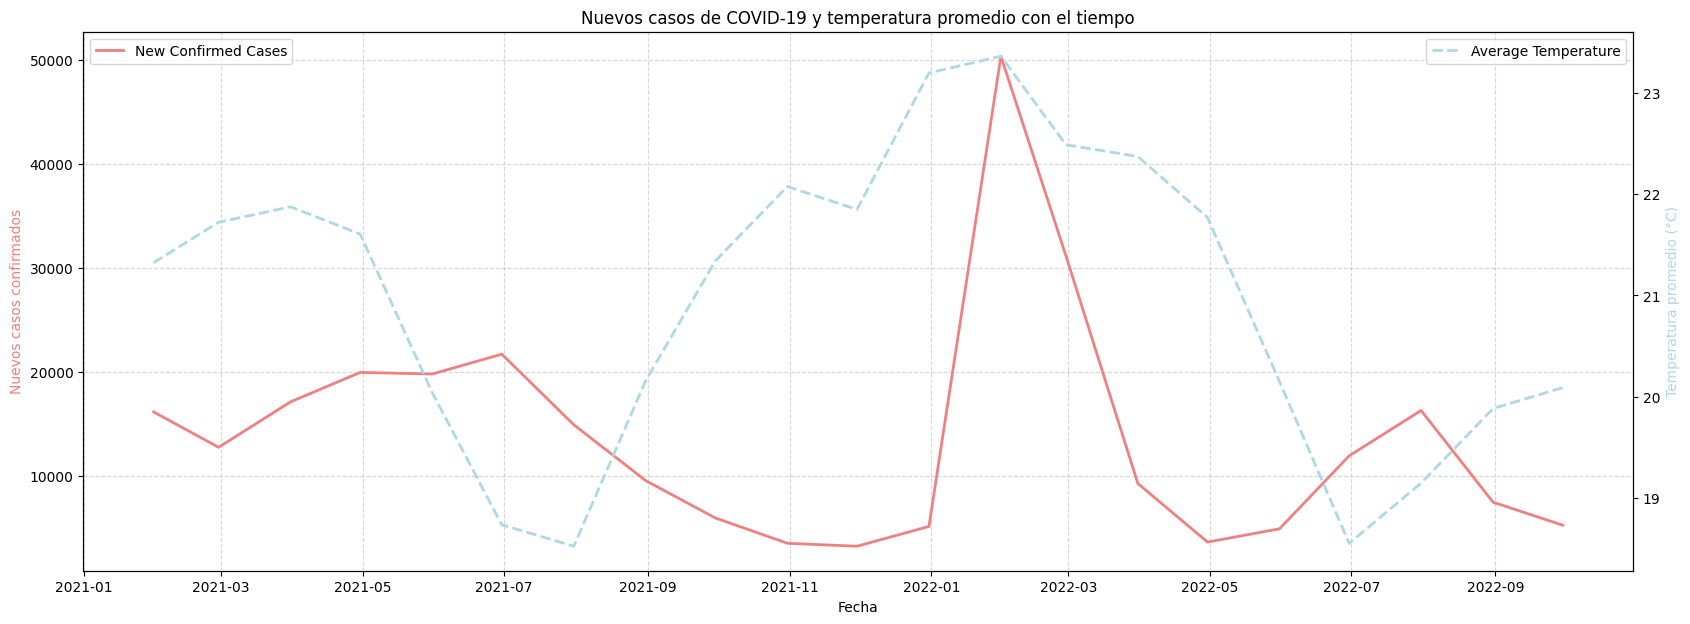

In [37]:
plt.figure(figsize=(20, 7))
ax1 = plt.gca() #Eje actual asignado a ax1
ax2 = ax1.twinx() #Crea segundo eje ax2 que comparte el mismo eje x que ax1, pero con otra escala y unidades pudiendo combinar ambas variables en el mismo gráfico
#Obtener la media de las dos variables de interés y agruparlas por finales de mes de modo que un punto represente cada mes
ax1.plot(data_latinoamerica_paises.resample('ME').mean(numeric_only=True).index, data_latinoamerica_paises.resample('ME').mean(numeric_only=True)['new_confirmed'], color='lightcoral', label='New Confirmed Cases', linewidth=2)
ax2.plot(data_latinoamerica_paises.resample('ME').mean(numeric_only=True).index, data_latinoamerica_paises.resample('ME').mean(numeric_only=True)['average_temperature_celsius'], color='lightblue', label='Average Temperature', linestyle='--', linewidth=2)

ax1.set_xlabel('Fecha')
ax1.set_ylabel('Nuevos casos confirmados', color='lightcoral')
ax2.set_ylabel('Temperatura promedio (°C)', color='lightblue')
plt.title('Nuevos casos de COVID-19 y temperatura promedio con el tiempo')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax1.grid(True, linestyle="--", alpha=0.5)
plt.show()

###### *Podemos obervar que la temperatura promedio ha fluactuado a lo largo del tiempo y que el promedio de casos ha disminuido progresivamente con un gran pico entre enero y marzo de 2022, que disminuyo rápidamente, coincidente con la temperatura promedio más alta. La cantidad de vacunados podría estar afectando los nuevos casos confirmados*
###### **Parecería que la temperatura promedio no afecta el número de nuevos casos**

###### **Impacto de la Urbanización en la Propagación del Covid-19**

In [38]:
pd.set_option('display.float_format', '{:.2f}'.format) #Indicamos que los float se muestren con dos decimales solamente

In [39]:
data_latinoamerica_paises[["population","population_urban","cumulative_confirmed"]] #Variables de interés para evaluar efecto de la urbanización

population  population_urban  cumulative_confirmed
date                                                          
2021-01-02 44938712.00       41339571.00            1670634.00
2021-01-03 44938712.00       41339571.00            1675568.00
2021-01-04 44938712.00       41339571.00            1689521.00
2021-01-05 44938712.00       41339571.00            1703606.00
2021-01-06 44938712.00       41339571.00            1718102.00
...                ...               ...                   ...
2022-09-13 29381884.00       25390339.00            4127612.00
2022-09-14 29381884.00       25390339.00            6079578.72
2022-09-15 29381884.00       25390339.00            6079578.72
2022-09-16 29381884.00       25390339.00            6079578.72
2022-09-17 29381884.00       25390339.00            6079578.72

[3744 rows x 3 columns]

In [40]:
#Cálculo de porcentaje de población urbana
data_latinoamerica_paises['urban_population_percentage'] = data_latinoamerica_paises['population_urban'] / data_latinoamerica_paises['population']
#Cálculo de porcentaje de confirmados
data_latinoamerica_paises['confirmed_population_percentage'] = data_latinoamerica_paises['cumulative_confirmed'] / data_latinoamerica_paises['population']
urban_cases = data_latinoamerica_paises.groupby('country_name').last().sort_values(by='urban_population_percentage')
urban_cases

location_key country_code  new_confirmed  new_deceased  \
country_name                                                          
Colombia               CO           CO       12911.39        134.38   
Brazil                 BR           BR       12911.39        134.38   
Peru                   PE           PE       12911.39        134.38   
Argentina              AR           AR       12911.39        134.38   
Mexico                 MX           MX       12911.39        134.38   
Chile                  CL           CL       12911.39        134.38   

              cumulative_confirmed  cumulative_deceased  \
country_name                                              
Colombia                6079578.72            105716.12   
Brazil                  6079578.72            105716.12   
Peru                    6079578.72            105716.12   
Argentina               6079578.72            105716.12   
Mexico                  6079578.72            105716.12   
Chile                   6079578.72            105716.12   

              cumulative_vaccine_doses_administered   population  \
country_name                                                       
Colombia                                       0.00  50882884.00   
Brazil                                         0.00 212559409.00   
Peru                                           0.00  29381884.00   
Argentina                                      0.00  44938712.00   
Mexico                                         0.00 110991953.00   
Chile                                          0.00  17574003.00   

              population_male  population_female  ...  life_expectancy  \
country_name                                      ...                    
Colombia          24984564.00        25898320.00  ...            77.11   
Brazil           104435783.00       108123626.00  ...            75.67   
Peru              14450757.00        14931127.00  ...            76.52   
Argentina         19523766.00        20593330.00  ...            76.52   
Mexico            54855231.00        57481307.00  ...            74.99   
Chile              8972014.00         8601989.00  ...            80.04   

              adult_male_mortality_rate  adult_female_mortality_rate  \
country_name                                                           
Colombia                         151.62                        78.00   
Brazil                           188.53                        91.42   
Peru                             146.37                        84.81   
Argentina                        147.09                        79.48   
Mexico                           184.38                        95.81   
Chile                            107.67                        59.03   

              pollution_mortality_rate  comorbidity_mortality_rate  \
country_name                                                         
Colombia                         37.00                       15.80   
Brazil                           29.90                       16.60   
Peru                             63.90                       12.60   
Argentina                        26.60                       15.80   
Mexico                           36.70                       15.70   
Chile                            25.30                       12.40   

              new_recovered  cumulative_recovered  week  \
country_name                                              
Colombia               0.00                  0.00    37   
Brazil                 0.00                  0.00    37   
Peru                   0.00                  0.00    37   
Argentina              0.00                  0.00    37   
Mexico                 0.00                  0.00    37   
Chile                  0.00                  0.00    37   

              urban_population_percentage  confirmed_population_percentage  
country_name                                                                
Colombia                             0.80                           

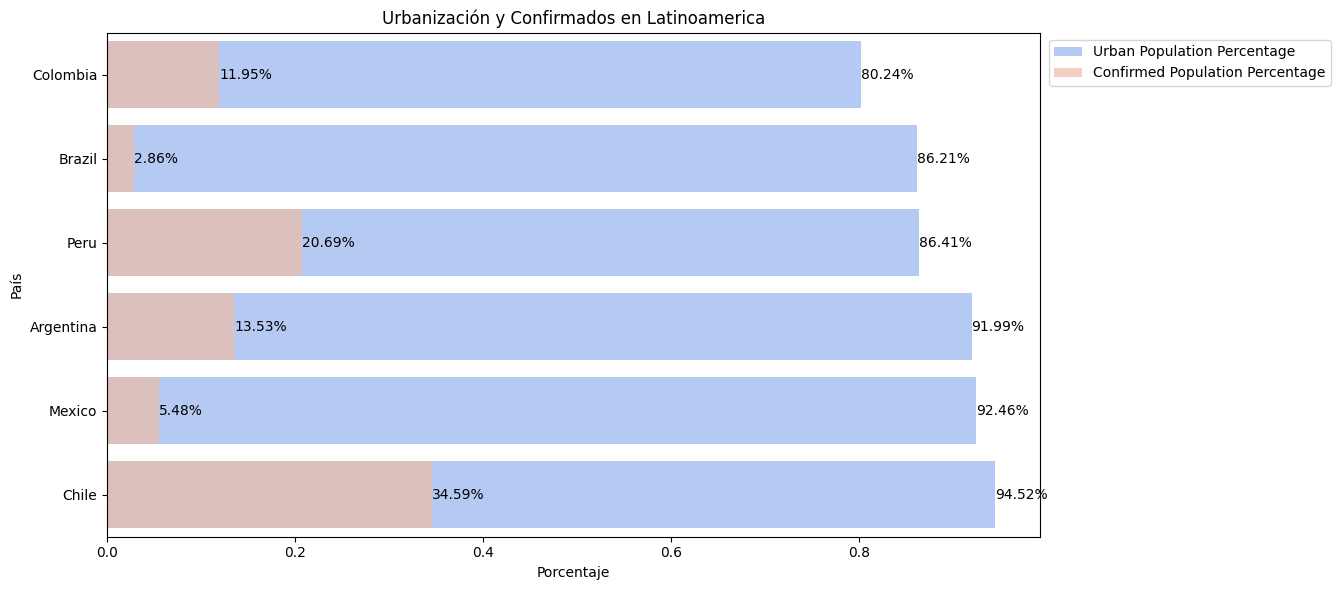

In [44]:
#Gráfico
plt.figure(figsize=(14, 6))
palette=sns.color_palette("coolwarm", 2)
ax = sns.barplot(x='urban_population_percentage', y=urban_cases.index, data=urban_cases, label='Urban Population Percentage', color=palette[0])

# Añadir etiquetas a cada barra con un ciclo for
for index, value in enumerate(urban_cases['urban_population_percentage']):
    ax.text(value, index, f'{value*100:.2f}%', color='black', ha="left", va="center")

# Superponer la segunda barra para confirmed_population_percentage
ax2 = sns.barplot(x='confirmed_population_percentage', y=urban_cases.index, data=urban_cases, alpha=0.7, label='Confirmed Population Percentage', color=palette[1])

# Añadir etiquetas a cada barra 
for index, value in enumerate(urban_cases['confirmed_population_percentage']):
    ax2.text(value, index, f'{value*100:.2f}%', color='black', ha="left", va="center")

plt.xlabel('Porcentaje')
plt.ylabel('País')
plt.title('Urbanización y Confirmados en Latinoamerica')
plt.legend(bbox_to_anchor=(1.32, 1), loc="upper right")
plt.tight_layout()
plt.show()

###### *Los países con más impacto en la propagación fueron Chile, Perú y Argentina, esto es coincidente con los resultados obtenidos relativos a dosis acumuladas de vacunas, y al número de nuevos casos y de muertes*

###### **Evolución Semanal de Casos Nuevos**

In [ ]:
#Análisis del compotamiento semanal
#Separamos por año para que no se junten los datos de semanas con el mismo número pertenecientes a diferentes años
data_latinoamerica_paises_2021 = data_latinoamerica_paises.loc[
    (data_latinoamerica_paises.index >= '2021-01-01') & 
    (data_latinoamerica_paises.index <= '2021-12-31')
]
data_latinoamerica_paises_2021

location_key country_code country_name  new_confirmed  \
date                                                               
2021-01-02           AR           AR    Argentina        7767.00   
2021-01-03           AR           AR    Argentina        4934.00   
2021-01-04           AR           AR    Argentina       13953.00   
2021-01-05           AR           AR    Argentina       14085.00   
2021-01-06           AR           AR    Argentina       14496.00   
...                 ...          ...          ...            ...   
2021-12-27           PE           PE         Peru        3261.00   
2021-12-28           PE           PE         Peru        4270.00   
2021-12-29           PE           PE         Peru        4340.00   
2021-12-30           PE           PE         Peru        5220.00   
2021-12-31           PE           PE         Peru        4290.00   

            new_deceased  cumulative_confirmed  cumulative_deceased  \
date                                                                  
2021-01-02        166.00            1670634.00             46688.00   
2021-01-03        157.00            1675568.00             46845.00   
2021-01-04        157.00            1689521.00             47002.00   
2021-01-05        160.00            1703606.00             47162.00   
2021-01-06        131.00            1718102.00             47293.00   
...                  ...                   ...                  ...   
2021-12-27         29.00            2285854.00            202515.00   
2021-12-28         37.00            2290124.00            202552.00   
2021-12-29         40.00            2294464.00            202592.00   
2021-12-30         45.00            2299684.00            202637.00   
2021-12-31         37.00            2303974.00            202674.00   

            cumulative_vaccine_doses_administered  population  \
date                                                            
2021-01-02                               20334.00 44938712.00   
2021-01-03                               20529.00 44938712.00   
2021-01-04                               25164.00 44938712.00   
2021-01-05                               29852.00 44938712.00   
2021-01-06                               34162.00 44938712.00   
...                                           ...         ...   
2021-12-27                            50186253.00 29381884.00   
2021-12-28                            50515554.00 29381884.00   
2021-12-29                            50800766.00 29381884.00   
2021-12-30                            51020490.00 29381884.00   
2021-12-31                            51092425.00 29381884.00   

            population_male  ...  life_expectancy  adult_male_mortality_rate  \
date                         ...                                               
2021-01-02      19523766.00  ...            76.52                     147.09   
2021-01-03      19523766.00  ...            76.52                     147.09   
2021-01-04      19523766.00  ...            76.52                     147.09   
2021-01-05      19523766.00  ...            76.52                     147.09   
2021-01-06      19523766.00  ...            76.52                     147.09   
...                     ...  ...              ...                        ...   
2021-12-27      14450757.00  ...            76.52                     146.37   
2021-12-28      14450757.00  ...            76.52                     146.37   
2021-12-29      14450757.00  ...            76.52                     146.37   
2021-12-30      14450757.00  ...            76.52                     146.37   
2021-12-31      14450757.00  ...            76.52                     146.37   

            adult_female_mortality_rate  pollution_mortality_rate  \
date                                                                
2021-01-02                        79.48                     26.60   
2021-01-03                        79.48                     26.60   
2021-01-04                        79.48

In [52]:
data_latinoamerica_paises_2021["new_confirmed_norm"] = data_latinoamerica_paises_2021["new_confirmed"] / data_latinoamerica_paises_2021["population"]
data_latinoamerica_paises_2021["new_deceased_norm"] = data_latinoamerica_paises_2021["new_deceased"] / data_latinoamerica_paises_2021["population"]
data_latinoamerica_paises_2021

location_key country_code country_name  new_confirmed  \
date                                                               
2021-01-02           AR           AR    Argentina        7767.00   
2021-01-03           AR           AR    Argentina        4934.00   
2021-01-04           AR           AR    Argentina       13953.00   
2021-01-05           AR           AR    Argentina       14085.00   
2021-01-06           AR           AR    Argentina       14496.00   
...                 ...          ...          ...            ...   
2021-12-27           PE           PE         Peru        3261.00   
2021-12-28           PE           PE         Peru        4270.00   
2021-12-29           PE           PE         Peru        4340.00   
2021-12-30           PE           PE         Peru        5220.00   
2021-12-31           PE           PE         Peru        4290.00   

            new_deceased  cumulative_confirmed  cumulative_deceased  \
date                                                                  
2021-01-02        166.00            1670634.00             46688.00   
2021-01-03        157.00            1675568.00             46845.00   
2021-01-04        157.00            1689521.00             47002.00   
2021-01-05        160.00            1703606.00             47162.00   
2021-01-06        131.00            1718102.00             47293.00   
...                  ...                   ...                  ...   
2021-12-27         29.00            2285854.00            202515.00   
2021-12-28         37.00            2290124.00            202552.00   
2021-12-29         40.00            2294464.00            202592.00   
2021-12-30         45.00            2299684.00            202637.00   
2021-12-31         37.00            2303974.00            202674.00   

            cumulative_vaccine_doses_administered  population  \
date                                                            
2021-01-02                               20334.00 44938712.00   
2021-01-03                               20529.00 44938712.00   
2021-01-04                               25164.00 44938712.00   
2021-01-05                               29852.00 44938712.00   
2021-01-06                               34162.00 44938712.00   
...                                           ...         ...   
2021-12-27                            50186253.00 29381884.00   
2021-12-28                            50515554.00 29381884.00   
2021-12-29                            50800766.00 29381884.00   
2021-12-30                            51020490.00 29381884.00   
2021-12-31                            51092425.00 29381884.00   

            population_male  ...  adult_female_mortality_rate  \
date                         ...                                
2021-01-02      19523766.00  ...                        79.48   
2021-01-03      19523766.00  ...                        79.48   
2021-01-04      19523766.00  ...                        79.48   
2021-01-05      19523766.00  ...                        79.48   
2021-01-06      19523766.00  ...                        79.48   
...                     ...  ...                          ...   
2021-12-27      14450757.00  ...                        84.81   
2021-12-28      14450757.00  ...                        84.81   
2021-12-29      14450757.00  ...                        84.81   
2021-12-30      14450757.00  ...                        84.81   
2021-12-31      14450757.00  ...                        84.81   

            pollution_mortality_rate  comorbidity_mortality_rate  \
date                                                               
2021-01-02                     26.60                       15.80   
2021-01-03                     26.60                       15.80   
2021-01-04                     26.60                       15.80   
2021-01-05                     26.60                       15.80   
2021-01-06                     26.60                       15.80   
...                              .

In [53]:
weekly_cases_2021_norm = data_latinoamerica_paises_2021.groupby(['country_name', 'week'])[['new_confirmed_norm','new_deceased_norm']].sum().reset_index() 
#Agrupamos los datos por país y semana haciendo la suma de ambas columnas seleccionadas y reseteamos el índice
weekly_cases_2021_norm

country_name  week  new_confirmed_norm  new_deceased_norm
0      Argentina     1                0.00               0.00
1      Argentina     2                0.00               0.00
2      Argentina     3                0.00               0.00
3      Argentina     4                0.00               0.00
4      Argentina     5                0.00               0.00
..           ...   ...                 ...                ...
313         Peru    49                0.00               0.00
314         Peru    50                0.00               0.00
315         Peru    51                0.00               0.00
316         Peru    52                0.00               0.00
317         Peru    53                0.00               0.00

[318 rows x 4 columns]

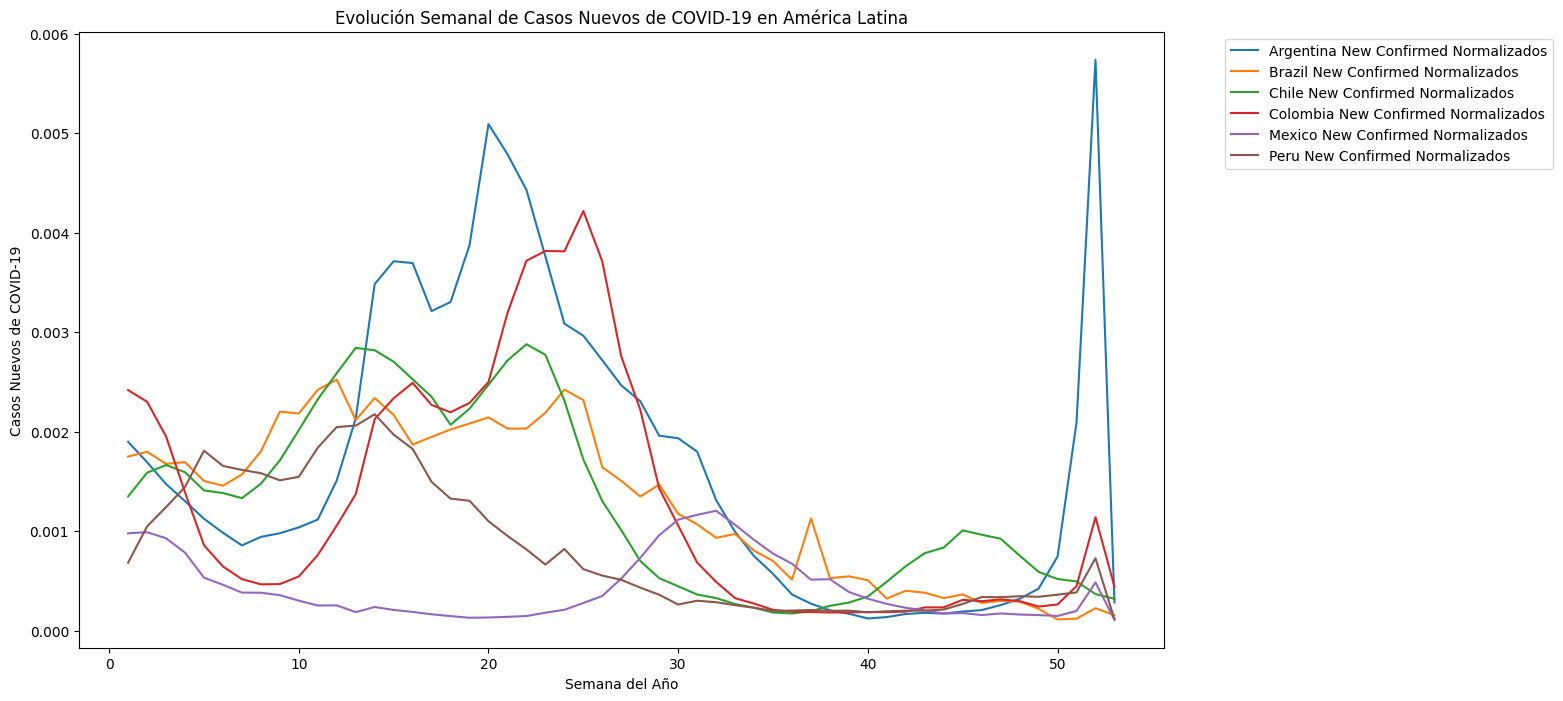

In [60]:
weekly_cases_2021_norm = data_latinoamerica_paises_2021.groupby(['country_name', 'week'])[['new_confirmed_norm','new_deceased_norm']].sum().reset_index()

fig, ax = plt.subplots(figsize=(14, 8)) 
for country in weekly_cases_2021_norm['country_name'].unique():
    country_weekly_cases = weekly_cases_2021_norm[weekly_cases_2021_norm['country_name'] == country]
    ax.plot(country_weekly_cases['week'], country_weekly_cases['new_confirmed_norm'], label=f'{country} New Confirmed Normalizados')

ax.set_xlabel("Semana del Año")
ax.set_ylabel("Casos Nuevos de COVID-19")
ax.set_title("Evolución Semanal de Casos Nuevos de COVID-19 en América Latina")
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

In [61]:
#Análisis del compotamiento semanal, pero del año 2022
#Repetimos lo mismo que para 2021 pero con 2022
data_latinoamerica_paises_2022 = data_latinoamerica_paises.loc[
    (data_latinoamerica_paises.index >= '2022-01-01') & 
    (data_latinoamerica_paises.index <= '2022-12-31')
]
data_latinoamerica_paises_2022

location_key country_code country_name  new_confirmed  \
date                                                               
2022-01-01           AR           AR    Argentina       20922.00   
2022-01-02           AR           AR    Argentina       38624.00   
2022-01-03           AR           AR    Argentina      107298.00   
2022-01-04           AR           AR    Argentina      129265.00   
2022-01-05           AR           AR    Argentina      148352.00   
...                 ...          ...          ...            ...   
2022-09-13           PE           PE         Peru        1150.00   
2022-09-14           PE           PE         Peru       12911.39   
2022-09-15           PE           PE         Peru       12911.39   
2022-09-16           PE           PE         Peru       12911.39   
2022-09-17           PE           PE         Peru       12911.39   

            new_deceased  cumulative_confirmed  cumulative_deceased  \
date                                                                  
2022-01-01         34.00            5788333.00            117656.00   
2022-01-02         44.00            5826957.00            117700.00   
2022-01-03         57.00            5934255.00            117757.00   
2022-01-04         52.00            6063520.00            117809.00   
2022-01-05         66.00            6211872.00            117875.00   
...                  ...                   ...                  ...   
2022-09-13         22.00            4127612.00            216173.00   
2022-09-14        134.38            6079578.72            105716.12   
2022-09-15        134.38            6079578.72            105716.12   
2022-09-16        134.38            6079578.72            105716.12   
2022-09-17        134.38            6079578.72            105716.12   

            cumulative_vaccine_doses_administered  population  \
date                                                            
2022-01-01                            30933414.00 44938712.00   
2022-01-02                            30948506.00 44938712.00   
2022-01-03                            31021798.00 44938712.00   
2022-01-04                            31103724.00 44938712.00   
2022-01-05                            31191005.00 44938712.00   
...                                           ...         ...   
2022-09-13                                   0.00 29381884.00   
2022-09-14                                   0.00 29381884.00   
2022-09-15                                   0.00 29381884.00   
2022-09-16                                   0.00 29381884.00   
2022-09-17                                   0.00 29381884.00   

            population_male  ...  life_expectancy  adult_male_mortality_rate  \
date                         ...                                               
2022-01-01      19523766.00  ...            76.52                     147.09   
2022-01-02      19523766.00  ...            76.52                     147.09   
2022-01-03      19523766.00  ...            76.52                     147.09   
2022-01-04      19523766.00  ...            76.52                     147.09   
2022-01-05      19523766.00  ...            76.52                     147.09   
...                     ...  ...              ...                        ...   
2022-09-13      14450757.00  ...            76.52                     146.37   
2022-09-14      14450757.00  ...            76.52                     146.37   
2022-09-15      14450757.00  ...            76.52                     146.37   
2022-09-16      14450757.00  ...            76.52                     146.37   
2022-09-17      14450757.00  ...            76.52                     146.37   

            adult_female_mortality_rate  pollution_mortality_rate  \
date                                                                
2022-01-01                        79.48                     26.60   
2022-01-02                        79.48                     26.60   
2022-01-03                        79.48

In [62]:
data_latinoamerica_paises_2022["new_confirmed_norm"] = data_latinoamerica_paises_2022["new_confirmed"] / data_latinoamerica_paises_2022["population"]
data_latinoamerica_paises_2022["new_deceased_norm"] = data_latinoamerica_paises_2022["new_deceased"] / data_latinoamerica_paises_2022["population"]
data_latinoamerica_paises_2022

location_key country_code country_name  new_confirmed  \
date                                                               
2022-01-01           AR           AR    Argentina       20922.00   
2022-01-02           AR           AR    Argentina       38624.00   
2022-01-03           AR           AR    Argentina      107298.00   
2022-01-04           AR           AR    Argentina      129265.00   
2022-01-05           AR           AR    Argentina      148352.00   
...                 ...          ...          ...            ...   
2022-09-13           PE           PE         Peru        1150.00   
2022-09-14           PE           PE         Peru       12911.39   
2022-09-15           PE           PE         Peru       12911.39   
2022-09-16           PE           PE         Peru       12911.39   
2022-09-17           PE           PE         Peru       12911.39   

            new_deceased  cumulative_confirmed  cumulative_deceased  \
date                                                                  
2022-01-01         34.00            5788333.00            117656.00   
2022-01-02         44.00            5826957.00            117700.00   
2022-01-03         57.00            5934255.00            117757.00   
2022-01-04         52.00            6063520.00            117809.00   
2022-01-05         66.00            6211872.00            117875.00   
...                  ...                   ...                  ...   
2022-09-13         22.00            4127612.00            216173.00   
2022-09-14        134.38            6079578.72            105716.12   
2022-09-15        134.38            6079578.72            105716.12   
2022-09-16        134.38            6079578.72            105716.12   
2022-09-17        134.38            6079578.72            105716.12   

            cumulative_vaccine_doses_administered  population  \
date                                                            
2022-01-01                            30933414.00 44938712.00   
2022-01-02                            30948506.00 44938712.00   
2022-01-03                            31021798.00 44938712.00   
2022-01-04                            31103724.00 44938712.00   
2022-01-05                            31191005.00 44938712.00   
...                                           ...         ...   
2022-09-13                                   0.00 29381884.00   
2022-09-14                                   0.00 29381884.00   
2022-09-15                                   0.00 29381884.00   
2022-09-16                                   0.00 29381884.00   
2022-09-17                                   0.00 29381884.00   

            population_male  ...  adult_female_mortality_rate  \
date                         ...                                
2022-01-01      19523766.00  ...                        79.48   
2022-01-02      19523766.00  ...                        79.48   
2022-01-03      19523766.00  ...                        79.48   
2022-01-04      19523766.00  ...                        79.48   
2022-01-05      19523766.00  ...                        79.48   
...                     ...  ...                          ...   
2022-09-13      14450757.00  ...                        84.81   
2022-09-14      14450757.00  ...                        84.81   
2022-09-15      14450757.00  ...                        84.81   
2022-09-16      14450757.00  ...                        84.81   
2022-09-17      14450757.00  ...                        84.81   

            pollution_mortality_rate  comorbidity_mortality_rate  \
date                                                               
2022-01-01                     26.60                       15.80   
2022-01-02                     26.60                       15.80   
2022-01-03                     26.60                       15.80   
2022-01-04                     26.60                       15.80   
2022-01-05                     26.60                       15.80   
...                              .

In [63]:
weekly_cases_2022_norm = data_latinoamerica_paises_2022.groupby(['country_name', 'week'])[['new_confirmed_norm','new_deceased_norm']].sum().reset_index() 
#Agrupamos los datos por país y semana haciendo la suma de ambas columnas seleccionadas y reseteamos el índice
weekly_cases_2022_norm

country_name  week  new_confirmed_norm  new_deceased_norm
0      Argentina     1                0.02               0.00
1      Argentina     2                0.02               0.00
2      Argentina     3                0.02               0.00
3      Argentina     4                0.01               0.00
4      Argentina     5                0.00               0.00
..           ...   ...                 ...                ...
223         Peru    34                0.00               0.00
224         Peru    35                0.00               0.00
225         Peru    36                0.00               0.00
226         Peru    37                0.00               0.00
227         Peru    52                0.00               0.00

[228 rows x 4 columns]

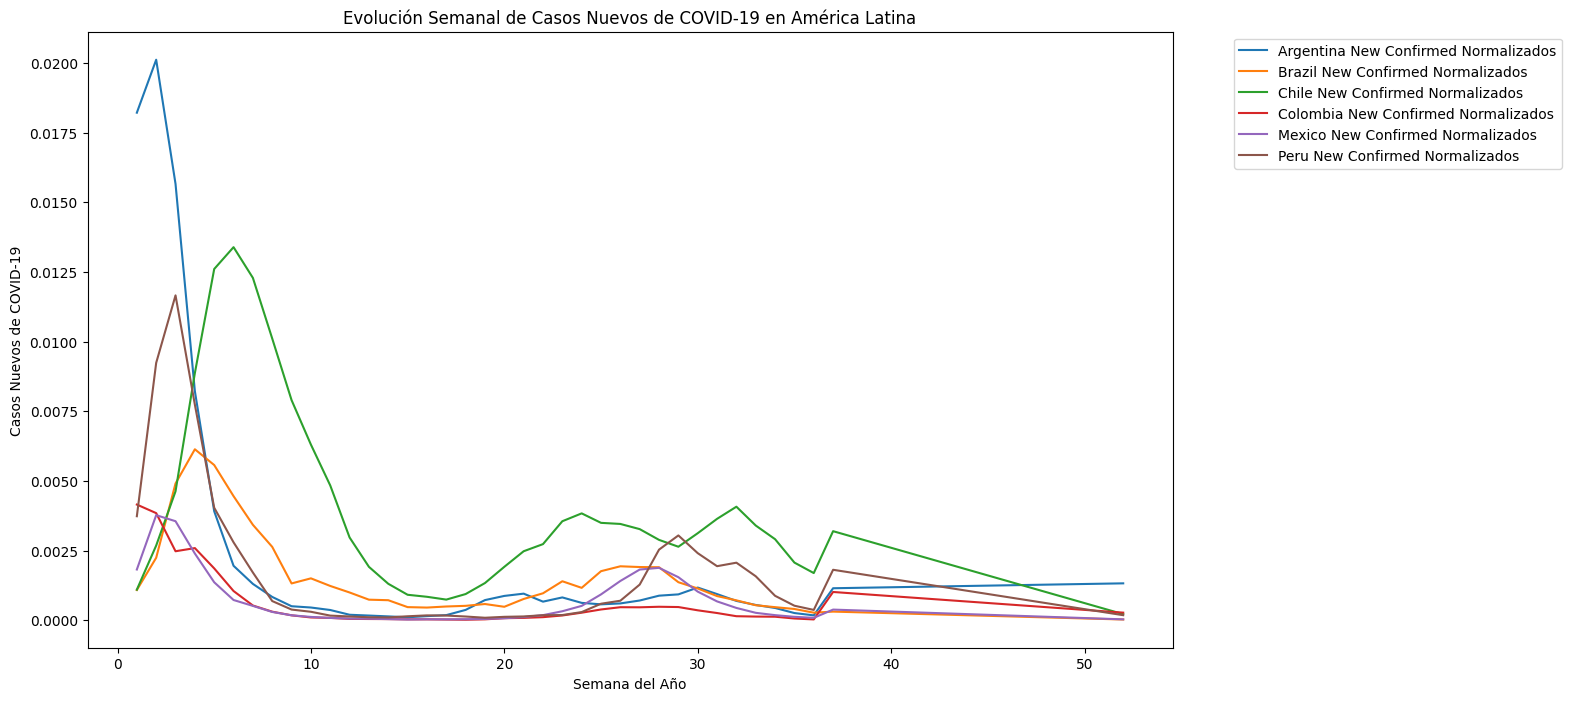

In [64]:
weekly_cases_2022_norm = data_latinoamerica_paises_2022.groupby(['country_name', 'week'])[['new_confirmed_norm','new_deceased_norm']].sum().reset_index()

fig, ax = plt.subplots(figsize=(14, 8)) 
for country in weekly_cases_2022_norm['country_name'].unique():
    country_weekly_cases = weekly_cases_2022_norm[weekly_cases_2022_norm['country_name'] == country]
    ax.plot(country_weekly_cases['week'], country_weekly_cases['new_confirmed_norm'], label=f'{country} New Confirmed Normalizados')

ax.set_xlabel("Semana del Año")
ax.set_ylabel("Casos Nuevos de COVID-19")
ax.set_title("Evolución Semanal de Casos Nuevos de COVID-19 en América Latina")
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

###### *En estos gráficos del 2021, es posible observar que Argentina y Colombia presentan un pico de nuevos confirmados entre mayo a julio más marcado que en los demás países. A su vez Argentina en diciembre presenta otro gran pico, mientras que en los demás países el número de casos se mantine estable. Brasil, Chile y Perú poseen un compartamiento similar respecto a los nuevos casos con un pico menos marcado entre marzo y junio, para luego disminuir y mantenerse constante hasta fin de año. México es el que menos casos nuevo presentó, con un pico suave en agosto.*
###### *En estos gráficos del 2022, es posible observar que Argentina y Perú inician con un gran número de nuevos casos para decaer marcadamente a lo largo del año. Chile presenta un pico de nuevos casos en febrero y leugo se reduce. Todos los países aumentan levemente el número de nuevos casos entre junio y agosto. México y Colombia son los que menos nuevos casos han presentado a lo largo del 2022*

###### **Evolución Anual de Casos Nuevos**

In [110]:
data_latinoamerica_paises['year'] = data_latinoamerica_paises.index.year #Generamos una columna con el año

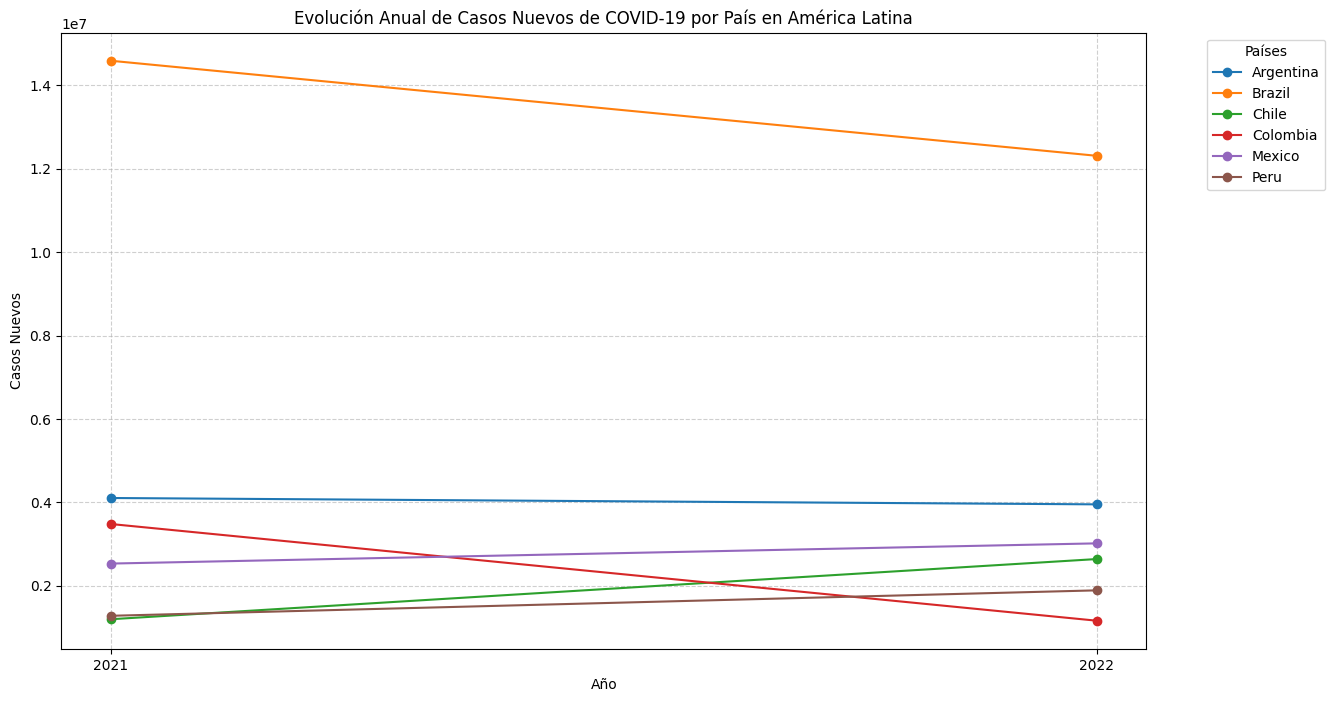

In [ ]:
yearly_cases = data_latinoamerica_paises.groupby(['country_name', 'year'])[['new_confirmed']].sum().reset_index()

fig, ax = plt.subplots(figsize=(14, 8))

for country in yearly_cases['country_name'].unique():
    country_data = yearly_cases[yearly_cases['country_name'] == country]
    
    ax.plot(country_data['year'], country_data['new_confirmed'], marker='o', linestyle='-', label=country)

ax.set_xlabel("Año")
ax.set_ylabel("Casos Nuevos")
ax.set_title("Evolución Anual de Casos Nuevos de COVID-19 por País en América Latina")

plt.xticks(yearly_cases['year'].unique())  # Año aparezca una sola vez en eje X
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Países")
plt.grid(True, linestyle="--", alpha=0.6) 

plt.show()


###### *Observamos que para Brasil y Colombia los casos nuevos se redujeron de 2021 a 2022, para Argentina la reducción fue muy sutil. Mientras que para México, Chile Y Perú hubo un aumento de casos desde 2021 a 2022 siendo coincidente con nuestros hallazgos rspecto al manejo de la pandemia*

###### **Distribución de la Población por Edad en Países**

In [ ]:
#Obtener porcentaje de muertos acumulados según la población de cada país
data_latinoamerica_paises['deceased_percentage'] = data_latinoamerica_paises['cumulative_deceased'] / data_latinoamerica_paises['population']
data_latinoamerica_paises

location_key country_code country_name  new_confirmed  \
date                                                               
2021-01-02           AR           AR    Argentina        7767.00   
2021-01-03           AR           AR    Argentina        4934.00   
2021-01-04           AR           AR    Argentina       13953.00   
2021-01-05           AR           AR    Argentina       14085.00   
2021-01-06           AR           AR    Argentina       14496.00   
...                 ...          ...          ...            ...   
2022-09-13           PE           PE         Peru        1150.00   
2022-09-14           PE           PE         Peru       12911.39   
2022-09-15           PE           PE         Peru       12911.39   
2022-09-16           PE           PE         Peru       12911.39   
2022-09-17           PE           PE         Peru       12911.39   

            new_deceased  cumulative_confirmed  cumulative_deceased  \
date                                                                  
2021-01-02        166.00            1670634.00             46688.00   
2021-01-03        157.00            1675568.00             46845.00   
2021-01-04        157.00            1689521.00             47002.00   
2021-01-05        160.00            1703606.00             47162.00   
2021-01-06        131.00            1718102.00             47293.00   
...                  ...                   ...                  ...   
2022-09-13         22.00            4127612.00            216173.00   
2022-09-14        134.38            6079578.72            105716.12   
2022-09-15        134.38            6079578.72            105716.12   
2022-09-16        134.38            6079578.72            105716.12   
2022-09-17        134.38            6079578.72            105716.12   

            cumulative_vaccine_doses_administered  population  \
date                                                            
2021-01-02                               20334.00 44938712.00   
2021-01-03                               20529.00 44938712.00   
2021-01-04                               25164.00 44938712.00   
2021-01-05                               29852.00 44938712.00   
2021-01-06                               34162.00 44938712.00   
...                                           ...         ...   
2022-09-13                                   0.00 29381884.00   
2022-09-14                                   0.00 29381884.00   
2022-09-15                                   0.00 29381884.00   
2022-09-16                                   0.00 29381884.00   
2022-09-17                                   0.00 29381884.00   

            population_male  ...  adult_male_mortality_rate  \
date                         ...                              
2021-01-02      19523766.00  ...                     147.09   
2021-01-03      19523766.00  ...                     147.09   
2021-01-04      19523766.00  ...                     147.09   
2021-01-05      19523766.00  ...                     147.09   
2021-01-06      19523766.00  ...                     147.09   
...                     ...  ...                        ...   
2022-09-13      14450757.00  ...                     146.37   
2022-09-14      14450757.00  ...                     146.37   
2022-09-15      14450757.00  ...                     146.37   
2022-09-16      14450757.00  ...                     146.37   
2022-09-17      14450757.00  ...                     146.37   

            adult_female_mortality_rate  pollution_mortality_rate  \
date                                                                
2021-01-02                        79.48                     26.60   
2021-01-03                        79.48                     26.60   
2021-01-04                        79.48                     26.60   
2021-01-05                        79.48                     26.60   
2021-01-06                        79.48                     26.60   
...                                 ...              

In [ ]:
#Obtener lista de países ordenamos por mortalidad descendentemente
high_mortality_countries = data_latinoamerica_paises.groupby('country_name')['deceased_percentage'].max().sort_values(ascending=False).head(5).index
high_mortality_countries

Index(['Peru', 'Chile', 'Brazil', 'Colombia', 'Argentina'], dtype='object', name='country_name')

In [ ]:
#Mostrar grupos de edades
age_groups = ['population_age_00_09', 'population_age_10_19', 'population_age_20_29', 'population_age_30_39', 'population_age_40_49', 'population_age_50_59', 'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older']
data_latinoamerica_paises[age_groups]

population_age_00_09  population_age_10_19  population_age_20_29  \
date                                                                           
2021-01-02            6718871.00            7045513.00            6430658.00   
2021-01-03            6718871.00            7045513.00            6430658.00   
2021-01-04            6718871.00            7045513.00            6430658.00   
2021-01-05            6718871.00            7045513.00            6430658.00   
2021-01-06            6718871.00            7045513.00            6430658.00   
...                          ...                   ...                   ...   
2022-09-13            5140624.00            5035905.00            4895056.00   
2022-09-14            5140624.00            5035905.00            4895056.00   
2022-09-15            5140624.00            5035905.00            4895056.00   
2022-09-16            5140624.00            5035905.00            4895056.00   
2022-09-17            5140624.00            5035905.00            4895056.00   

            population_age_30_39  population_age_40_49  population_age_50_59  \
date                                                                           
2021-01-02            5777148.00            4507125.00            3911943.00   
2021-01-03            5777148.00            4507125.00            3911943.00   
2021-01-04            5777148.00            4507125.00            3911943.00   
2021-01-05            5777148.00            4507125.00            3911943.00   
2021-01-06            5777148.00            4507125.00            3911943.00   
...                          ...                   ...                   ...   
2022-09-13            4379777.00            3660378.00            2772568.00   
2022-09-14            4379777.00            3660378.00            2772568.00   
2022-09-15            4379777.00            3660378.00            2772568.00   
2022-09-16            4379777.00            3660378.00            2772568.00   
2022-09-17            4379777.00            3660378.00            2772568.00   

            population_age_60_69  population_age_70_79  \
date                                                     
2021-01-02            2914251.00            1817557.00   
2021-01-03            2914251.00            1817557.00   
2021-01-04            2914251.00            1817557.00   
2021-01-05            2914251.00            1817557.00   
2021-01-06            2914251.00            1817557.00   
...                          ...                   ...   
2022-09-13            1846407.00            1078066.00   
2022-09-14            1846407.00            1078066.00   
2022-09-15            1846407.00            1078066.00   
2022-09-16            1846407.00            1078066.00   
2022-09-17            1846407.00            1078066.00   

            population_age_80_and_older  
date                                     
2021-01-02                    994030.00  
2021-01-03                    994030.00  
2021-01-04                    994030.00  
2021-01-05                    994030.00  
2021-01-06                    994030.00  
...                                 ...  
2022-09-13                    573103.00  
2022-09-14                    573103.00  
2022-09-15                    573103.00  
2022-09-16                    573103.00  
2022-09-17                    573103.00  

[3744 rows x 9 columns]

In [ ]:
#Obtener la distribución de los grupos de edades si el país está en la lista de países con gran mortalidad y agrupar por país caclulando la media de los grupos de edades
age_distribution = data_latinoamerica_paises[data_latinoamerica_paises['country_name'].isin(high_mortality_countries)].groupby('country_name')[age_groups].mean()
age_distribution

population_age_00_09  population_age_10_19  \
country_name                                               
Argentina               6718871.00            7045513.00   
Brazil                 29076910.00           31160446.00   
Chile                   2428079.00            2493879.00   
Colombia                7414155.00            8119876.00   
Peru                    5140624.00            5035905.00   

              population_age_20_29  population_age_30_39  \
country_name                                               
Argentina               6430658.00            5777148.00   
Brazil                 34104643.00           34476762.00   
Chile                   2995538.00            2945404.00   
Colombia                8847061.00            7810299.00   
Peru                    4895056.00            4379777.00   

              population_age_40_49  population_age_50_59  \
country_name                                               
Argentina               4507125.00            3911943.00   
Brazil                 29462006.00           24421202.00   
Chile                   2578404.00            2352271.00   
Colombia                6450787.00            5543980.00   
Peru                    3660378.00            2772568.00   

              population_age_60_69  population_age_70_79  \
country_name                                               
Argentina               2914251.00            1817557.00   
Brazil                 16896862.00            8801551.00   
Chile                   1791787.00             993126.00   
Colombia                3771358.00            1979761.00   
Peru                    1846407.00            1078066.00   

              population_age_80_and_older  
country_name                               
Argentina                       994030.00  
Brazil                         4159027.00  
Chile                           537721.00  
Colombia                        945607.00  
Peru                            573103.00

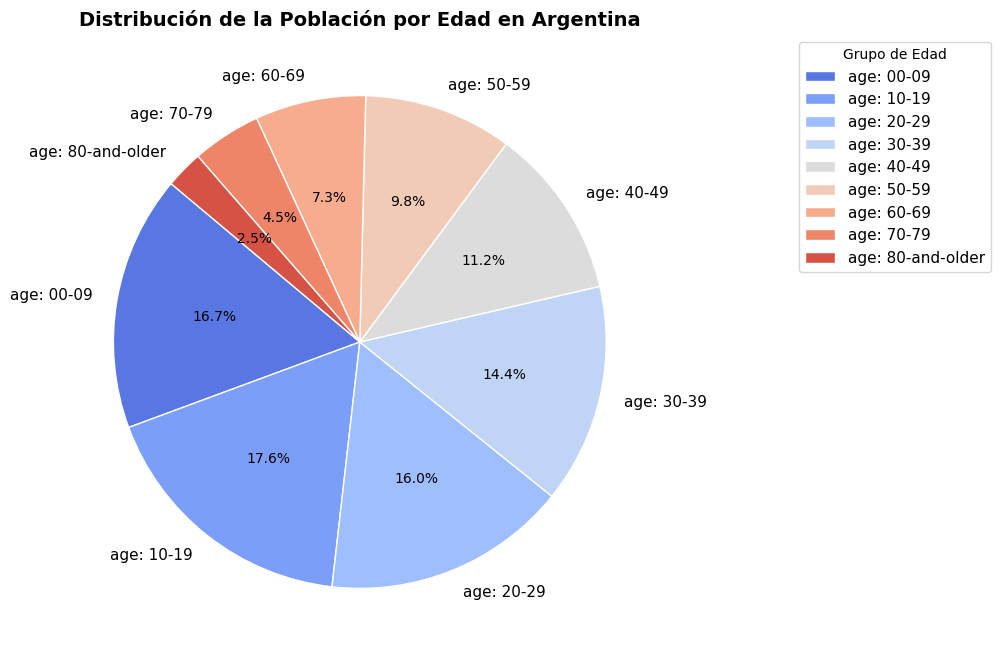

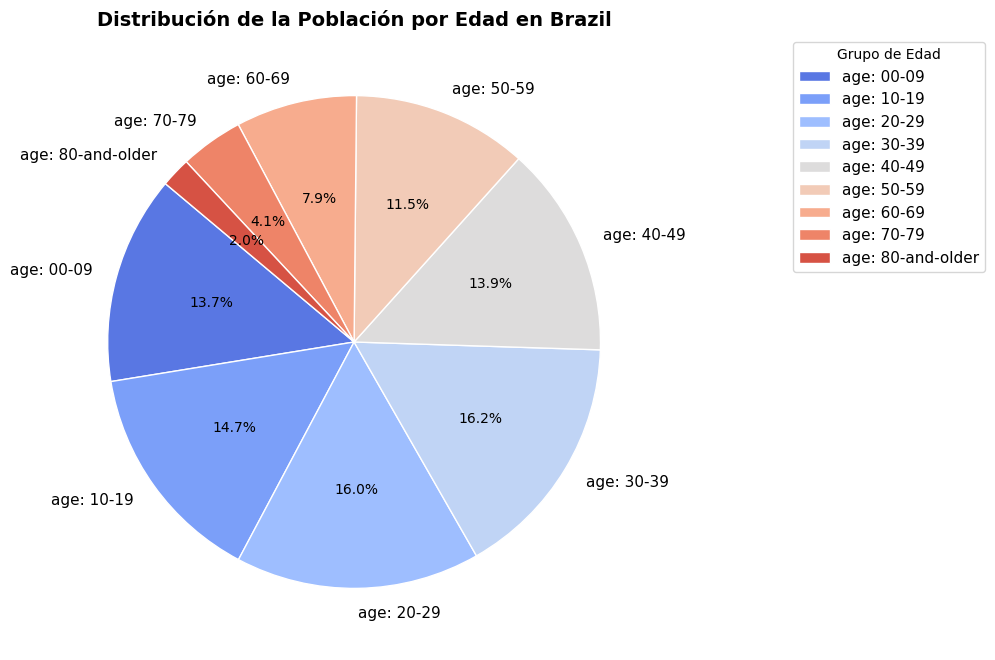

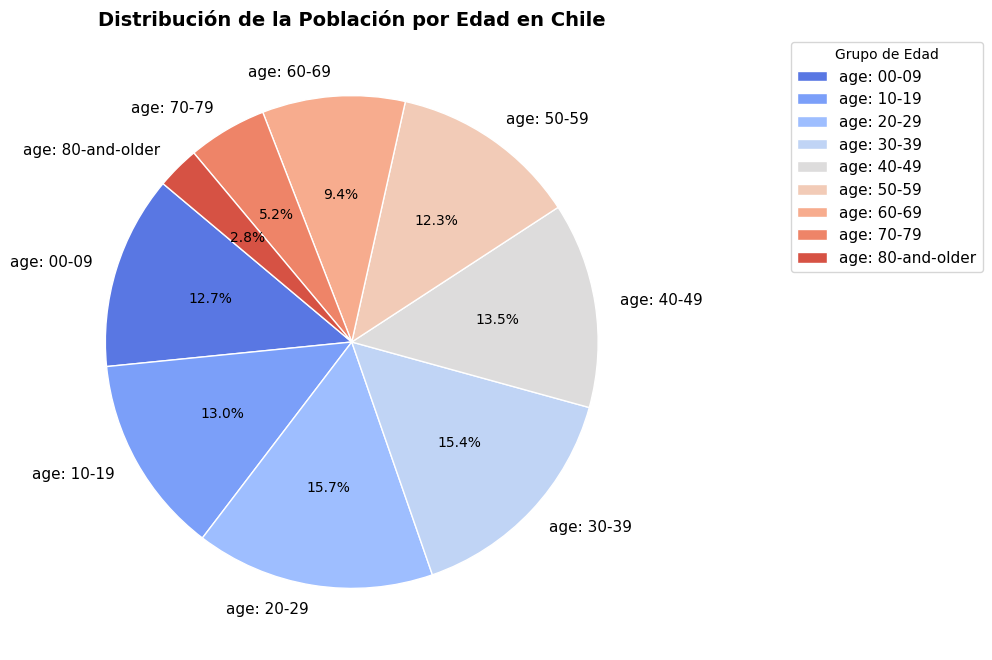

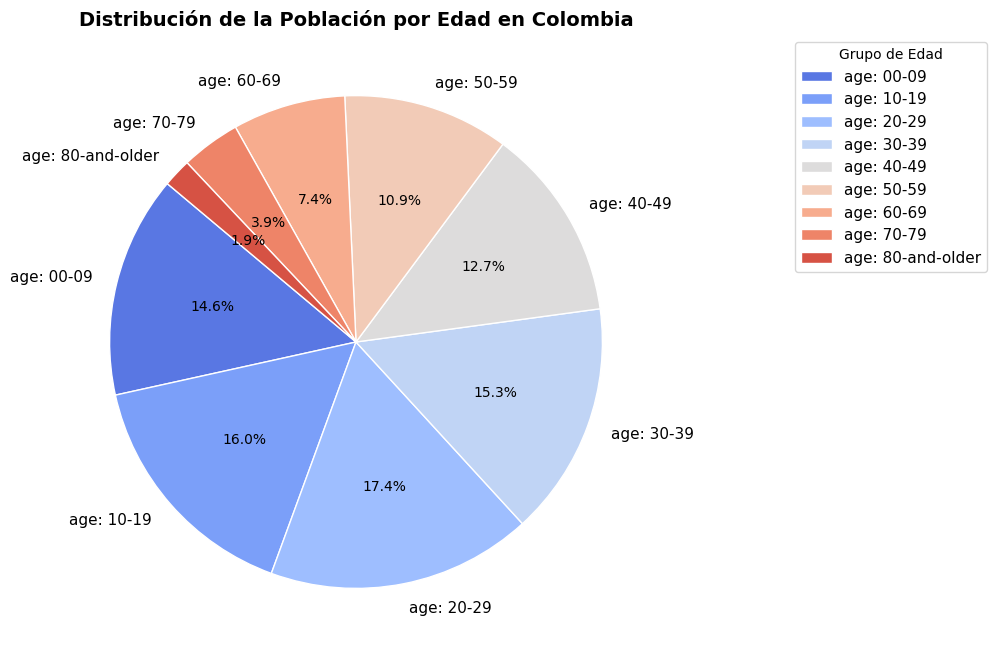

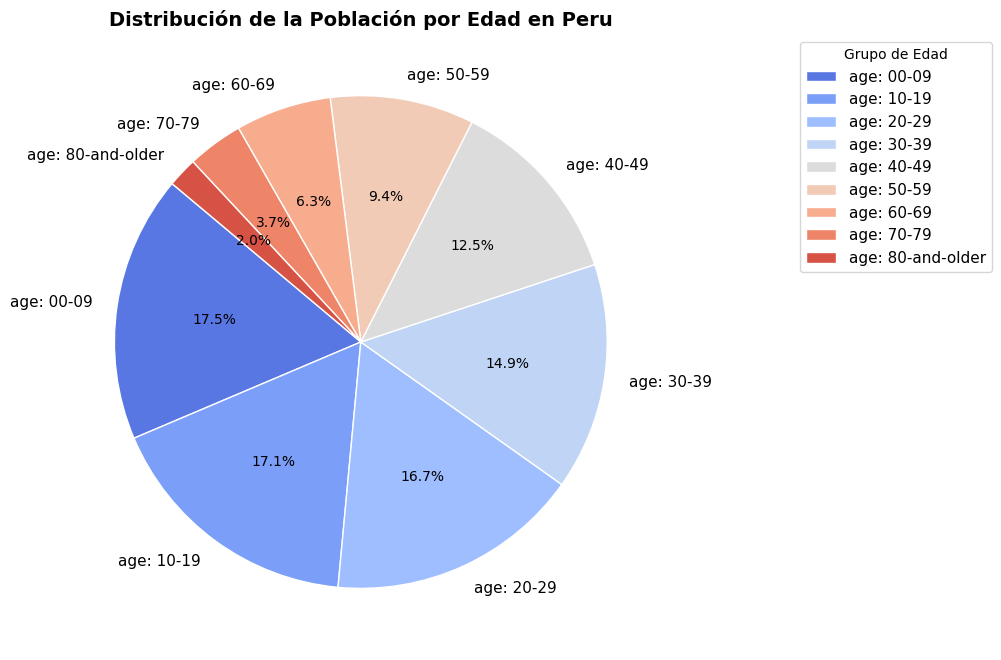

In [ ]:
paises = age_distribution.index.unique()

# Definir colores para los grupos etarios
colors = sns.color_palette("coolwarm", len(age_groups))

# Generar gráficos de torta por país
for pais in paises:
    plt.figure(figsize=(8, 8)) 

    # Mejorar las etiquetas
    labels = [label.replace("population_", "").replace("age_","age: ").replace("_", "-") for label in age_distribution.loc[pais].index]
    
    # Crear el gráfico de torta
    wedges, texts, autotexts = plt.pie(
        age_distribution.loc[pais].values,
        labels=labels,
        autopct='%1.1f%%',
        colors=colors,
        startangle=140,  # Rotación
        wedgeprops={'edgecolor': 'white', 'linewidth': 1},  # Bordes blancos para mejor separación
        textprops={'fontsize': 12} 
    )
    
    # Ajustar tamaño de etiquetas y porcentaje
    for text in texts:
        text.set_fontsize(11)
    for autotext in autotexts:
        autotext.set_fontsize(10)
        autotext.set_color('black')

    plt.title(f'Distribución de la Población por Edad en {pais}', fontsize=14, fontweight='bold')
    plt.legend(title='Grupo de Edad', bbox_to_anchor=(1.2, 1), loc='upper left', fontsize=11)
    
    plt.show()

###### *Observamos de forma rápida y sencilla cómo se distribuye la población en cada país por grupos de edades*

###### **Comparación de Estrategias de Vacunación en América Latina**

In [ ]:
data_latinoamerica_paises.groupby('country_name')['cumulative_vaccine_doses_administered'].max() #Dosis acumuladas máximas administradas por país

country_name
Argentina   109204825.00
Brazil      347868481.00
Chile        62204235.00
Colombia     87566541.00
Mexico      209673612.00
Peru         83624934.00
Name: cumulative_vaccine_doses_administered, dtype: float64

In [82]:
data_latinoamerica_paises.groupby('country_name')['population'].mean() #Población media por país

country_name
Argentina    44938712.00
Brazil      212559409.00
Chile        17574003.00
Colombia     50882884.00
Mexico      110991953.00
Peru         29381884.00
Name: population, dtype: float64

In [84]:
#Obtener las dosis acumuladas administradas por país corregido por el promedio de población
vaccination_strategy= data_latinoamerica_paises.groupby('country_name')['cumulative_vaccine_doses_administered'].max() / data_latinoamerica_paises.groupby('country_name')['population'].mean()

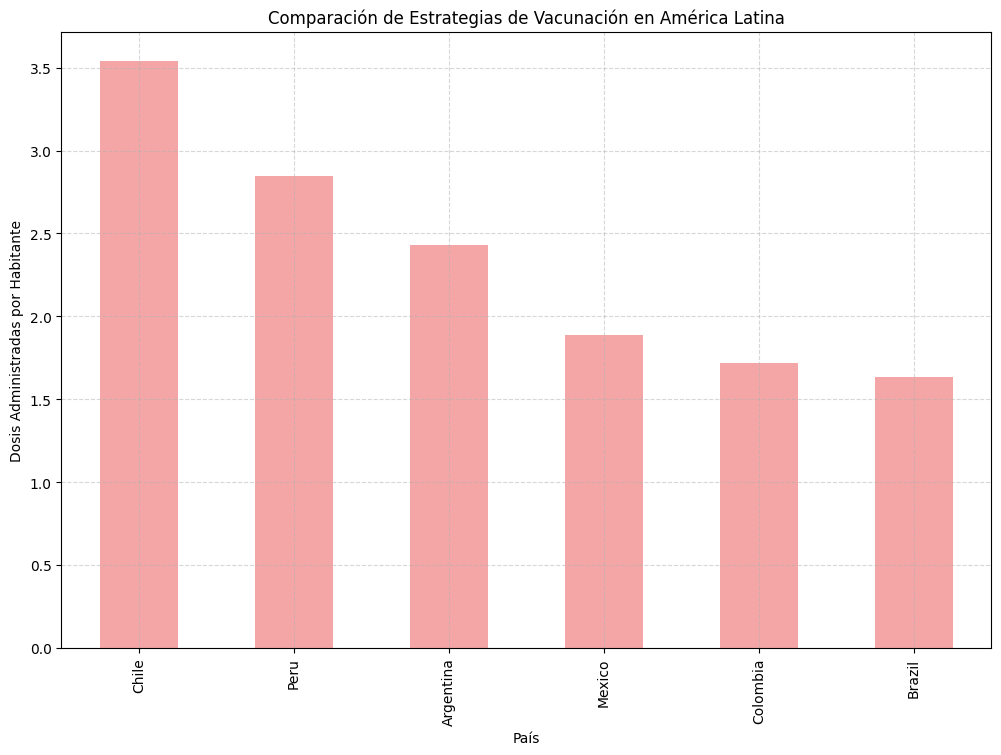

In [89]:
vaccination_strategy.sort_values(ascending=False).plot(kind='bar', figsize=(12, 8), color='lightcoral', alpha=0.7)

plt.xlabel('País')
plt.ylabel('Dosis Administradas por Habitante')
plt.title('Comparación de Estrategias de Vacunación en América Latina')
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

###### *Chile ha sido el país que más dosis administró, seguido por Perú y Argentina relativo al tamaño poblacional. Sin embargo, ha presentado una gran cantidad de casos nuevos y de muertes, por lo que esta estrategia no parecería haber dado los resultados esperados*

###### **Evolución del Número de Muertes Diarias**

In [139]:
data_latinoamerica_paises = data_latinoamerica_paises.sort_values(by='date')
data_latinoamerica_paises

location_key country_code country_name  new_confirmed  \
date                                                               
2021-01-02           AR           AR    Argentina        7767.00   
2021-01-02           PE           PE         Peru        1695.00   
2021-01-02           CL           CL        Chile        3338.00   
2021-01-02           MX           MX       Mexico        6948.00   
2021-01-02           CO           CO     Colombia       11723.00   
...                 ...          ...          ...            ...   
2022-09-17           CL           CL        Chile       12911.39   
2022-09-17           CO           CO     Colombia       12911.39   
2022-09-17           BR           BR       Brazil       12911.39   
2022-09-17           AR           AR    Argentina       12911.39   
2022-09-17           PE           PE         Peru       12911.39   

            new_deceased  cumulative_confirmed  cumulative_deceased  \
date                                                                  
2021-01-02        166.00            1670634.00             46688.00   
2021-01-02        200.00            1025025.00             94333.00   
2021-01-02         64.00             615902.00             16724.00   
2021-01-02        993.00            1533239.00            151435.00   
2021-01-02        328.00            1723443.00             50806.00   
...                  ...                   ...                  ...   
2022-09-17        134.38            6079578.72            105716.12   
2022-09-17        134.38            6079578.72            105716.12   
2022-09-17        134.38            6079578.72            105716.12   
2022-09-17        134.38            6079578.72            105716.12   
2022-09-17        134.38            6079578.72            105716.12   

            cumulative_vaccine_doses_administered   population  \
date                                                             
2021-01-02                               20334.00  44938712.00   
2021-01-02                                   0.00  29381884.00   
2021-01-02                                   0.00  17574003.00   
2021-01-02                                   0.00 110991953.00   
2021-01-02                                   0.00  50882884.00   
...                                           ...          ...   
2022-09-17                                   0.00  17574003.00   
2022-09-17                                   0.00  50882884.00   
2022-09-17                                   0.00 212559409.00   
2022-09-17                                   0.00  44938712.00   
2022-09-17                                   0.00  29381884.00   

            population_male  ...  confirmed_population_percentage  \
date                         ...                                    
2021-01-02      19523766.00  ...                             0.04   
2021-01-02      14450757.00  ...                             0.03   
2021-01-02       8972014.00  ...                             0.04   
2021-01-02      54855231.00  ...                             0.01   
2021-01-02      24984564.00  ...                             0.03   
...                     ...  ...                              ...   
2022-09-17       8972014.00  ...                             0.35   
2022-09-17      24984564.00  ...                             0.12   
2022-09-17     104435783.00  ...                             0.03   
2022-09-17      19523766.00  ...                             0.14   
2022-09-17      14450757.00  ...                             0.21   

            deceased_percentage  year  new_confirmed_norm  \
date                                                        
2021-01-02                 0.00  2021                0.00   
2021-01-02                 0.00  2021                0.00   
2021-01-02                 0.00  2021                0.00   
2021-01-02                 0.00  2021                0.00   
2021-01-02                 0.00  2021                0.00   
...               

In [ ]:
data_latinoamerica_paises['daily_deaths'] = data_latinoamerica_paises['cumulative_deceased'].diff() #.diff () calcula la diferencia entre cada día y el día anterior
data_latinoamerica_paises['daily_deaths'].fillna(0, inplace=True) #Ya que el primer valor siempre será NaN


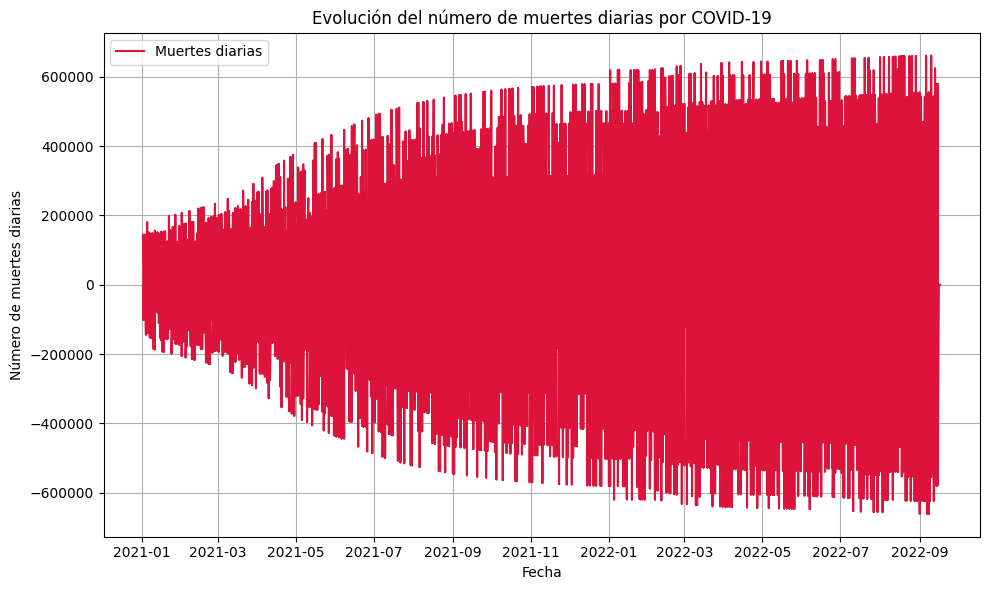

In [148]:
plt.figure(figsize=(10, 6))
plt.plot(data_latinoamerica_paises.index, data_latinoamerica_paises['daily_deaths'], color='crimson', label='Muertes diarias')

plt.xlabel('Fecha')
plt.ylabel('Número de muertes diarias')
plt.title('Evolución del número de muertes diarias por COVID-19')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

###### *Aquí podemos ver cómo varía las muertes diarias a lo largo del tiempo*

###### **Prevalencia de Condiciones Preexistentes en Países con Altas y Bajas Tasas de Mortalidad**

In [92]:
#¿Cuáles son los países con mayor porcentaje de muertes?
top_countries = data_latinoamerica_paises.groupby('country_name')['deceased_percentage'].max().nlargest(3).index
top_countries

Index(['Peru', 'Chile', 'Brazil'], dtype='object', name='country_name')

In [93]:
#¿Cuáles son los países con menor porcentaje de muertes?
bottom_countries = data_latinoamerica_paises.groupby('country_name')['deceased_percentage'].max().nsmallest(3).index
bottom_countries

Index(['Mexico', 'Argentina', 'Colombia'], dtype='object', name='country_name')

In [94]:
#Países ordenados por porcentaje de muertes descendentemnete
all_countries = data_latinoamerica_paises.groupby('country_name')['deceased_percentage'].max().sort_values(ascending=False)
all_countries

country_name
Peru        0.01
Chile       0.01
Brazil      0.00
Colombia    0.00
Argentina   0.00
Mexico      0.00
Name: deceased_percentage, dtype: float64

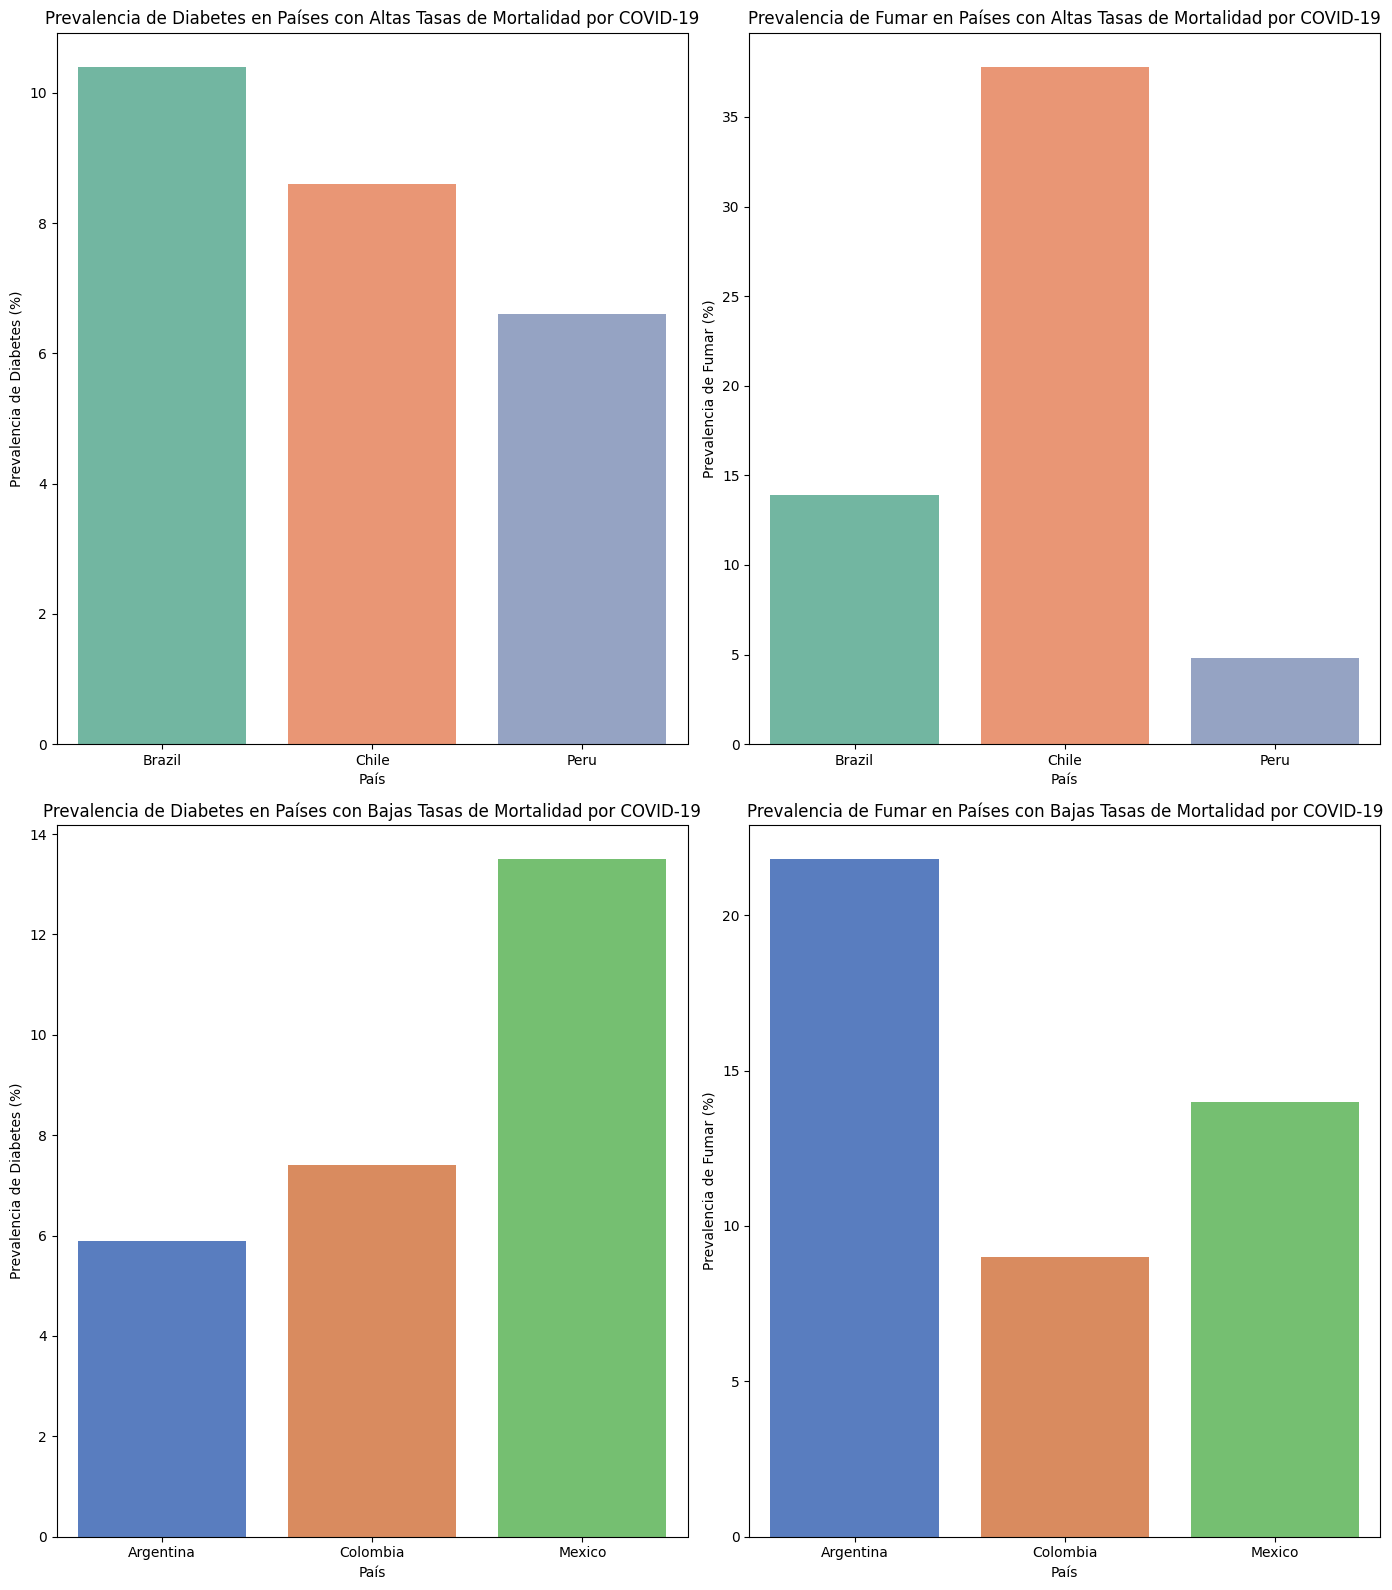

In [99]:
conditions_top_data = data_latinoamerica_paises[data_latinoamerica_paises['country_name'].isin(top_countries)]
conditions_bottom_data = data_latinoamerica_paises[data_latinoamerica_paises['country_name'].isin(bottom_countries)]

palette_top = sns.color_palette("Set2")  
palette_bottom = sns.color_palette("muted") 

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(
    ncols=2,
    nrows=2,
    figsize=(14, 16)
)

# Prevalencia de diabetes en top
sns.barplot(data=conditions_top_data, x='country_name', y='diabetes_prevalence', hue='country_name', ax=ax1, palette= palette_top)
ax1.set_xlabel('País')
ax1.set_ylabel('Prevalencia de Diabetes (%)')
ax1.set_title('Prevalencia de Diabetes en Países con Altas Tasas de Mortalidad por COVID-19')

# Prevalencia de fumar en top
sns.barplot(data=conditions_top_data, x='country_name', y='smoking_prevalence', hue='country_name', ax=ax2, palette= palette_top)
ax2.set_xlabel('País')
ax2.set_ylabel('Prevalencia de Fumar (%)')
ax2.set_title('Prevalencia de Fumar en Países con Altas Tasas de Mortalidad por COVID-19')

# Prevalencia de diabetes en top
sns.barplot(data=conditions_bottom_data, x='country_name', y='diabetes_prevalence', hue='country_name', ax=ax3, palette= palette_bottom)
ax3.set_xlabel('País')
ax3.set_ylabel('Prevalencia de Diabetes (%)')
ax3.set_title('Prevalencia de Diabetes en Países con Bajas Tasas de Mortalidad por COVID-19')

# Prevalencia de fumar en top
sns.barplot(data=conditions_bottom_data, x='country_name', y='smoking_prevalence', hue='country_name', ax=ax4, palette= palette_bottom)
ax4.set_xlabel('País')
ax4.set_ylabel('Prevalencia de Fumar (%)')
ax4.set_title('Prevalencia de Fumar en Países con Bajas Tasas de Mortalidad por COVID-19')

plt.tight_layout()

plt.show()

###### *Podemos observar que la diabetes afecta en mayor medida a Brasil y México, mientras que el tabaco a Chile y Argentina. Consideremos además que Brasil y Chile aparecen entro los países con mayor mortalidad mientras que México y Argentina entre los que poseen una menor mortalidad. Por lo que a nivel país es difícil estrablecer una correlación entre condiciones preexistentes y mortalidad por COVID* 

###### **Variación Mensual de Casos y Muertes**

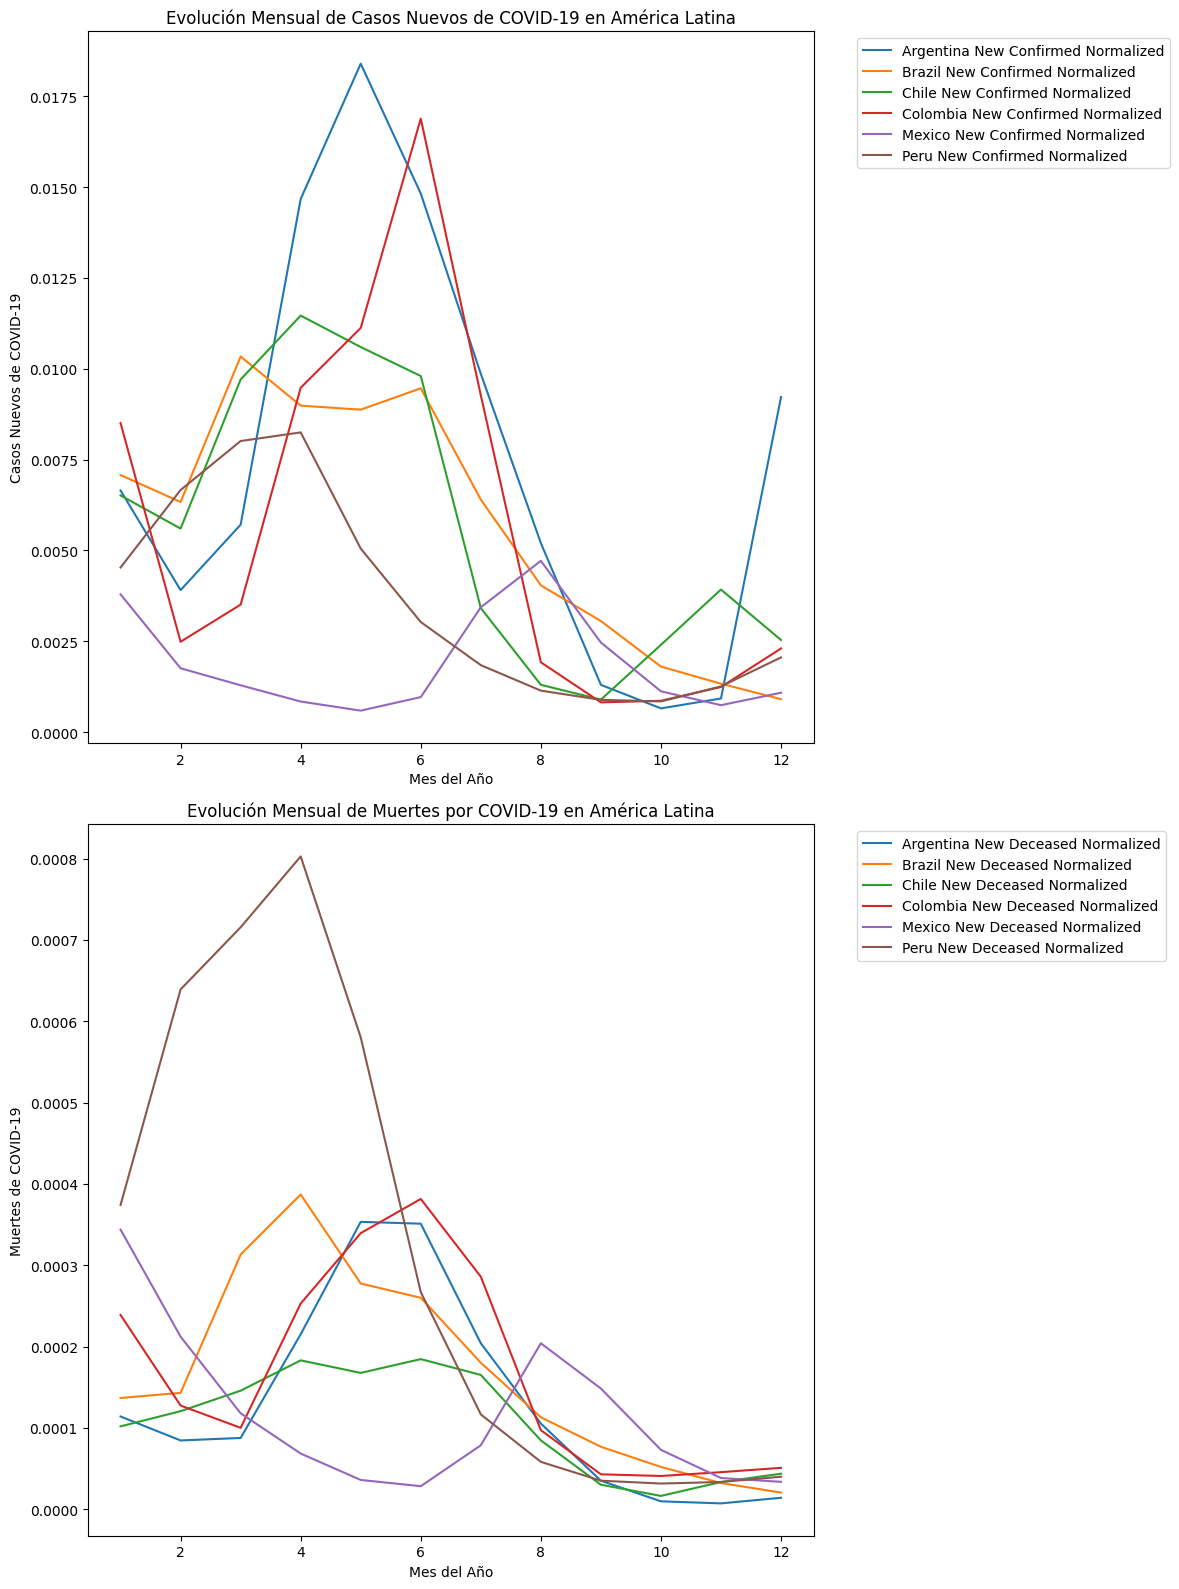

In [90]:
data_latinoamerica_paises_2021['month'] = data_latinoamerica_paises_2021.index.month #Generamos una columna con el mes
yearly_cases_2021 = data_latinoamerica_paises_2021.groupby(['country_name', 'month'])[['new_confirmed_norm','new_deceased_norm']].sum().reset_index() #Agrupamos por país y mes y sumamos columnas de interés

fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(12, 16)) #Generamos una figura con dos ejes
for country in yearly_cases_2021['country_name'].unique():
    country_yearly_cases = yearly_cases_2021[yearly_cases_2021['country_name'] == country]
    ax[0].plot(country_yearly_cases['month'], country_yearly_cases['new_confirmed_norm'], label=f'{country} New Confirmed Normalized')
    ax[1].plot(country_yearly_cases['month'], country_yearly_cases['new_deceased_norm'], label=f'{country} New Deceased Normalized')

ax[0].set_xlabel("Mes del Año")
ax[0].set_ylabel("Casos Nuevos de COVID-19")
ax[0].set_title("Evolución Mensual de Casos Nuevos de COVID-19 en América Latina")
ax[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

ax[1].set_xlabel("Mes del Año")
ax[1].set_ylabel("Muertes de COVID-19")
ax[1].set_title("Evolución Mensual de Muertes por COVID-19 en América Latina")
ax[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

###### *En estos gráficos del año 2021, es posible observar que Argentina y Colombia presentan un pico de nuevos confirmados entre mayo a julio más marcado que en los demás países. A su vez Argentina en diciembre presenta otro gran pico, mientras que en los demás países el número de casos se mantine estable. Brasil, Chile y Perú poseen un compartamiento similar respecto a los nuevos casos con un pico menos marcado entre marzo y junio, para luego disminuir y mantenerse constante hasta fin de año. México es el que menos casos nuevo presentó, con un pico suave en agosto.*
###### *Respecto a los nuevos muertos Perú posee los números más elevados en abril y luego decae sustancialmente, Brasil también presenta un pico en abril pero mucho más reducido en cantidad, mientras que Argentina y Colombia se acercan en número de muertos a Braisl (con una población mucho menor) en junio. México con un menor número de muertes presenta su pico en agosto y Chile es más constante con el máximo entre abril a julio.*

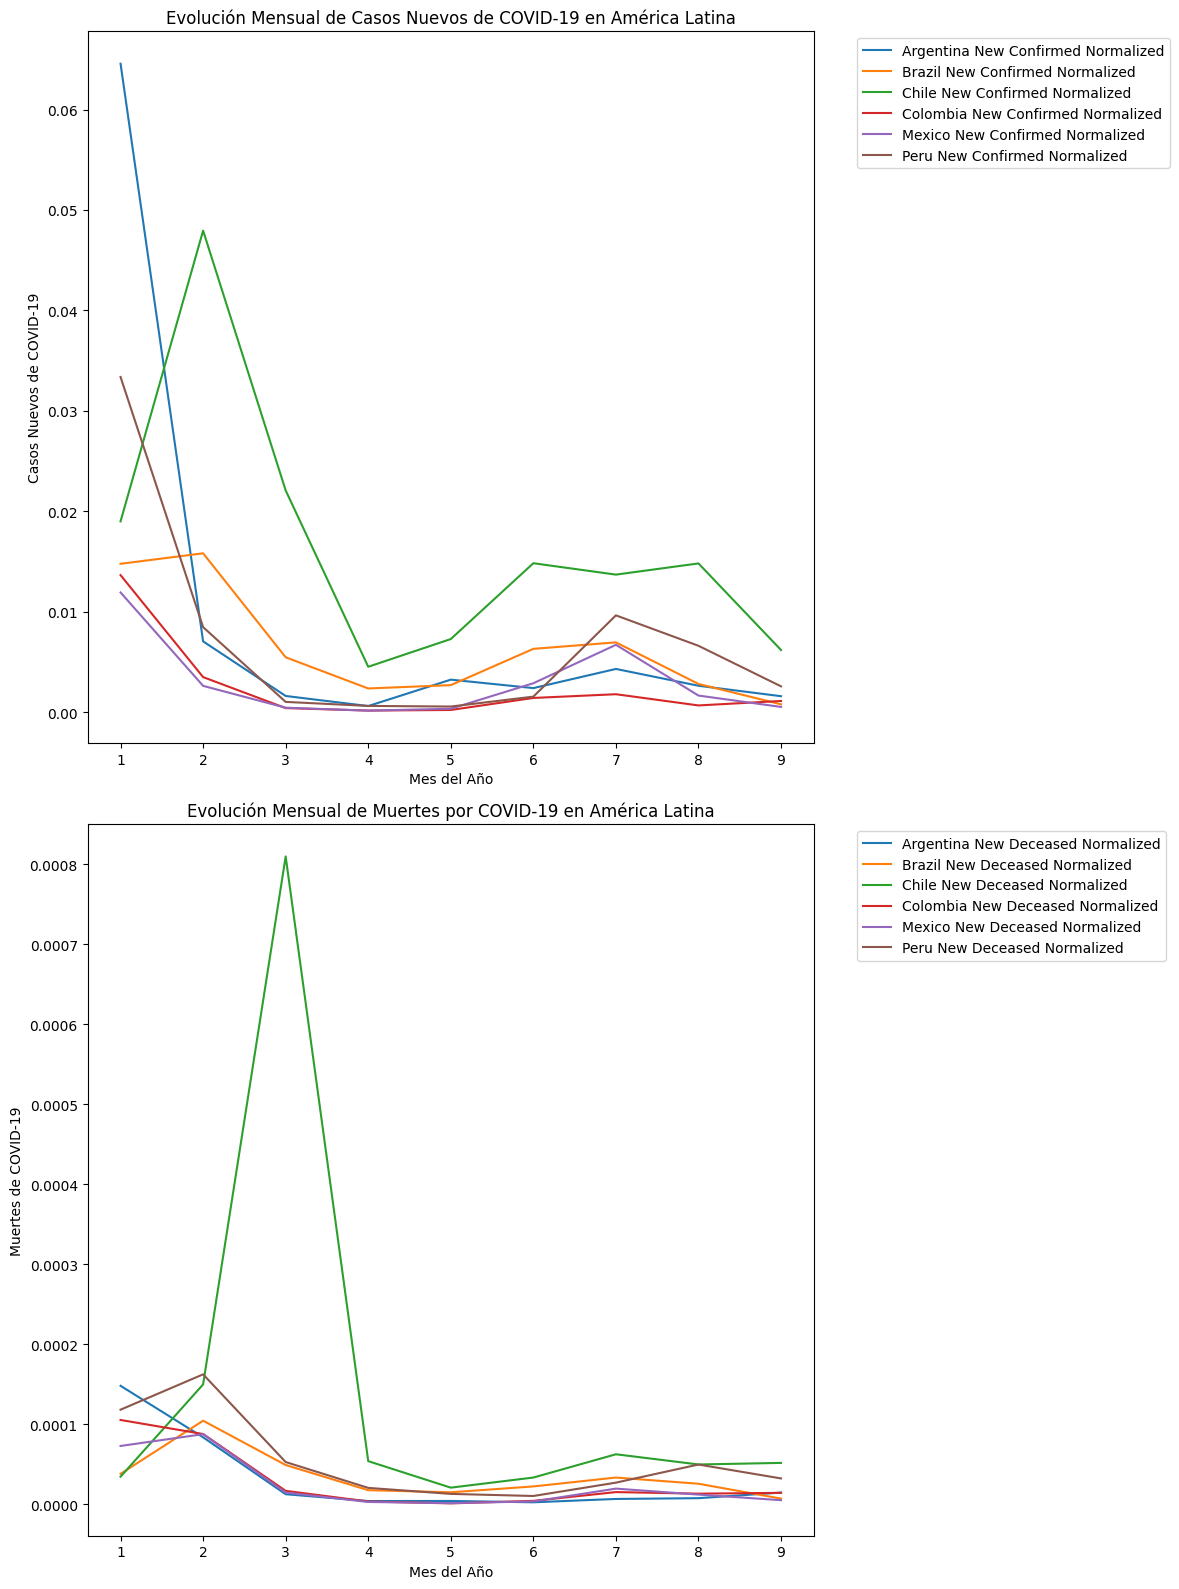

In [91]:
#Gráfico por mes
data_latinoamerica_paises_2022['month'] = data_latinoamerica_paises_2022.index.month #Generamos una columna con el mes
yearly_cases_2022 = data_latinoamerica_paises_2022.groupby(['country_name', 'month'])[['new_confirmed_norm','new_deceased_norm']].sum().reset_index() #Agrupamos por país y mes y sumamos columnas de interés

fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(12, 16)) #Generamos una figura con dos ejes
for country in yearly_cases_2022['country_name'].unique():
    country_yearly_cases = yearly_cases_2022[yearly_cases_2022['country_name'] == country]
    ax[0].plot(country_yearly_cases['month'], country_yearly_cases['new_confirmed_norm'], label=f'{country} New Confirmed Normalized')
    ax[1].plot(country_yearly_cases['month'], country_yearly_cases['new_deceased_norm'], label=f'{country} New Deceased Normalized')

ax[0].set_xlabel("Mes del Año")
ax[0].set_ylabel("Casos Nuevos de COVID-19")
ax[0].set_title("Evolución Mensual de Casos Nuevos de COVID-19 en América Latina")
ax[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

ax[1].set_xlabel("Mes del Año")
ax[1].set_ylabel("Muertes de COVID-19")
ax[1].set_title("Evolución Mensual de Muertes por COVID-19 en América Latina")
ax[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

###### *En estos gráficos del año 2022, es posible observar que Argentina y Perú inician con un gran número de nuevos casos para decaer marcadamente a lo largo del año. Chile presenta un pico de nuevos casos en febrero y leugo se reduce. Todos los países aumentan levemente el número de nuevos casos entre junio y agosto. México y Colombia son los que menos nuevos casos han presentado a lo largo del 2022*
###### *Respecto a los nuevos muertos, todos los países exceptuando Chile tuvieron un leve pico en febrero para luego disminuir sustancialmente. Chile presentó un pico muy importante en marzo para disminuir y acercarse al resto de los países analizados.*

###### **Análisis Temporal de la Mortalidad**

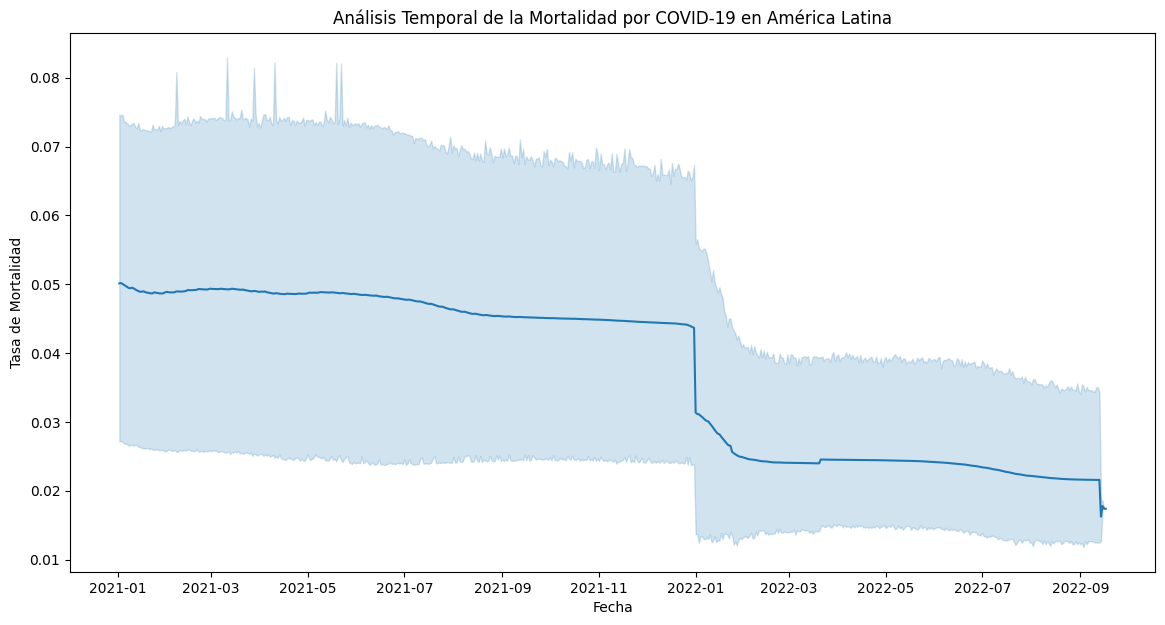

In [ ]:
#Obtener personas fallecidas/confirmados
data_latinoamerica_paises['mortality_rate'] = data_latinoamerica_paises['cumulative_deceased'] / data_latinoamerica_paises['cumulative_confirmed']

plt.figure(figsize=(14, 7))
sns.lineplot(
    data=data_latinoamerica_paises, 
    x='date', 
    y='mortality_rate', 
    estimator='mean' #Calcular el promedio en caos que haya varios datos para la misma fecha, el sombreado representa el desvío estándar
)
plt.title('Análisis Temporal de la Mortalidad por COVID-19 en América Latina')
plt.xlabel('Fecha')
plt.ylabel('Tasa de Mortalidad')
plt.show()

###### *Observamos que la mortalidad descendió en el transcurso del tiempo, con una disminución marcada a inicios de 2022 coincidente con el aumento de los vacunados en todos los países*

###### **Comparación de la Situación Actual (Contexto de los datos)**

In [ ]:
#Obtener totales de columnas seleccionadas tomando la última fila y ordenando valores 
current_situation = data_latinoamerica_paises.groupby('country_name')[['active_cases', 'cumulative_recovered', 'cumulative_deceased']].last().sort_values(by="active_cases")
current_situation
#Error en recovered

active_cases  cumulative_recovered  cumulative_deceased
country_name                                                         
Argentina       5973862.60                  0.00            105716.12
Brazil          5973862.60                  0.00            105716.12
Chile           5973862.60                  0.00            105716.12
Colombia        5973862.60                  0.00            105716.12
Mexico          5973862.60                  0.00            105716.12
Peru            5973862.60                  0.00            105716.12

In [157]:
current_situation = data_latinoamerica_paises.groupby('country_name')[['active_cases', 'cumulative_recovered', 'cumulative_deceased']].max().sort_values(by="active_cases")
current_situation

active_cases  cumulative_recovered  cumulative_deceased
country_name                                                         
Chile           5973862.60                  0.00            105716.12
Mexico          5973862.60                  0.00            304025.00
Peru            5973862.60                  0.00            216173.00
Colombia        6162609.00            5441021.00            155770.00
Argentina       9567933.00                  0.00            129830.00
Brazil         33819307.00           33706231.00            685203.00

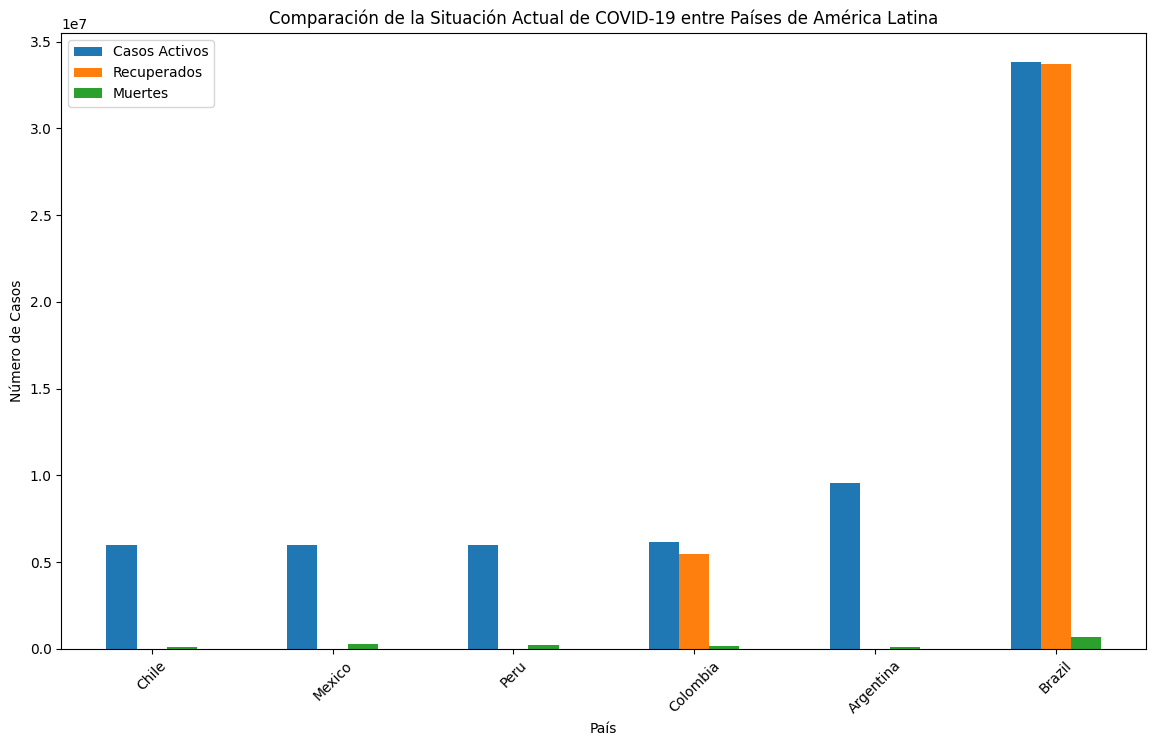

In [158]:
current_situation = data_latinoamerica_paises.groupby('country_name')[['active_cases', 'cumulative_recovered', 'cumulative_deceased']].max().sort_values(by="active_cases")
current_situation.plot(kind='bar', stacked=False, figsize=(14, 8))
plt.title('Comparación de la Situación Actual de COVID-19 entre Países de América Latina')
plt.xlabel('País')
plt.ylabel('Número de Casos')
plt.legend(['Casos Activos', 'Recuperados', 'Muertes'])
plt.xticks(rotation=45)
plt.show()

###### *Pareciera haber algún error en los datos respecto a los recuperados, ya que hay países en los que no hay recuperados, pero hay una diferencia entre los casos activos y las muertes por lo que hay recuperados. Con este gráfico podríamos ser capaces de comparar la situación actual de cada país en cuanto a casos activos, casos recuperados y muertes. En líneas generales, vemos que si bien hay muchos casos activos, las muertes son muy reducidas y para Colombia y Brasil observamos que el número de recuperados es muy alto*

###### 5.Investiga posibles correlaciones entre las distintas características

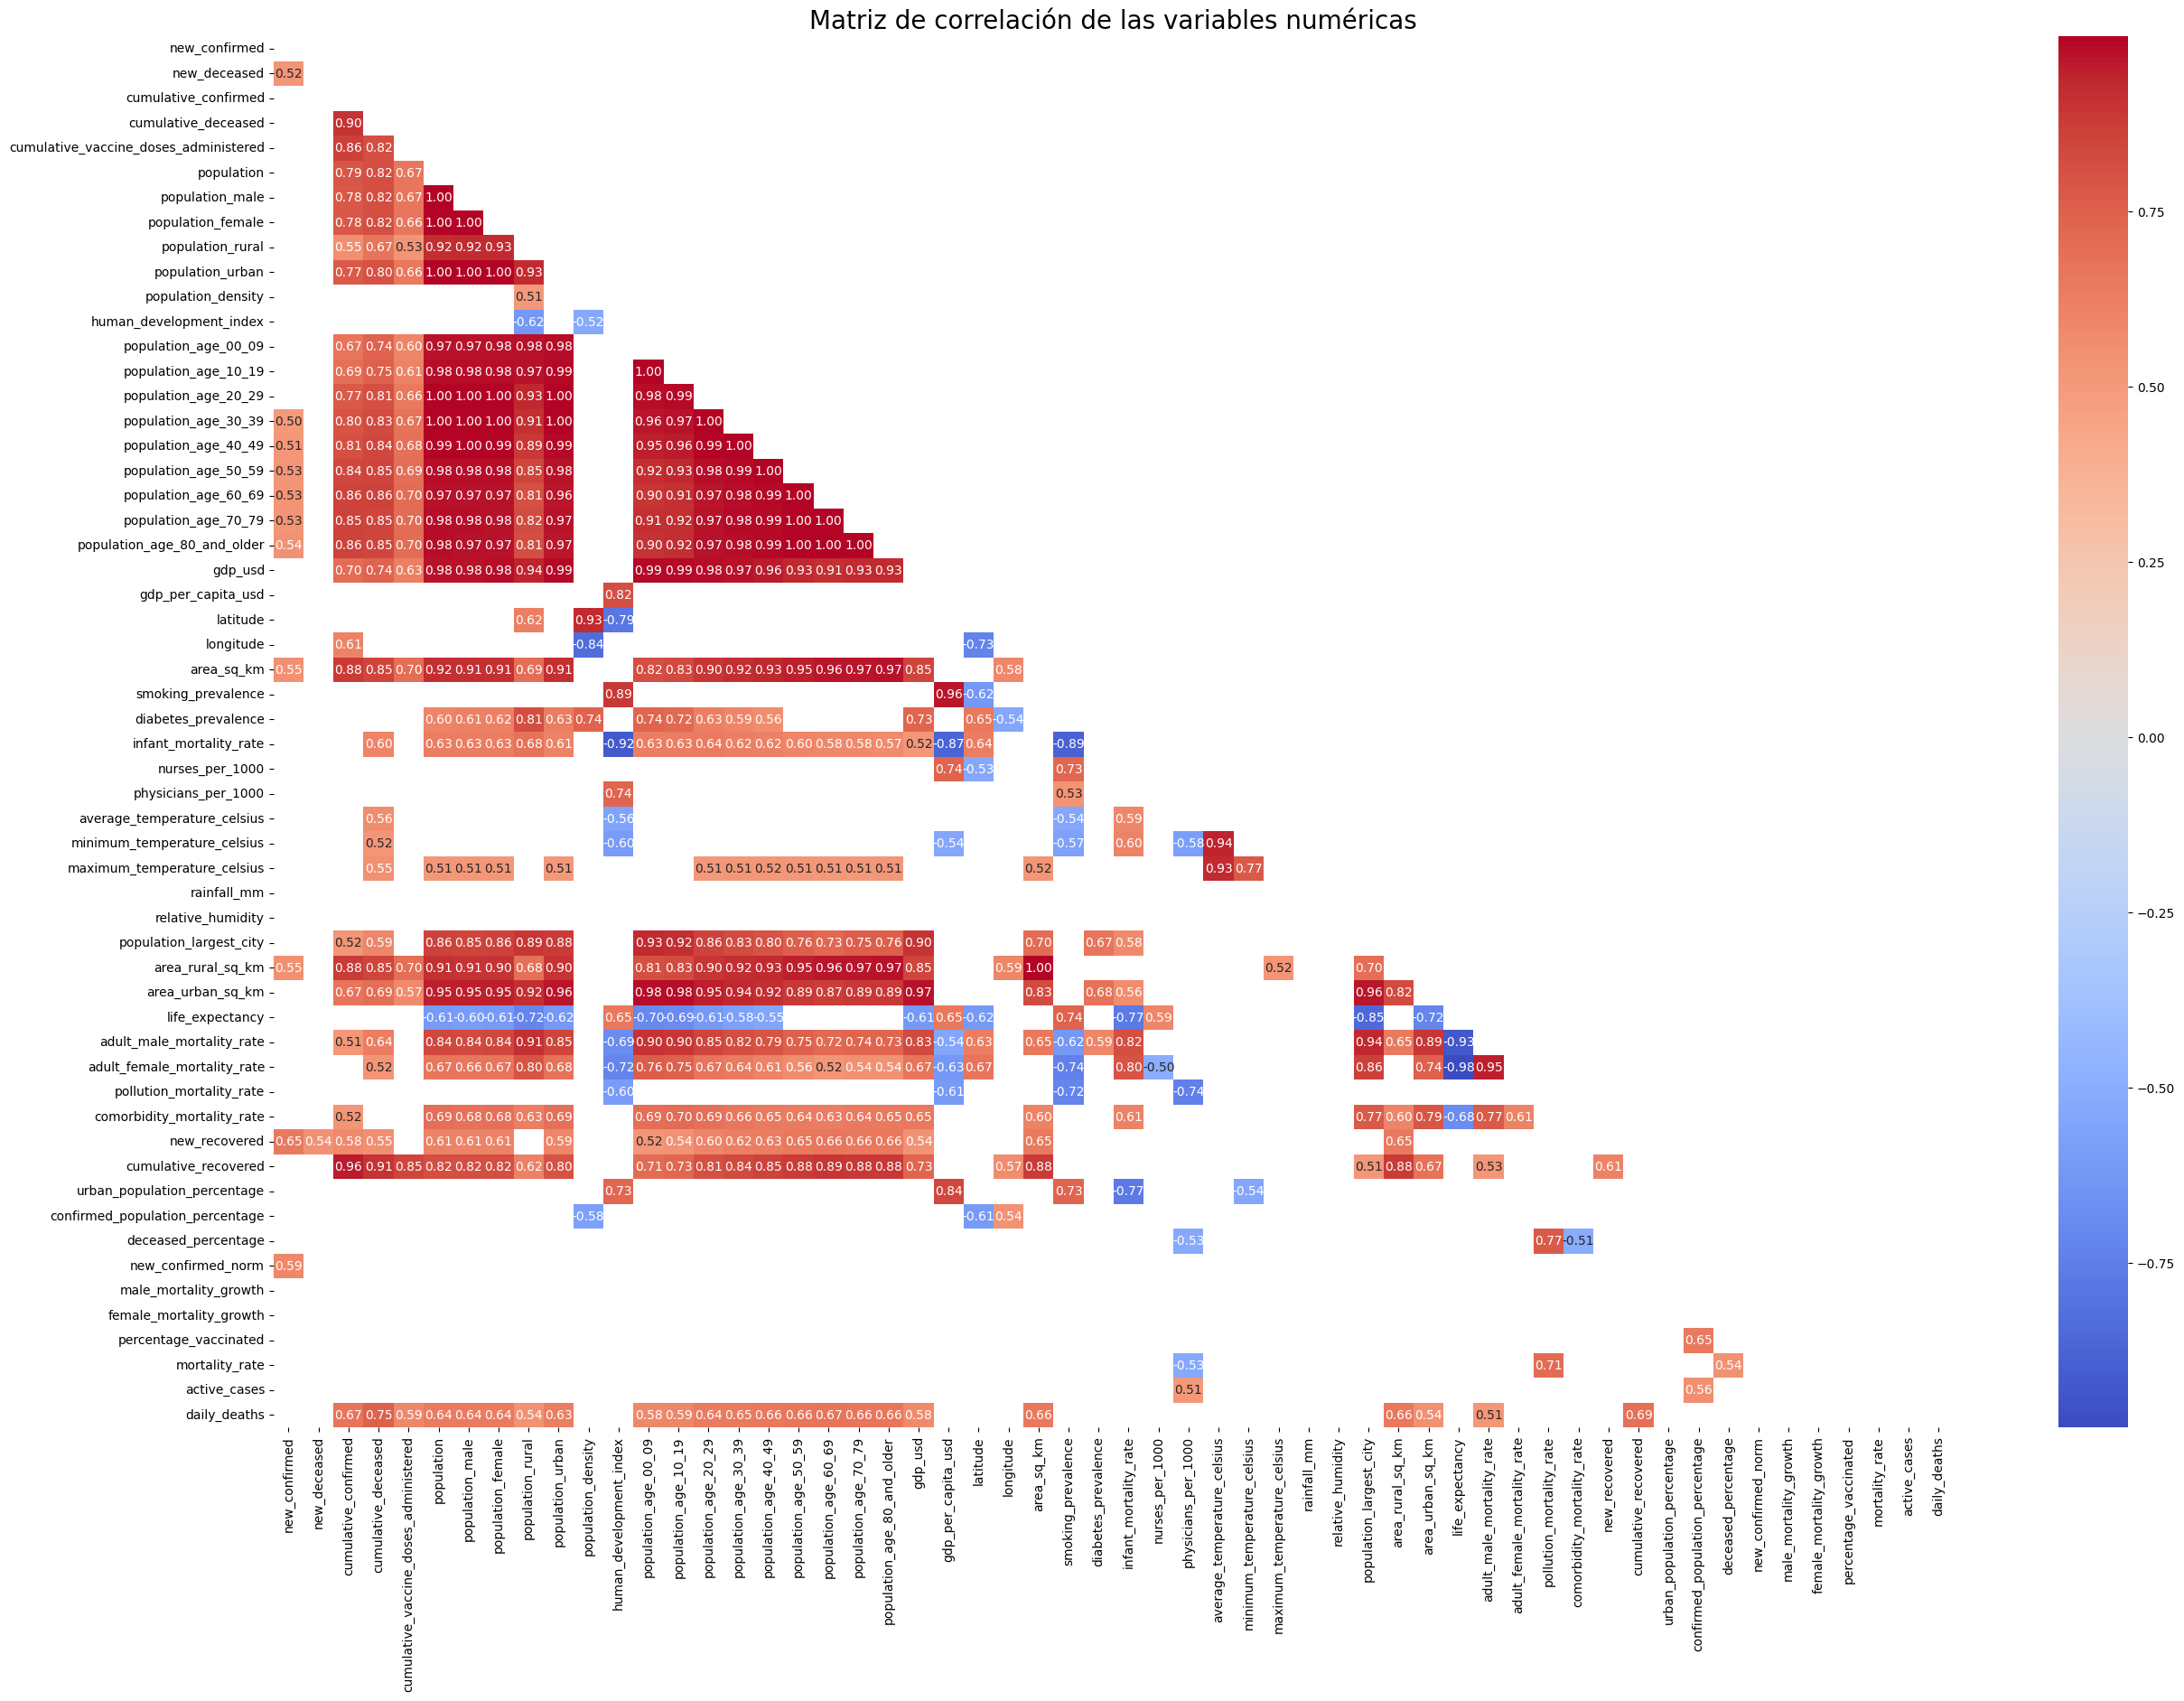

In [153]:
numeric_columns = data_latinoamerica_paises.select_dtypes(include=['float64', 'int64']).columns #Selección de variables numéricas
correlation_matrix = data_latinoamerica_paises[numeric_columns].corr() #Creación de df de correlación con solo columnas numéricas (filtro aplicado con
#la máscara creada arriba)

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool)) #Creación de máscara para mostrar sola la mitad inferior de la matriz de correlación

correlation_matrix = correlation_matrix[abs(correlation_matrix) > abs(0.5)] #Máscara para mostrar correlación fuerte (positiva o negativa), valores
#por encima de 0.5

#Creación de la gráfica
plt.figure(figsize=(30, 20))
heatmap = sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación de las variables numéricas', fontsize=20)
plt.show()

###### *Este heatmap nos permite ver las variables fuertemente correlacionadas tanto positiva como negativamente, muchas de ellas han sido graficadas previamente en distintos figuras como por ejemplo: los nuevos casos y los nuevos muertos, nuevos casos y nuevos recuperados, nuevos recuperados y nuevos muertos., acumulación de dosis administradas y acumulación de confirmados, acumulación de dosis administradas y acumulación de muertos* 

###### 6.Aplica las funciones creadas sobre cada columna de acuerdo a tus necesidades.

###### *He utilizado funciones ya creadas como la media, la mediana, el desvío estándar, suma, resta, división y porcentaje sobre diferentes columnas para usar en los gráficos y mostrar los datos según la necesidad considerando lo solicitado en cada consigna.*

##### EXTRA CREDIT
###### Crear mapas utilizando la información de latitud y longitud disponible en tus datos. 

In [160]:
data_latinoamerica_paises.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3744 entries, 2021-01-02 to 2022-09-17
Data columns (total 62 columns):
 #   Column                                 Non-Null Count  Dtype    
---  ------                                 --------------  -----    
 0   location_key                           3744 non-null   object   
 1   country_code                           3744 non-null   object   
 2   country_name                           3744 non-null   object   
 3   new_confirmed                          3744 non-null   float64  
 4   new_deceased                           3744 non-null   float64  
 5   cumulative_confirmed                   3744 non-null   float64  
 6   cumulative_deceased                    3744 non-null   float64  
 7   cumulative_vaccine_doses_administered  3744 non-null   float64  
 8   population                             3744 non-null   float64  
 9   population_male                        3744 non-null   float64  
 10  population_female             

In [176]:
import geopandas as gpd #Importar librería que voy a necesitar
import folium
from folium.plugins import HeatMap

In [177]:
import geodatasets

In [178]:
world = gpd.read_file("import/ne_110m_admin_0_countries (1).zip")

In [ ]:
for column in world.columns: #Ver las columnas que tiene para saber en cuál está el nombre del país
    print(column)

featurecla
scalerank
LABELRANK
SOVEREIGNT
SOV_A3
ADM0_DIF
LEVEL
TYPE
TLC
ADMIN
ADM0_A3
GEOU_DIF
GEOUNIT
GU_A3
SU_DIF
SUBUNIT
SU_A3
BRK_DIFF
NAME
NAME_LONG
BRK_A3
BRK_NAME
BRK_GROUP
ABBREV
POSTAL
FORMAL_EN
FORMAL_FR
NAME_CIAWF
NOTE_ADM0
NOTE_BRK
NAME_SORT
NAME_ALT
MAPCOLOR7
MAPCOLOR8
MAPCOLOR9
MAPCOLOR13
POP_EST
POP_RANK
POP_YEAR
GDP_MD
GDP_YEAR
ECONOMY
INCOME_GRP
FIPS_10
ISO_A2
ISO_A2_EH
ISO_A3
ISO_A3_EH
ISO_N3
ISO_N3_EH
UN_A3
WB_A2
WB_A3
WOE_ID
WOE_ID_EH
WOE_NOTE
ADM0_ISO
ADM0_DIFF
ADM0_TLC
ADM0_A3_US
ADM0_A3_FR
ADM0_A3_RU
ADM0_A3_ES
ADM0_A3_CN
ADM0_A3_TW
ADM0_A3_IN
ADM0_A3_NP
ADM0_A3_PK
ADM0_A3_DE
ADM0_A3_GB
ADM0_A3_BR
ADM0_A3_IL
ADM0_A3_PS
ADM0_A3_SA
ADM0_A3_EG
ADM0_A3_MA
ADM0_A3_PT
ADM0_A3_AR
ADM0_A3_JP
ADM0_A3_KO
ADM0_A3_VN
ADM0_A3_TR
ADM0_A3_ID
ADM0_A3_PL
ADM0_A3_GR
ADM0_A3_IT
ADM0_A3_NL
ADM0_A3_SE
ADM0_A3_BD
ADM0_A3_UA
ADM0_A3_UN
ADM0_A3_WB
CONTINENT
REGION_UN
SUBREGION
REGION_WB
NAME_LEN
LONG_LEN
ABBREV_LEN
TINY
HOMEPART
MIN_ZOOM
MIN_LABEL
MAX_LABEL
LABEL_X
LABEL_Y
NE_ID
WIKIDA

In [182]:
world.explore(column="NAME")

In [183]:
# Filtrado de world: 
world = world[(world.NAME=="Argentina") | (world.NAME=="Chile") | (world.NAME=="Colombia") | (world.NAME=="Mexico") | (world.NAME=="Peru") | (world.NAME=="Brazil")]
world

featurecla  scalerank  LABELRANK SOVEREIGNT SOV_A3  ADM0_DIF  LEVEL  \
9   Admin-0 country          1          2  Argentina    ARG         0      2   
10  Admin-0 country          1          2      Chile    CHL         0      2   
27  Admin-0 country          1          2     Mexico    MEX         0      2   
29  Admin-0 country          1          2     Brazil    BRA         0      2   
31  Admin-0 country          1          2       Peru    PER         0      2   
32  Admin-0 country          1          2   Colombia    COL         0      2   

                 TYPE TLC      ADMIN  ... FCLASS_TR  FCLASS_ID FCLASS_PL  \
9   Sovereign country   1  Argentina  ...      None       None      None   
10  Sovereign country   1      Chile  ...      None       None      None   
27  Sovereign country   1     Mexico  ...      None       None      None   
29  Sovereign country   1     Brazil  ...      None       None      None   
31  Sovereign country   1       Peru  ...      None       None      None   
32  Sovereign country   1   Colombia  ...      None       None      None   

   FCLASS_GR  FCLASS_IT FCLASS_NL FCLASS_SE  FCLASS_BD FCLASS_UA  \
9       None       None      None      None       None      None   
10      None       None      None      None       None      None   
27      None       None      None      None       None      None   
29      None       None      None      None       None      None   
31      None       None      None      None       None      None   
32      None       None      None      None       None      None   

                                             geometry  
9   MULTIPOLYGON (((-68.63401 -52.63637, -68.25 -5...  
10  MULTIPOLYGON (((-68.63401 -52.63637, -68.63335...  
27  POLYGON ((-117.12776 32.53534, -115.99135 32.6...  
29  POLYGON ((-53.37366 -33.76838, -53.65054 -33.2...  
31  POLYGON ((-69.89364 -4.29819, -70.79477 -4.251...  
32  POLYGON ((-66.87633 1.25336, -67.06505 1.13011...  

[6 rows x 169 columns]

In [186]:
world = world.rename(columns={"NAME":"country_name"}) #Renombrar para poder mergear
world["country_name"]

9     Argentina
10        Chile
27       Mexico
29       Brazil
31         Peru
32     Colombia
Name: country_name, dtype: object

In [ ]:
world = world.merge(data_latinoamerica_paises.groupby('country_name')['cumulative_confirmed'].max().reset_index(), on="country_name") #Mergeo con mi dataset ya agrupado
world

featurecla  scalerank  LABELRANK SOVEREIGNT SOV_A3  ADM0_DIF  LEVEL  \
0  Admin-0 country          1          2  Argentina    ARG         0      2   
1  Admin-0 country          1          2      Chile    CHL         0      2   
2  Admin-0 country          1          2     Mexico    MEX         0      2   
3  Admin-0 country          1          2     Brazil    BRA         0      2   
4  Admin-0 country          1          2       Peru    PER         0      2   
5  Admin-0 country          1          2   Colombia    COL         0      2   

                TYPE TLC      ADMIN  ... FCLASS_ID  FCLASS_PL FCLASS_GR  \
0  Sovereign country   1  Argentina  ...      None       None      None   
1  Sovereign country   1      Chile  ...      None       None      None   
2  Sovereign country   1     Mexico  ...      None       None      None   
3  Sovereign country   1     Brazil  ...      None       None      None   
4  Sovereign country   1       Peru  ...      None       None      None   
5  Sovereign country   1   Colombia  ...      None       None      None   

  FCLASS_IT  FCLASS_NL FCLASS_SE FCLASS_BD  FCLASS_UA  \
0      None       None      None      None       None   
1      None       None      None      None       None   
2      None       None      None      None       None   
3      None       None      None      None       None   
4      None       None      None      None       None   
5      None       None      None      None       None   

                                            geometry cumulative_confirmed  
0  MULTIPOLYGON (((-68.63401 -52.63637, -68.25 -5...           9697763.00  
1  MULTIPOLYGON (((-68.63401 -52.63637, -68.63335...           6079578.72  
2  POLYGON ((-117.12776 32.53534, -115.99135 32.6...           6079578.72  
3  POLYGON ((-53.37366 -33.76838, -53.65054 -33.2...          34568833.00  
4  POLYGON ((-69.89364 -4.29819, -70.79477 -4.251...           6079578.72  
5  POLYGON ((-66.87633 1.25336, -67.06505 1.13011...           6304317.00  

[6 rows x 170 columns]

In [ ]:
world['cumulative_confirmed'] = world['cumulative_confirmed'].apply(lambda x: f"{x:.2f}") #Redondear cumulative_confirmed a dos decimales previo al gráfico con lambda

In [ ]:
#Otra forma de graficar que está en la lecture y que me gusta más, si bien no se muestra el degradado según el número de acumulados confirmados
world.explore(column='country_name', tooltip='cumulative_confirmed')

## AVANCE 4

##### *Prueba código Python para Power BI*

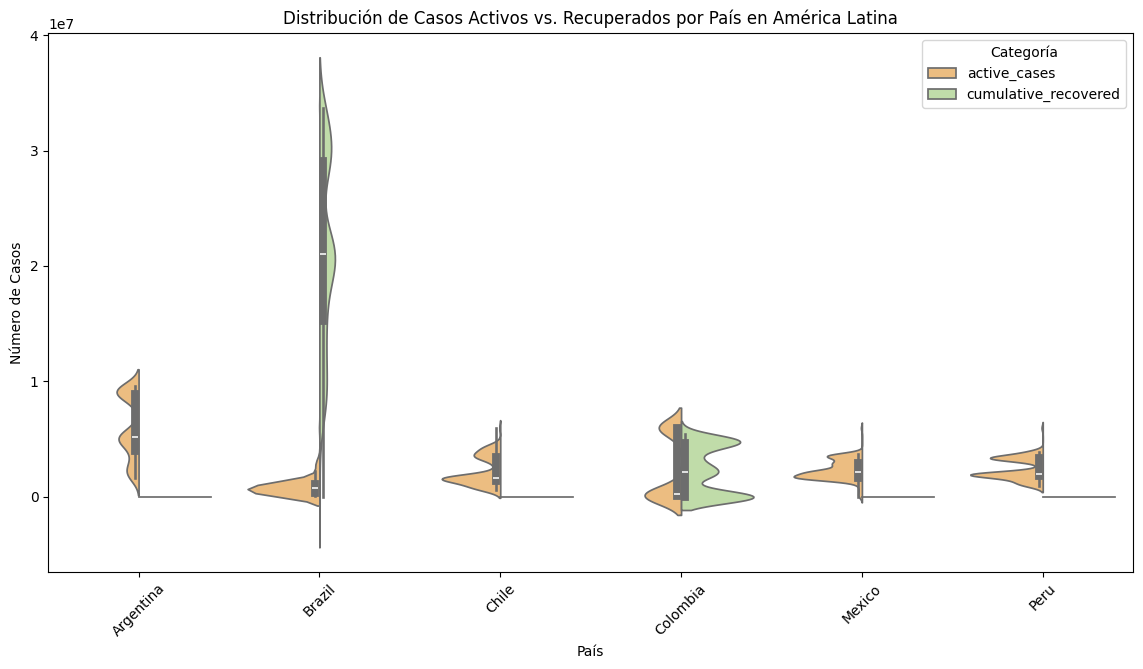

In [236]:
#Violinplot de casos activos vs. recuperados
# Cálculo de los casos activos
data_latinoamerica_paises['active_cases'] = (
    data_latinoamerica_paises['cumulative_confirmed'] 
    - data_latinoamerica_paises['cumulative_deceased'] 
    - data_latinoamerica_paises['cumulative_recovered']
)

# Filtrar columnas necesarias para el análisis
data_filtrado = data_latinoamerica_paises[['country_name', 'active_cases', 'cumulative_recovered']].dropna()

# Transformar a formato long para comparación, es decir, se crea una columna Category que agrupe ambas variables y divida en active_cases & cumulative_recovered
data_long = pd.melt(
    data_filtrado,
    id_vars='country_name',
    value_vars=['active_cases', 'cumulative_recovered'],
    var_name='Category',
    value_name='Value' #Contiene los valores de cada variables
)

# Crear el violin plot separado por país
plt.figure(figsize=(14, 7))
sns.violinplot(x='country_name', y='Value', hue='Category', data=data_long, split=True, palette='Spectral')
plt.xticks(rotation=45)
plt.xlabel('País')
plt.ylabel('Número de Casos')
plt.title('Distribución de Casos Activos vs. Recuperados por País en América Latina')
plt.legend(title='Categoría')
plt.show()